In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
II_Cronicas_1 = "And Solomon the son of David was strengthened in his kingdom, and the LORD his God was with him, and magnified him exceedingly.Then Solomon spoke to all Israel, to the captains of thousands and of hundreds, and to the judges, and to every governor in all Israel, the chief of the fathers.So Solomon, and all the congregation with him, went to the high place that was at Gibeon; for there was the tabernacle of the congregation of God, which Moses the servant of the LORD had made in the wilderness.But the ark of God had David brought up from Kirjathjearim to the place which David had prepared for it: for he had pitched a tent for it at Jerusalem.Moreover the brazen altar, that Bezaleel the son of Uri, the son of Hur, had made, he put before the tabernacle of the LORD: and Solomon and the congregation sought to it.And Solomon went up thither to the brazen altar before the LORD, which was at the tabernacle of the congregation, and offered a thousand burnt offerings on it.In that night did God appear to Solomon, and said to him, Ask what I shall give you.And Solomon said to God, You have showed great mercy to David my father, and have made me to reign in his stead.Now, O LORD God, let your promise to David my father be established: for you have made me king over a people like the dust of the earth in multitude.Give me now wisdom and knowledge, that I may go out and come in before this people: for who can judge this your people, that is so great?And God said to Solomon, Because this was in your heart, and you have not asked riches, wealth, or honor, nor the life of your enemies, neither yet have asked long life; but have asked wisdom and knowledge for yourself, that you may judge my people, over whom I have made you king:Wisdom and knowledge is granted to you; and I will give you riches, and wealth, and honor, such as none of the kings have had that have been before you, neither shall there any after you have the like.Then Solomon came from his journey to the high place that was at Gibeon to Jerusalem, from before the tabernacle of the congregation, and reigned over Israel.And Solomon gathered chariots and horsemen: and he had a thousand and four hundred chariots, and twelve thousand horsemen, which he placed in the chariot cities, and with the king at Jerusalem.And the king made silver and gold at Jerusalem as plenteous as stones, and cedar trees made he as the sycomore trees that are in the vale for abundance.And Solomon had horses brought out of Egypt, and linen yarn: the king' merchants received the linen yarn at a price.And they fetched up, and brought forth out of Egypt a chariot for six hundred shekels of silver, and an horse for an hundred and fifty: and so brought they out horses for all the kings of the Hittites, and for the kings of Syria, by their means.".lower()

In [6]:
II_Cronicas_2 = "And Solomon determined to build an house for the name of the LORD, and an house for his kingdom.And Solomon told out three score and ten thousand men to bear burdens, and fourscore thousand to hew in the mountain, and three thousand and six hundred to oversee them.And Solomon sent to Huram the king of Tyre, saying, As you did deal with David my father, and did send him cedars to build him an house to dwell therein, even so deal with me.Behold, I build an house to the name of the LORD my God, to dedicate it to him, and to burn before him sweet incense, and for the continual show bread, and for the burnt offerings morning and evening, on the sabbaths, and on the new moons, and on the solemn feasts of the LORD our God. This is an ordinance for ever to Israel.And the house which I build is great: for great is our God above all gods.But who is able to build him an house, seeing the heaven and heaven of heavens cannot contain him? who am I then, that I should build him an house, save only to burn sacrifice before him?Send me now therefore a man cunning to work in gold, and in silver, and in brass, and in iron, and in purple, and crimson, and blue, and that can skill to grave with the cunning men that are with me in Judah and in Jerusalem, whom David my father did provide.Send me also cedar trees, fir trees, and algum trees, out of Lebanon: for I know that your servants can skill to cut timber in Lebanon; and, behold, my servants shall be with your servants,Even to prepare me timber in abundance: for the house which I am about to build shall be wonderful great.And, behold, I will give to your servants, the hewers that cut timber, twenty thousand measures of beaten wheat, and twenty thousand measures of barley, and twenty thousand baths of wine, and twenty thousand baths of oil.Then Huram the king of Tyre answered in writing, which he sent to Solomon, Because the LORD has loved his people, he has made you king over them.Huram said moreover, Blessed be the LORD God of Israel, that made heaven and earth, who has given to David the king a wise son, endued with prudence and understanding, that might build an house for the LORD, and an house for his kingdom.And now I have sent a cunning man, endued with understanding, of Huram my father',The son of a woman of the daughters of Dan, and his father was a man of Tyre, skillful to work in gold, and in silver, in brass, in iron, in stone, and in timber, in purple, in blue, and in fine linen, and in crimson; also to grave any manner of engraving, and to find out every device which shall be put to him, with your cunning men, and with the cunning men of my lord David your father.Now therefore the wheat, and the barley, the oil, and the wine, which my lord has spoken of, let him send to his servants:And we will cut wood out of Lebanon, as much as you shall need: and we will bring it to you in floats by sea to Joppa; and you shall carry it up to Jerusalem.And Solomon numbered all the strangers that were in the land of Israel, after the numbering with which David his father had numbered them; and they were found an hundred and fifty thousand and three thousand and six hundred.And he set three score and ten thousand of them to be bearers of burdens, and fourscore thousand to be hewers in the mountain, and three thousand and six hundred overseers to set the people a work.".lower()

In [7]:
II_Cronicas_3 = "Then Solomon began to build the house of the LORD at Jerusalem in mount Moriah, where the Lord appeared to David his father, in the place that David had prepared in the threshing floor of Ornan the Jebusite.And he began to build in the second day of the second month, in the fourth year of his reign.Now these are the things wherein Solomon was instructed for the building of the house of God. The length by cubits after the first measure was three score cubits, and the breadth twenty cubits.And the porch that was in the front of the house, the length of it was according to the breadth of the house, twenty cubits, and the height was an hundred and twenty: and he overlaid it within with pure gold.And the greater house he paneled with fir tree, which he overlaid with fine gold, and set thereon palm trees and chains.And he garnished the house with precious stones for beauty: and the gold was gold of Parvaim.He overlaid also the house, the beams, the posts, and the walls thereof, and the doors thereof, with gold; and graved cherubim on the walls.And he made the most holy house, the length whereof was according to the breadth of the house, twenty cubits, and the breadth thereof twenty cubits: and he overlaid it with fine gold, amounting to six hundred talents.And the weight of the nails was fifty shekels of gold. And he overlaid the upper chambers with gold.And in the most holy house he made two cherubim of image work, and overlaid them with gold.And the wings of the cherubim were twenty cubits long: one wing of the one cherub was five cubits, reaching to the wall of the house: and the other wing was likewise five cubits, reaching to the wing of the other cherub.And one wing of the other cherub was five cubits, reaching to the wall of the house: and the other wing was five cubits also, joining to the wing of the other cherub.The wings of these cherubim spread themselves forth twenty cubits: and they stood on their feet, and their faces were inward.And he made the veil of blue, and purple, and crimson, and fine linen, and worked cherubim thereon.Also he made before the house two pillars of thirty and five cubits high, and the capital that was on the top of each of them was five cubits.And he made chains, as in the oracle, and put them on the heads of the pillars; and made an hundred pomegranates, and put them on the chains.And he reared up the pillars before the temple, one on the right hand, and the other on the left; and called the name of that on the right hand Jachin, and the name of that on the left Boaz.".lower()

In [8]:
II_Cronicas_4 = "Moreover he made an altar of brass, twenty cubits the length thereof, and twenty cubits the breadth thereof, and ten cubits the height thereof.Also he made a molten sea of ten cubits from brim to brim, round in compass, and five cubits the height thereof; and a line of thirty cubits did compass it round about.And under it was the similitude of oxen, which did compass it round about: ten in a cubit, compassing the sea round about. Two rows of oxen were cast, when it was cast.It stood on twelve oxen, three looking toward the north, and three looking toward the west, and three looking toward the south, and three looking toward the east: and the sea was set above on them, and all their hinder parts were inward.And the thickness of it was an handbreadth, and the brim of it like the work of the brim of a cup, with flowers of lilies; and it received and held three thousand baths.He made also ten lavers, and put five on the right hand, and five on the left, to wash in them: such things as they offered for the burnt offering they washed in them; but the sea was for the priests to wash in.And he made ten candlesticks of gold according to their form, and set them in the temple, five on the right hand, and five on the left.He made also ten tables, and placed them in the temple, five on the right side, and five on the left. And he made an hundred basins of gold.Furthermore he made the court of the priests, and the great court, and doors for the court, and overlaid the doors of them with brass.And he set the sea on the right side of the east end, over against the south.And Huram made the pots, and the shovels, and the basins. And Huram finished the work that he was to make for king Solomon for the house of God;To wit, the two pillars, and the pommels, and the capitals which were on the top of the two pillars, and the two wreaths to cover the two pommels of the capitals which were on the top of the pillars;And four hundred pomegranates on the two wreaths; two rows of pomegranates on each wreath, to cover the two pommels of the capitals which were on the pillars.He made also bases, and lavers made he on the bases;One sea, and twelve oxen under it.The pots also, and the shovels, and the meat hooks, and all their instruments, did Huram his father make to king Solomon for the house of the LORD of bright brass.In the plain of Jordan did the king cast them, in the clay ground between Succoth and Zeredathah.Thus Solomon made all these vessels in great abundance: for the weight of the brass could not be found out.And Solomon made all the vessels that were for the house of God, the golden altar also, and the tables where on the show bread was set;Moreover the candlesticks with their lamps, that they should burn after the manner before the oracle, of pure gold;And the flowers, and the lamps, and the tongs, made he of gold, and that perfect gold;And the snuffers, and the basins, and the spoons, and the censers, of pure gold: and the entry of the house, the inner doors thereof for the most holy place, and the doors of the house of the temple, were of gold.".lower()

In [9]:
II_Cronicas_5 = "Thus all the work that Solomon made for the house of the LORD was finished: and Solomon brought in all the things that David his father had dedicated; and the silver, and the gold, and all the instruments, put he among the treasures of the house of God.Then Solomon assembled the elders of Israel, and all the heads of the tribes, the chief of the fathers of the children of Israel, to Jerusalem, to bring up the ark of the covenant of the LORD out of the city of David, which is Zion.Why all the men of Israel assembled themselves to the king in the feast which was in the seventh month.And all the elders of Israel came; and the Levites took up the ark.And they brought up the ark, and the tabernacle of the congregation, and all the holy vessels that were in the tabernacle, these did the priests and the Levites bring up.Also king Solomon, and all the congregation of Israel that were assembled to him before the ark, sacrificed sheep and oxen, which could not be told nor numbered for multitude.And the priests brought in the ark of the covenant of the LORD to his place, to the oracle of the house, into the most holy place, even under the wings of the cherubim:For the cherubim spread forth their wings over the place of the ark, and the cherubim covered the ark and the staves thereof above.And they drew out the staves of the ark, that the ends of the staves were seen from the ark before the oracle; but they were not seen without. And there it is to this day.There was nothing in the ark save the two tables which Moses put therein at Horeb, when the LORD made a covenant with the children of Israel, when they came out of Egypt.And it came to pass, when the priests were come out of the holy place: (for all the priests that were present were sanctified, and did not then wait by course:Also the Levites which were the singers, all of them of Asaph, of Heman, of Jeduthun, with their sons and their brothers, being arrayed in white linen, having cymbals and psalteries and harps, stood at the east end of the altar, and with them an hundred and twenty priests sounding with trumpets:)It came even to pass, as the trumpeters and singers were as one, to make one sound to be heard in praising and thanking the LORD; and when they lifted up their voice with the trumpets and cymbals and instruments of music, and praised the LORD, saying, For he is good; for his mercy endures for ever: that then the house was filled with a cloud, even the house of the LORD;So that the priests could not stand to minister by reason of the cloud: for the glory of the LORD had filled the house of God.".lower()

In [10]:
II_Cronicas_6 = "Then said Solomon, The LORD has said that he would dwell in the thick darkness.But I have built an house of habitation for you, and a place for your dwelling for ever.And the king turned his face, and blessed the whole congregation of Israel: and all the congregation of Israel stood.And he said, Blessed be the LORD God of Israel, who has with his hands fulfilled that which he spoke with his mouth to my father David, saying,Since the day that I brought forth my people out of the land of Egypt I chose no city among all the tribes of Israel to build an house in, that my name might be there; neither chose I any man to be a ruler over my people Israel:But I have chosen Jerusalem, that my name might be there; and have chosen David to be over my people Israel.Now it was in the heart of David my father to build an house for the name of the LORD God of Israel.But the LORD said to David my father, For as much as it was in your heart to build an house for my name, you did well in that it was in your heart:Notwithstanding you shall not build the house; but your son which shall come forth out of your loins, he shall build the house for my name.The LORD therefore has performed his word that he has spoken: for I am risen up in the room of David my father, and am set on the throne of Israel, as the LORD promised, and have built the house for the name of the LORD God of Israel.And in it have I put the ark, wherein is the covenant of the LORD, that he made with the children of Israel.And he stood before the altar of the LORD in the presence of all the congregation of Israel, and spread forth his hands:For Solomon had made a brazen scaffold of five cubits long, and five cubits broad, and three cubits high, and had set it in the middle of the court: and on it he stood, and kneeled down on his knees before all the congregation of Israel, and spread forth his hands toward heaven.And said, O LORD God of Israel, there is no God like you in the heaven, nor in the earth; which keep covenant, and show mercy to your servants, that walk before you with all their hearts:You which have kept with your servant David my father that which you have promised him; and spoke with your mouth, and have fulfilled it with your hand, as it is this day.Now therefore, O LORD God of Israel, keep with your servant David my father that which you have promised him, saying, There shall not fail you a man in my sight to sit on the throne of Israel; yet so that your children take heed to their way to walk in my law, as you have walked before me.Now then, O LORD God of Israel, let your word be verified, which you have spoken to your servant David.But will God in very deed dwell with men on the earth? behold, heaven and the heaven of heavens cannot contain you; how much less this house which I have built!Have respect therefore to the prayer of your servant, and to his supplication, O LORD my God, to listen to the cry and the prayer which your servant prays before you:That your eyes may be open on this house day and night, on the place whereof you have said that you would put your name there; to listen to the prayer which your servant prays toward this place.Listen therefore to the supplications of your servant, and of your people Israel, which they shall make toward this place: hear you from your dwelling place, even from heaven; and when you hear, forgive.If a man sin against his neighbor, and an oath be laid on him to make him swear, and the oath come before your altar in this house;Then hear you from heaven, and do, and judge your servants, by requiting the wicked, by recompensing his way on his own head; and by justifying the righteous, by giving him according to his righteousness.And if your people Israel be put to the worse before the enemy, because they have sinned against you; and shall return and confess your name, and pray and make supplication before you in this house;Then hear you from the heavens, and forgive the sin of your people Israel, and bring them again to the land which you gave to them and to their fathers.When the heaven is shut up, and there is no rain, because they have sinned against you; yet if they pray toward this place, and confess your name, and turn from their sin, when you do afflict them;Then hear you from heaven, and forgive the sin of your servants, and of your people Israel, when you have taught them the good way, wherein they should walk; and send rain on your land, which you have given to your people for an inheritance.If there be dearth in the land, if there be pestilence, if there be blasting, or mildew, locusts, or caterpillars; if their enemies besiege them in the cities of their land; whatever sore or whatever sickness there be:Then what prayer or what supplication soever shall be made of any man, or of all your people Israel, when every one shall know his own sore and his own grief, and shall spread forth his hands in this house:Then hear you from heaven your dwelling place, and forgive, and render to every man according to all his ways, whose heart you know; (for you only know the hearts of the children of men:)That they may fear you, to walk in your ways, so long as they live in the land which you gave to our fathers.Moreover concerning the stranger, which is not of your people Israel, but is come from a far country for your great name' sake, and your mighty hand, and your stretched out arm; if they come and pray in this house;Then hear you from the heavens, even from your dwelling place, and do according to all that the stranger calls to you for; that all people of the earth may know your name, and fear you, as does your people Israel, and may know that this house which I have built is called by your name.If your people go out to war against their enemies by the way that you shall send them, and they pray to you toward this city which you have chosen, and the house which I have built for your name;Then hear you from the heavens their prayer and their supplication, and maintain their cause.If they sin against you, (for there is no man which sins not,) and you be angry with them, and deliver them over before their enemies, and they carry them away captives to a land far off or near;Yet if they bethink themselves in the land where they are carried captive, and turn and pray to you in the land of their captivity, saying, We have sinned, we have done amiss, and have dealt wickedly;If they return to you with all their heart and with all their soul in the land of their captivity, where they have carried them captives, and pray toward their land, which you gave to their fathers, and toward the city which you have chosen, and toward the house which I have built for your name:Then hear you from the heavens, even from your dwelling place, their prayer and their supplications, and maintain their cause, and forgive your people which have sinned against you.Now, my God, let, I beseech you, your eyes be open, and let your ears be attentive to the prayer that is made in this place.Now therefore arise, O LORD God, into your resting place, you, and the ark of your strength: let your priests, O LORD God, be clothed with salvation, and let your saints rejoice in goodness.O LORD God, turn not away the face of your anointed: remember the mercies of David your servant.".lower()

In [11]:
II_Cronicas_7 = "Now when Solomon had made an end of praying, the fire came down from heaven, and consumed the burnt offering and the sacrifices; and the glory of the LORD filled the house.And the priests could not enter into the house of the LORD, because the glory of the LORD had filled the LORD' house.And when all the children of Israel saw how the fire came down, and the glory of the LORD on the house, they bowed themselves with their faces to the ground on the pavement, and worshipped, and praised the LORD, saying, For he is good; for his mercy endures for ever.Then the king and all the people offered sacrifices before the LORD.And king Solomon offered a sacrifice of twenty and two thousand oxen, and an hundred and twenty thousand sheep: so the king and all the people dedicated the house of God.And the priests waited on their offices: the Levites also with instruments of music of the LORD, which David the king had made to praise the LORD, because his mercy endures for ever, when David praised by their ministry; and the priests sounded trumpets before them, and all Israel stood.Moreover Solomon hallowed the middle of the court that was before the house of the LORD: for there he offered burnt offerings, and the fat of the peace offerings, because the brazen altar which Solomon had made was not able to receive the burnt offerings, and the meat offerings, and the fat.Also at the same time Solomon kept the feast seven days, and all Israel with him, a very great congregation, from the entering in of Hamath to the river of Egypt.And in the eighth day they made a solemn assembly: for they kept the dedication of the altar seven days, and the feast seven days.And on the three and twentieth day of the seventh month he sent the people away into their tents, glad and merry in heart for the goodness that the LORD had showed to David, and to Solomon, and to Israel his people.Thus Solomon finished the house of the LORD, and the king' house: and all that came into Solomon' heart to make in the house of the LORD, and in his own house, he prosperously effected.And the LORD appeared to Solomon by night, and said to him, I have heard your prayer, and have chosen this place to myself for an house of sacrifice.If I shut up heaven that there be no rain, or if I command the locusts to devour the land, or if I send pestilence among my people;If my people, which are called by my name, shall humble themselves, and pray, and seek my face, and turn from their wicked ways; then will I hear from heaven, and will forgive their sin, and will heal their land.Now my eyes shall be open, and my ears attentive to the prayer that is made in this place.For now have I chosen and sanctified this house, that my name may be there for ever: and my eyes and my heart shall be there perpetually.And as for you, if you will walk before me, as David your father walked, and do according to all that I have commanded you, and shall observe my statutes and my judgments;Then will I establish the throne of your kingdom, according as I have covenanted with David your father, saying, There shall not fail you a man to be ruler in Israel.But if you turn away, and forsake my statutes and my commandments, which I have set before you, and shall go and serve other gods, and worship them;Then will I pluck them up by the roots out of my land which I have given them; and this house, which I have sanctified for my name, will I cast out of my sight, and will make it to be a proverb and a byword among all nations.And this house, which is high, shall be an astonishment to every one that passes by it; so that he shall say, Why has the LORD done thus to this land, and to this house?And it shall be answered, Because they forsook the LORD God of their fathers, which brought them forth out of the land of Egypt, and laid hold on other gods, and worshipped them, and served them: therefore has he brought all this evil on them.".lower()

In [12]:
II_Cronicas_8 = "And it came to pass at the end of twenty years, wherein Solomon had built the house of the LORD, and his own house,That the cities which Huram had restored to Solomon, Solomon built them, and caused the children of Israel to dwell there.And Solomon went to Hamathzobah, and prevailed against it.And he built Tadmor in the wilderness, and all the store cities, which he built in Hamath.Also he built Bethhoron the upper, and Bethhoron the nether, fenced cities, with walls, gates, and bars;And Baalath, and all the store cities that Solomon had, and all the chariot cities, and the cities of the horsemen, and all that Solomon desired to build in Jerusalem, and in Lebanon, and throughout all the land of his dominion.As for all the people that were left of the Hittites, and the Amorites, and the Perizzites, and the Hivites, and the Jebusites, which were not of Israel,But of their children, who were left after them in the land, whom the children of Israel consumed not, them did Solomon make to pay tribute until this day.But of the children of Israel did Solomon make no servants for his work; but they were men of war, and chief of his captains, and captains of his chariots and horsemen.And these were the chief of king Solomon' officers, even two hundred and fifty, that bore rule over the people.And Solomon brought up the daughter of Pharaoh out of the city of David to the house that he had built for her: for he said, My wife shall not dwell in the house of David king of Israel, because the places are holy, whereunto the ark of the LORD has come.Then Solomon offered burnt offerings to the LORD on the altar of the LORD, which he had built before the porch,Even after a certain rate every day, offering according to the commandment of Moses, on the sabbaths, and on the new moons, and on the solemn feasts, three times in the year, even in the feast of unleavened bread, and in the feast of weeks, and in the feast of tabernacles.And he appointed, according to the order of David his father, the courses of the priests to their service, and the Levites to their charges, to praise and minister before the priests, as the duty of every day required: the porters also by their courses at every gate: for so had David the man of God commanded.And they departed not from the commandment of the king to the priests and Levites concerning any matter, or concerning the treasures.Now all the work of Solomon was prepared to the day of the foundation of the house of the LORD, and until it was finished. So the house of the LORD was perfected.Then went Solomon to Eziongeber, and to Eloth, at the sea side in the land of Edom.And Huram sent him by the hands of his servants ships, and servants that had knowledge of the sea; and they went with the servants of Solomon to Ophir, and took there four hundred and fifty talents of gold, and brought them to king Solomon.".lower()

In [13]:
II_Cronicas_9 = "And when the queen of Sheba heard of the fame of Solomon, she came to prove Solomon with hard questions at Jerusalem, with a very great company, and camels that bore spices, and gold in abundance, and precious stones: and when she was come to Solomon, she communed with him of all that was in her heart.And Solomon told her all her questions: and there was nothing hid from Solomon which he told her not.And when the queen of Sheba had seen the wisdom of Solomon, and the house that he had built,And the meat of his table, and the sitting of his servants, and the attendance of his ministers, and their apparel; his cupbearers also, and their apparel; and his ascent by which he went up into the house of the LORD; there was no more spirit in her.And she said to the king, It was a true report which I heard in my own land of your acts, and of your wisdom:However, I believed not their words, until I came, and my eyes had seen it: and, behold, the one half of the greatness of your wisdom was not told me: for you exceed the fame that I heard.Happy are your men, and happy are these your servants, which stand continually before you, and hear your wisdom.Blessed be the LORD your God, which delighted in you to set you on his throne, to be king for the LORD your God: because your God loved Israel, to establish them for ever, therefore made he you king over them, to do judgment and justice.And she gave the king an hundred and twenty talents of gold, and of spices great abundance, and precious stones: neither was there any such spice as the queen of Sheba gave king Solomon.And the servants also of Huram, and the servants of Solomon, which brought gold from Ophir, brought algum trees and precious stones.And the king made of the algum trees terraces to the house of the LORD, and to the king' palace, and harps and psalteries for singers: and there were none such seen before in the land of Judah.And king Solomon gave to the queen of Sheba all her desire, whatever she asked, beside that which she had brought to the king. So she turned, and went away to her own land, she and her servants.Now the weight of gold that came to Solomon in one year was six hundred and three score and six talents of gold;Beside that which chapmen and merchants brought. And all the kings of Arabia and governors of the country brought gold and silver to Solomon.And king Solomon made two hundred targets of beaten gold: six hundred shekels of beaten gold went to one target.And three hundred shields made he of beaten gold: three hundred shekels of gold went to one shield. And the king put them in the house of the forest of Lebanon.Moreover the king made a great throne of ivory, and overlaid it with pure gold.And there were six steps to the throne, with a footstool of gold, which were fastened to the throne, and stays on each side of the sitting place, and two lions standing by the stays:And twelve lions stood there on the one side and on the other on the six steps. There was not the like made in any kingdom.And all the drinking vessels of king Solomon were of gold, and all the vessels of the house of the forest of Lebanon were of pure gold: none were of silver; it was not any thing accounted of in the days of Solomon.For the king' ships went to Tarshish with the servants of Huram: every three years once came the ships of Tarshish bringing gold, and silver, ivory, and apes, and peacocks.And king Solomon passed all the kings of the earth in riches and wisdom.And all the kings of the earth sought the presence of Solomon, to hear his wisdom, that God had put in his heart.And they brought every man his present, vessels of silver, and vessels of gold, and raiment, harness, and spices, horses, and mules, a rate year by year.And Solomon had four thousand stalls for horses and chariots, and twelve thousand horsemen; whom he bestowed in the chariot cities, and with the king at Jerusalem.And he reigned over all the kings from the river even to the land of the Philistines, and to the border of Egypt.And the king made silver in Jerusalem as stones, and cedar trees made he as the sycomore trees that are in the low plains in abundance.And they brought to Solomon horses out of Egypt, and out of all lands.Now the rest of the acts of Solomon, first and last, are they not written in the book of Nathan the prophet, and in the prophecy of Ahijah the Shilonite, and in the visions of Iddo the seer against Jeroboam the son of Nebat?And Solomon reigned in Jerusalem over all Israel forty years.And Solomon slept with his fathers, and he was buried in the city of David his father: and Rehoboam his son reigned in his stead.".lower()

In [14]:
II_Cronicas_10 = "And Rehoboam went to Shechem: for to Shechem were all Israel come to make him king.And it came to pass, when Jeroboam the son of Nebat, who was in Egypt, where he fled from the presence of Solomon the king, heard it, that Jeroboam returned out of Egypt.And they sent and called him. So Jeroboam and all Israel came and spoke to Rehoboam, saying,Your father made our yoke grievous: now therefore ease you somewhat the grievous servitude of your father, and his heavy yoke that he put on us, and we will serve you.And he said to them, Come again to me after three days. And the people departed.And king Rehoboam took counsel with the old men that had stood before Solomon his father while he yet lived, saying, What counsel give you me to return answer to this people?And they spoke to him, saying, If you be kind to this people, and please them, and speak good words to them, they will be your servants for ever.But he forsook the counsel which the old men gave him, and took counsel with the young men that were brought up with him, that stood before him.And he said to them, What advice give you that we may return answer to this people, which have spoken to me, saying, Ease somewhat the yoke that your father did put on us?And the young men that were brought up with him spoke to him, saying, Thus shall you answer the people that spoke to you, saying, Your father made our yoke heavy, but make you it somewhat lighter for us; thus shall you say to them, My little finger shall be thicker than my father' loins.For whereas my father put a heavy yoke on you, I will put more to your yoke: my father chastised you with whips, but I will chastise you with scorpions.So Jeroboam and all the people came to Rehoboam on the third day, as the king bade, saying, Come again to me on the third day.And the king answered them roughly; and king Rehoboam forsook the counsel of the old men,And answered them after the advice of the young men, saying, My father made your yoke heavy, but I will add thereto: my father chastised you with whips, but I will chastise you with scorpions.So the king listened not to the people: for the cause was of God, that the LORD might perform his word, which he spoke by the hand of Ahijah the Shilonite to Jeroboam the son of Nebat.And when all Israel saw that the king would not listen to them, the people answered the king, saying, What portion have we in David? and we have none inheritance in the son of Jesse: every man to your tents, O Israel: and now, David, see to your own house. So all Israel went to their tents.But as for the children of Israel that dwelled in the cities of Judah, Rehoboam reigned over them.Then king Rehoboam sent Hadoram that was over the tribute; and the children of Israel stoned him with stones, that he died. But king Rehoboam made speed to get him up to his chariot, to flee to Jerusalem.And Israel rebelled against the house of David to this day.".lower()

In [15]:
II_Cronicas_11 = "And when Rehoboam was come to Jerusalem, he gathered of the house of Judah and Benjamin an hundred and fourscore thousand chosen men, which were warriors, to fight against Israel, that he might bring the kingdom again to Rehoboam.But the word of the LORD came to Shemaiah the man of God, saying,Speak to Rehoboam the son of Solomon, king of Judah, and to all Israel in Judah and Benjamin, saying,Thus said the LORD, You shall not go up, nor fight against your brothers: return every man to his house: for this thing is done of me. And they obeyed the words of the LORD, and returned from going against Jeroboam.And Rehoboam dwelled in Jerusalem, and built cities for defense in Judah.He built even Bethlehem, and Etam, and Tekoa,And Bethzur, and Shoco, and Adullam,And Gath, and Mareshah, and Ziph,And Adoraim, and Lachish, and Azekah,And Zorah, and Aijalon, and Hebron, which are in Judah and in Benjamin fenced cities.And he fortified the strong holds, and put captains in them, and store of victual, and of oil and wine.And in every several city he put shields and spears, and made them exceeding strong, having Judah and Benjamin on his side.And the priests and the Levites that were in all Israel resorted to him out of all their coasts.For the Levites left their suburbs and their possession, and came to Judah and Jerusalem: for Jeroboam and his sons had cast them off from executing the priest' office to the LORD:And he ordained him priests for the high places, and for the devils, and for the calves which he had made.And after them out of all the tribes of Israel such as set their hearts to seek the LORD God of Israel came to Jerusalem, to sacrifice to the LORD God of their fathers.So they strengthened the kingdom of Judah, and made Rehoboam the son of Solomon strong, three years: for three years they walked in the way of David and Solomon.And Rehoboam took him Mahalath the daughter of Jerimoth the son of David to wife, and Abihail the daughter of Eliab the son of Jesse;Which bore him children; Jeush, and Shamariah, and Zaham.And after her he took Maachah the daughter of Absalom; which bore him Abijah, and Attai, and Ziza, and Shelomith.And Rehoboam loved Maachah the daughter of Absalom above all his wives and his concubines: (for he took eighteen wives, and three score concubines; and begat twenty and eight sons, and three score daughters.)And Rehoboam made Abijah the son of Maachah the chief, to be ruler among his brothers: for he thought to make him king.And he dealt wisely, and dispersed of all his children throughout all the countries of Judah and Benjamin, to every fenced city: and he gave them victual in abundance. And he desired many wives.".lower()

In [16]:
II_Cronicas_12 = "And it came to pass, when Rehoboam had established the kingdom, and had strengthened himself, he forsook the law of the LORD, and all Israel with him.And it came to pass, that in the fifth year of king Rehoboam Shishak king of Egypt came up against Jerusalem, because they had transgressed against the LORD,With twelve hundred chariots, and three score thousand horsemen: and the people were without number that came with him out of Egypt; the Lubims, the Sukkiims, and the Ethiopians.And he took the fenced cities which pertained to Judah, and came to Jerusalem.Then came Shemaiah the prophet to Rehoboam, and to the princes of Judah, that were gathered together to Jerusalem because of Shishak, and said to them, Thus said the LORD, You have forsaken me, and therefore have I also left you in the hand of Shishak.Whereupon the princes of Israel and the king humbled themselves; and they said, The LORD is righteous.And when the LORD saw that they humbled themselves, the word of the LORD came to Shemaiah, saying, They have humbled themselves; therefore I will not destroy them, but I will grant them some deliverance; and my wrath shall not be poured out on Jerusalem by the hand of Shishak.Nevertheless they shall be his servants; that they may know my service, and the service of the kingdoms of the countries.So Shishak king of Egypt came up against Jerusalem, and took away the treasures of the house of the LORD, and the treasures of the king' house; he took all: he carried away also the shields of gold which Solomon had made.Instead of which king Rehoboam made shields of brass, and committed them to the hands of the chief of the guard, that kept the entrance of the king' house.And when the king entered into the house of the LORD, the guard came and fetched them, and brought them again into the guard chamber.And when he humbled himself, the wrath of the LORD turned from him, that he would not destroy him altogether: and also in Judah things went well.So king Rehoboam strengthened himself in Jerusalem, and reigned: for Rehoboam was one and forty years old when he began to reign, and he reigned seventeen years in Jerusalem, the city which the LORD had chosen out of all the tribes of Israel, to put his name there. And his mother' name was Naamah an Ammonitess.And he did evil, because he prepared not his heart to seek the LORD.Now the acts of Rehoboam, first and last, are they not written in the book of Shemaiah the prophet, and of Iddo the seer concerning genealogies? And there were wars between Rehoboam and Jeroboam continually.And Rehoboam slept with his fathers, and was buried in the city of David: and Abijah his son reigned in his stead.".lower()

In [17]:
II_Cronicas_13 = "Now in the eighteenth year of king Jeroboam began Abijah to reign over Judah.He reigned three years in Jerusalem. His mother' name also was Michaiah the daughter of Uriel of Gibeah. And there was war between Abijah and Jeroboam.And Abijah set the battle in array with an army of valiant men of war, even four hundred thousand chosen men: Jeroboam also set the battle in array against him with eight hundred thousand chosen men, being mighty men of valor.And Abijah stood up on mount Zemaraim, which is in mount Ephraim, and said, Hear me, you Jeroboam, and all Israel;Ought you not to know that the LORD God of Israel gave the kingdom over Israel to David for ever, even to him and to his sons by a covenant of salt?Yet Jeroboam the son of Nebat, the servant of Solomon the son of David, is risen up, and has rebelled against his lord.And there are gathered to him vain men, the children of Belial, and have strengthened themselves against Rehoboam the son of Solomon, when Rehoboam was young and tenderhearted, and could not withstand them.And now you think to withstand the kingdom of the LORD in the hand of the sons of David; and you be a great multitude, and there are with your golden calves, which Jeroboam made you for gods.Have you not cast out the priests of the LORD, the sons of Aaron, and the Levites, and have made you priests after the manner of the nations of other lands? so that whoever comes to consecrate himself with a young bullock and seven rams, the same may be a priest of them that are no gods.But as for us, the LORD is our God, and we have not forsaken him; and the priests, which minister to the LORD, are the sons of Aaron, and the Levites wait on their business:And they burn to the LORD every morning and every evening burnt sacrifices and sweet incense: the show bread also set they in order on the pure table; and the candlestick of gold with the lamps thereof, to burn every evening: for we keep the charge of the LORD our God; but you have forsaken him.And, behold, God himself is with us for our captain, and his priests with sounding trumpets to cry alarm against you. O children of Israel, fight you not against the LORD God of your fathers; for you shall not prosper.But Jeroboam caused an ambush to come about behind them: so they were before Judah, and the ambush was behind them.And when Judah looked back, behold, the battle was before and behind: and they cried to the LORD, and the priests sounded with the trumpets.Then the men of Judah gave a shout: and as the men of Judah shouted, it came to pass, that God smote Jeroboam and all Israel before Abijah and Judah.And the children of Israel fled before Judah: and God delivered them into their hand.And Abijah and his people slew them with a great slaughter: so there fell down slain of Israel five hundred thousand chosen men.Thus the children of Israel were brought under at that time, and the children of Judah prevailed, because they relied on the LORD God of their fathers.And Abijah pursued after Jeroboam, and took cities from him, Bethel with the towns thereof, and Jeshanah with the towns thereof, and Ephraim with the towns thereof.Neither did Jeroboam recover strength again in the days of Abijah: and the LORD struck him, and he died.But Abijah waxed mighty, and married fourteen wives, and begat twenty and two sons, and sixteen daughters.And the rest of the acts of Abijah, and his ways, and his sayings, are written in the story of the prophet Iddo.".lower()

In [18]:
II_Cronicas_14 = "So Abijah slept with his fathers, and they buried him in the city of David: and Asa his son reigned in his stead. In his days the land was quiet ten years.And Asa did that which was good and right in the eyes of the LORD his God:For he took away the altars of the strange gods, and the high places, and broke down the images, and cut down the groves:And commanded Judah to seek the LORD God of their fathers, and to do the law and the commandment.Also he took away out of all the cities of Judah the high places and the images: and the kingdom was quiet before him.And he built fenced cities in Judah: for the land had rest, and he had no war in those years; because the LORD had given him rest.Therefore he said to Judah, Let us build these cities, and make about them walls, and towers, gates, and bars, while the land is yet before us; because we have sought the LORD our God, we have sought him, and he has given us rest on every side. So they built and prospered.And Asa had an army of men that bore targets and spears, out of Judah three hundred thousand; and out of Benjamin, that bore shields and drew bows, two hundred and fourscore thousand: all these were mighty men of valor.And there came out against them Zerah the Ethiopian with an host of a thousand thousand, and three hundred chariots; and came to Mareshah.Then Asa went out against him, and they set the battle in array in the valley of Zephathah at Mareshah.And Asa cried to the LORD his God, and said, LORD, it is nothing with you to help, whether with many, or with them that have no power: help us, O LORD our God; for we rest on you, and in your name we go against this multitude. O LORD, you are our God; let no man prevail against you.So the LORD smote the Ethiopians before Asa, and before Judah; and the Ethiopians fled.And Asa and the people that were with him pursued them to Gerar: and the Ethiopians were overthrown, that they could not recover themselves; for they were destroyed before the LORD, and before his host; and they carried away very much spoil.And they smote all the cities round about Gerar; for the fear of the LORD came on them: and they spoiled all the cities; for there was exceeding much spoil in them.They smote also the tents of cattle, and carried away sheep and camels in abundance, and returned to Jerusalem.".lower()

In [19]:
II_Cronicas_15 = "And the Spirit of God came on Azariah the son of Oded:And he went out to meet Asa, and said to him, Hear you me, Asa, and all Judah and Benjamin; The LORD is with you, while you be with him; and if you seek him, he will be found of you; but if you forsake him, he will forsake you.Now for a long season Israel has been without the true God, and without a teaching priest, and without law.But when they in their trouble did turn to the LORD God of Israel, and sought him, he was found of them.And in those times there was no peace to him that went out, nor to him that came in, but great vexations were on all the inhabitants of the countries.And nation was destroyed of nation, and city of city: for God did vex them with all adversity.Be you strong therefore, and let not your hands be weak: for your work shall be rewarded.And when Asa heard these words, and the prophecy of Oded the prophet, he took courage, and put away the abominable idols out of all the land of Judah and Benjamin, and out of the cities which he had taken from mount Ephraim, and renewed the altar of the LORD, that was before the porch of the LORD.And he gathered all Judah and Benjamin, and the strangers with them out of Ephraim and Manasseh, and out of Simeon: for they fell to him out of Israel in abundance, when they saw that the LORD his God was with him.So they gathered themselves together at Jerusalem in the third month, in the fifteenth year of the reign of Asa.And they offered to the LORD the same time, of the spoil which they had brought, seven hundred oxen and seven thousand sheep.And they entered into a covenant to seek the LORD God of their fathers with all their heart and with all their soul;That whoever would not seek the LORD God of Israel should be put to death, whether small or great, whether man or woman.And they swore to the LORD with a loud voice, and with shouting, and with trumpets, and with cornets.And all Judah rejoiced at the oath: for they had sworn with all their heart, and sought him with their whole desire; and he was found of them: and the LORD gave them rest round about.And also concerning Maachah the mother of Asa the king, he removed her from being queen, because she had made an idol in a grove: and Asa cut down her idol, and stamped it, and burnt it at the brook Kidron.But the high places were not taken away out of Israel: nevertheless the heart of Asa was perfect all his days.And he brought into the house of God the things that his father had dedicated, and that he himself had dedicated, silver, and gold, and vessels.And there was no more war to the five and thirtieth year of the reign of Asa.".lower()

In [20]:
II_Cronicas_16 = "In the six and thirtieth year of the reign of Asa Baasha king of Israel came up against Judah, and built Ramah, to the intent that he might let none go out or come in to Asa king of Judah.Then Asa brought out silver and gold out of the treasures of the house of the LORD and of the king' house, and sent to Benhadad king of Syria, that dwelled at Damascus, saying,There is a league between me and you, as there was between my father and your father: behold, I have sent you silver and gold; go, break your league with Baasha king of Israel, that he may depart from me.And Benhadad listened to king Asa, and sent the captains of his armies against the cities of Israel; and they smote Ijon, and Dan, and Abelmaim, and all the store cities of Naphtali.And it came to pass, when Baasha heard it, that he left off building of Ramah, and let his work cease.Then Asa the king took all Judah; and they carried away the stones of Ramah, and the timber thereof, with which Baasha was building; and he built therewith Geba and Mizpah.And at that time Hanani the seer came to Asa king of Judah, and said to him, Because you have relied on the king of Syria, and not relied on the LORD your God, therefore is the host of the king of Syria escaped out of your hand.Were not the Ethiopians and the Lubims a huge host, with very many chariots and horsemen? yet, because you did rely on the LORD, he delivered them into your hand.For the eyes of the LORD run to and fro throughout the whole earth, to show himself strong in the behalf of them whose heart is perfect toward him. Herein you have done foolishly: therefore from now on you shall have wars.Then Asa was wroth with the seer, and put him in a prison house; for he was in a rage with him because of this thing. And Asa oppressed some of the people the same time.And, behold, the acts of Asa, first and last, see, they are written in the book of the kings of Judah and Israel.And Asa in the thirty and ninth year of his reign was diseased in his feet, until his disease was exceeding great: yet in his disease he sought not to the LORD, but to the physicians.And Asa slept with his fathers, and died in the one and fortieth year of his reign.And they buried him in his own sepulchers, which he had made for himself in the city of David, and laid him in the bed which was filled with sweet odors and divers kinds of spices prepared by the apothecaries'are: and they made a very great burning for him.".lower()

In [21]:
II_Cronicas_17 = "And Jehoshaphat his son reigned in his stead, and strengthened himself against Israel.And he placed forces in all the fenced cities of Judah, and set garrisons in the land of Judah, and in the cities of Ephraim, which Asa his father had taken.And the LORD was with Jehoshaphat, because he walked in the first ways of his father David, and sought not to Baalim;But sought to the Lord God of his father, and walked in his commandments, and not after the doings of Israel.Therefore the LORD established the kingdom in his hand; and all Judah brought to Jehoshaphat presents; and he had riches and honor in abundance.And his heart was lifted up in the ways of the LORD: moreover he took away the high places and groves out of Judah.Also in the third year of his reign he sent to his princes, even to Benhail, and to Obadiah, and to Zechariah, and to Nethaneel, and to Michaiah, to teach in the cities of Judah.And with them he sent Levites, even Shemaiah, and Nethaniah, and Zebadiah, and Asahel, and Shemiramoth, and Jehonathan, and Adonijah, and Tobijah, and Tobadonijah, Levites; and with them Elishama and Jehoram, priests.And they taught in Judah, and had the book of the law of the LORD with them, and went about throughout all the cities of Judah, and taught the people.And the fear of the LORD fell on all the kingdoms of the lands that were round about Judah, so that they made no war against Jehoshaphat.Also some of the Philistines brought Jehoshaphat presents, and tribute silver; and the Arabians brought him flocks, seven thousand and seven hundred rams, and seven thousand and seven hundred he goats.And Jehoshaphat waxed great exceedingly; and he built in Judah castles, and cities of store.And he had much business in the cities of Judah: and the men of war, mighty men of valor, were in Jerusalem.And these are the numbers of them according to the house of their fathers: Of Judah, the captains of thousands; Adnah the chief, and with him mighty men of valor three hundred thousand.And next to him was Jehohanan the captain, and with him two hundred and fourscore thousand.And next him was Amasiah the son of Zichri, who willingly offered himself to the LORD; and with him two hundred thousand mighty men of valor.And of Benjamin; Eliada a mighty man of valor, and with him armed men with bow and shield two hundred thousand.And next him was Jehozabad, and with him an hundred and fourscore thousand ready prepared for the war.These waited on the king, beside those whom the king put in the fenced cities throughout all Judah.".lower()

In [22]:
II_Cronicas_18 = "Now Jehoshaphat had riches and honor in abundance, and joined affinity with Ahab.And after certain years he went down to Ahab to Samaria. And Ahab killed sheep and oxen for him in abundance, and for the people that he had with him, and persuaded him to go up with him to Ramothgilead.And Ahab king of Israel said to Jehoshaphat king of Judah, Will you go with me to Ramothgilead? And he answered him, I am as you are, and my people as your people; and we will be with you in the war.And Jehoshaphat said to the king of Israel, Inquire, I pray you, at the word of the LORD to day.Therefore the king of Israel gathered together of prophets four hundred men, and said to them, Shall we go to Ramothgilead to battle, or shall I forbear? And they said, Go up; for God will deliver it into the king' hand.But Jehoshaphat said, Is there not here a prophet of the LORD besides, that we might inquire of him?And the king of Israel said to Jehoshaphat, There is yet one man, by whom we may inquire of the LORD: but I hate him; for he never prophesied good to me, but always evil: the same is Micaiah the son of Imla. And Jehoshaphat said, Let not the king say so.And the king of Israel called for one of his officers, and said, Fetch quickly Micaiah the son of Imla.And the king of Israel and Jehoshaphat king of Judah sat either of them on his throne, clothed in their robes, and they sat in a void place at the entering in of the gate of Samaria; and all the prophets prophesied before them.And Zedekiah the son of Chenaanah had made him horns of iron, and said, Thus said the LORD, With these you shall push Syria until they be consumed.And all the prophets prophesied so, saying, Go up to Ramothgilead, and prosper: for the LORD shall deliver it into the hand of the king.And the messenger that went to call Micaiah spoke to him, saying, Behold, the words of the prophets declare good to the king with one assent; let your word therefore, I pray you, be like one of their', and speak you good.And Micaiah said, As the LORD lives, even what my God said, that will I speak.And when he was come to the king, the king said to him, Micaiah, shall we go to Ramothgilead to battle, or shall I forbear? And he said, Go you up, and prosper, and they shall be delivered into your hand.And the king said to him, How many times shall I adjure you that you say nothing but the truth to me in the name of the LORD?Then he said, I did see all Israel scattered on the mountains, as sheep that have no shepherd: and the LORD said, These have no master; let them return therefore every man to his house in peace.And the king of Israel said to Jehoshaphat, Did I not tell you that he would not prophesy good to me, but evil?Again he said, Therefore hear the word of the LORD; I saw the LORD sitting on his throne, and all the host of heaven standing on his right hand and on his left.And the LORD said, Who shall entice Ahab king of Israel, that he may go up and fall at Ramothgilead? And one spoke saying after this manner, and another saying after that manner.Then there came out a spirit, and stood before the LORD, and said, I will entice him. And the LORD said to him, With which?And he said, I will go out, and be a lying spirit in the mouth of all his prophets. And the Lord said, You shall entice him, and you shall also prevail: go out, and do even so.Now therefore, behold, the LORD has put a lying spirit in the mouth of these your prophets, and the LORD has spoken evil against you.Then Zedekiah the son of Chenaanah came near, and smote Micaiah on the cheek, and said, Which way went the Spirit of the LORD from me to speak to you?And Micaiah said, Behold, you shall see on that day when you shall go into an inner chamber to hide yourself.Then the king of Israel said, Take you Micaiah, and carry him back to Amon the governor of the city, and to Joash the king' son;And say, Thus said the king, Put this fellow in the prison, and feed him with bread of affliction and with water of affliction, until I return in peace.And Micaiah said, If you certainly return in peace, then has not the LORD spoken by me. And he said, Listen, all you people.So the king of Israel and Jehoshaphat the king of Judah went up to Ramothgilead.And the king of Israel said to Jehoshaphat, I will disguise myself, and I will go to the battle; but put you on your robes. So the king of Israel disguised himself; and they went to the battle.Now the king of Syria had commanded the captains of the chariots that were with him, saying, Fight you not with small or great, save only with the king of Israel.And it came to pass, when the captains of the chariots saw Jehoshaphat, that they said, It is the king of Israel. Therefore they compassed about him to fight: but Jehoshaphat cried out, and the LORD helped him; and God moved them to depart from him.For it came to pass, that, when the captains of the chariots perceived that it was not the king of Israel, they turned back again from pursuing him.And a certain man drew a bow at a venture, and smote the king of Israel between the joints of the harness: therefore he said to his chariot man, Turn your hand, that you may carry me out of the host; for I am wounded.And the battle increased that day: however, the king of Israel stayed himself up in his chariot against the Syrians until the even: and about the time of the sun going down he died.".lower()

In [23]:
II_Cronicas_19 = "And Jehoshaphat the king of Judah returned to his house in peace to Jerusalem.And Jehu the son of Hanani the seer went out to meet him, and said to king Jehoshaphat, Should you help the ungodly, and love them that hate the LORD? therefore is wrath on you from before the LORD.Nevertheless there are good things found in you, in that you have taken away the groves out of the land, and have prepared your heart to seek God.And Jehoshaphat dwelled at Jerusalem: and he went out again through the people from Beersheba to mount Ephraim, and brought them back to the LORD God of their fathers.And he set judges in the land throughout all the fenced cities of Judah, city by city,And said to the judges, Take heed what you do: for you judge not for man, but for the LORD, who is with you in the judgment.Why now let the fear of the LORD be on you; take heed and do it: for there is no iniquity with the LORD our God, nor respect of persons, nor taking of gifts.Moreover in Jerusalem did Jehoshaphat set of the Levites, and of the priests, and of the chief of the fathers of Israel, for the judgment of the LORD, and for controversies, when they returned to Jerusalem.And he charged them, saying, Thus shall you do in the fear of the LORD, faithfully, and with a perfect heart.And what cause soever shall come to you of your brothers that dwell in your cities, between blood and blood, between law and commandment, statutes and judgments, you shall even warn them that they trespass not against the LORD, and so wrath come on you, and on your brothers: this do, and you shall not trespass.And, behold, Amariah the chief priest is over you in all matters of the LORD; and Zebadiah the son of Ishmael, the ruler of the house of Judah, for all the king' matters: also the Levites shall be officers before you. Deal courageously, and the LORD shall be with the good.".lower()

In [24]:
II_Cronicas_20 = "It came to pass after this also, that the children of Moab, and the children of Ammon, and with them other beside the Ammonites, came against Jehoshaphat to battle.Then there came some that told Jehoshaphat, saying, There comes a great multitude against you from beyond the sea on this side Syria; and, behold, they be in Hazazontamar, which is Engedi.And Jehoshaphat feared, and set himself to seek the LORD, and proclaimed a fast throughout all Judah.And Judah gathered themselves together, to ask help of the LORD: even out of all the cities of Judah they came to seek the LORD.And Jehoshaphat stood in the congregation of Judah and Jerusalem, in the house of the LORD, before the new court,And said, O LORD God of our fathers, are not you God in heaven? and rule not you over all the kingdoms of the heathen? and in your hand is there not power and might, so that none is able to withstand you?Are not you our God, who did drive out the inhabitants of this land before your people Israel, and gave it to the seed of Abraham your friend for ever?And they dwelled therein, and have built you a sanctuary therein for your name, saying,If, when evil comes on us, as the sword, judgment, or pestilence, or famine, we stand before this house, and in your presence, (for your name is in this house,) and cry to you in our affliction, then you will hear and help.And now, behold, the children of Ammon and Moab and mount Seir, whom you would not let Israel invade, when they came out of the land of Egypt, but they turned from them, and destroyed them not;Behold, I say, how they reward us, to come to cast us out of your possession, which you have given us to inherit.O our God, will you not judge them? for we have no might against this great company that comes against us; neither know we what to do: but our eyes are on you.And all Judah stood before the LORD, with their little ones, their wives, and their children.Then on Jahaziel the son of Zechariah, the son of Benaiah, the son of Jeiel, the son of Mattaniah, a Levite of the sons of Asaph, came the Spirit of the LORD in the middle of the congregation;And he said, Listen you, all Judah, and you inhabitants of Jerusalem, and you king Jehoshaphat, Thus said the LORD to you, Be not afraid nor dismayed by reason of this great multitude; for the battle is not yours, but God'.To morrow go you down against them: behold, they come up by the cliff of Ziz; and you shall find them at the end of the brook, before the wilderness of Jeruel.You shall not need to fight in this battle: set yourselves, stand you still, and see the salvation of the LORD with you, O Judah and Jerusalem: fear not, nor be dismayed; to morrow go out against them: for the LORD will be with you.And Jehoshaphat bowed his head with his face to the ground: and all Judah and the inhabitants of Jerusalem fell before the LORD, worshipping the LORD.And the Levites, of the children of the Kohathites, and of the children of the Korhites, stood up to praise the LORD God of Israel with a loud voice on high.And they rose early in the morning, and went forth into the wilderness of Tekoa: and as they went forth, Jehoshaphat stood and said, Hear me, O Judah, and you inhabitants of Jerusalem; Believe in the LORD your God, so shall you be established; believe his prophets, so shall you prosper.And when he had consulted with the people, he appointed singers to the LORD, and that should praise the beauty of holiness, as they went out before the army, and to say, Praise the LORD; for his mercy endures for ever.And when they began to sing and to praise, the LORD set ambushes against the children of Ammon, Moab, and mount Seir, which were come against Judah; and they were smitten.For the children of Ammon and Moab stood up against the inhabitants of mount Seir, utterly to slay and destroy them: and when they had made an end of the inhabitants of Seir, every one helped to destroy another.And when Judah came toward the watch tower in the wilderness, they looked to the multitude, and, behold, they were dead bodies fallen to the earth, and none escaped.And when Jehoshaphat and his people came to take away the spoil of them, they found among them in abundance both riches with the dead bodies, and precious jewels, which they stripped off for themselves, more than they could carry away: and they were three days in gathering of the spoil, it was so much.And on the fourth day they assembled themselves in the valley of Berachah; for there they blessed the LORD: therefore the name of the same place was called, The valley of Berachah, to this day.Then they returned, every man of Judah and Jerusalem, and Jehoshaphat in the forefront of them, to go again to Jerusalem with joy; for the LORD had made them to rejoice over their enemies.And they came to Jerusalem with psalteries and harps and trumpets to the house of the LORD.And the fear of God was on all the kingdoms of those countries, when they had heard that the LORD fought against the enemies of Israel.So the realm of Jehoshaphat was quiet: for his God gave him rest round about.And Jehoshaphat reigned over Judah: he was thirty and five years old when he began to reign, and he reigned twenty and five years in Jerusalem. And his mother' name was Azubah the daughter of Shilhi.And he walked in the way of Asa his father, and departed not from it, doing that which was right in the sight of the LORD.However, the high places were not taken away: for as yet the people had not prepared their hearts to the God of their fathers.Now the rest of the acts of Jehoshaphat, first and last, behold, they are written in the book of Jehu the son of Hanani, who is mentioned in the book of the kings of Israel.And after this did Jehoshaphat king of Judah join himself with Ahaziah king of Israel, who did very wickedly:And he joined himself with him to make ships to go to Tarshish: and they made the ships in Eziongaber.Then Eliezer the son of Dodavah of Mareshah prophesied against Jehoshaphat, saying, Because you have joined yourself with Ahaziah, the LORD has broken your works. And the ships were broken, that they were not able to go to Tarshish.".lower()

In [25]:
II_Cronicas_21 = "Now Jehoshaphat slept with his fathers, and was buried with his fathers in the city of David. And Jehoram his son reigned in his stead.And he had brothers the sons of Jehoshaphat, Azariah, and Jehiel, and Zechariah, and Azariah, and Michael, and Shephatiah: all these were the sons of Jehoshaphat king of Israel.And their father gave them great gifts of silver, and of gold, and of precious things, with fenced cities in Judah: but the kingdom gave he to Jehoram; because he was the firstborn.Now when Jehoram was risen up to the kingdom of his father, he strengthened himself, and slew all his brothers with the sword, and divers also of the princes of Israel.Jehoram was thirty and two years old when he began to reign, and he reigned eight years in Jerusalem.And he walked in the way of the kings of Israel, like as did the house of Ahab: for he had the daughter of Ahab to wife: and he worked that which was evil in the eyes of the LORD.However, the LORD would not destroy the house of David, because of the covenant that he had made with David, and as he promised to give a light to him and to his sons for ever.In his days the Edomites revolted from under the dominion of Judah, and made themselves a king.Then Jehoram went forth with his princes, and all his chariots with him: and he rose up by night, and smote the Edomites which compassed him in, and the captains of the chariots.So the Edomites revolted from under the hand of Judah to this day. The same time also did Libnah revolt from under his hand; because he had forsaken the LORD God of his fathers.Moreover he made high places in the mountains of Judah and caused the inhabitants of Jerusalem to commit fornication, and compelled Judah thereto.And there came a writing to him from Elijah the prophet, saying, Thus said the LORD God of David your father, Because you have not walked in the ways of Jehoshaphat your father, nor in the ways of Asa king of Judah,But have walked in the way of the kings of Israel, and have made Judah and the inhabitants of Jerusalem to go a whoring, like to the prostitutions of the house of Ahab, and also have slain your brothers of your father' house, which were better than yourself:Behold, with a great plague will the LORD smite your people, and your children, and your wives, and all your goods:And you shall have great sickness by disease of your bowels, until your bowels fall out by reason of the sickness day by day.Moreover the LORD stirred up against Jehoram the spirit of the Philistines, and of the Arabians, that were near the Ethiopians:And they came up into Judah, and broke into it, and carried away all the substance that was found in the king' house, and his sons also, and his wives; so that there was never a son left him, save Jehoahaz, the youngest of his sons.And after all this the LORD smote him in his bowels with an incurable disease.And it came to pass, that in process of time, after the end of two years, his bowels fell out by reason of his sickness: so he died of sore diseases. And his people made no burning for him, like the burning of his fathers.Thirty and two years old was he when he began to reign, and he reigned in Jerusalem eight years, and departed without being desired. However, they buried him in the city of David, but not in the sepulchers of the kings.".lower()

In [26]:
II_Cronicas_22 = "And the inhabitants of Jerusalem made Ahaziah his youngest son king in his stead: for the band of men that came with the Arabians to the camp had slain all the oldest. So Ahaziah the son of Jehoram king of Judah reigned.Forty and two years old was Ahaziah when he began to reign, and he reigned one year in Jerusalem. His mother' name also was Athaliah the daughter of Omri.He also walked in the ways of the house of Ahab: for his mother was his counselor to do wickedly.Why he did evil in the sight of the LORD like the house of Ahab: for they were his counsellors after the death of his father to his destruction.He walked also after their counsel, and went with Jehoram the son of Ahab king of Israel to war against Hazael king of Syria at Ramothgilead: and the Syrians smote Joram.And he returned to be healed in Jezreel because of the wounds which were given him at Ramah, when he fought with Hazael king of Syria. And Azariah the son of Jehoram king of Judah went down to see Jehoram the son of Ahab at Jezreel, because he was sick.And the destruction of Ahaziah was of God by coming to Joram: for when he was come, he went out with Jehoram against Jehu the son of Nimshi, whom the LORD had anointed to cut off the house of Ahab.And it came to pass, that, when Jehu was executing judgment on the house of Ahab, and found the princes of Judah, and the sons of the brothers of Ahaziah, that ministered to Ahaziah, he slew them.And he sought Ahaziah: and they caught him, (for he was hid in Samaria,) and brought him to Jehu: and when they had slain him, they buried him: Because, said they, he is the son of Jehoshaphat, who sought the LORD with all his heart. So the house of Ahaziah had no power to keep still the kingdom.But when Athaliah the mother of Ahaziah saw that her son was dead, she arose and destroyed all the seed royal of the house of Judah.But Jehoshabeath, the daughter of the king, took Joash the son of Ahaziah, and stole him from among the king' sons that were slain, and put him and his nurse in a bedchamber. So Jehoshabeath, the daughter of king Jehoram, the wife of Jehoiada the priest, (for she was the sister of Ahaziah,) hid him from Athaliah, so that she slew him not.And he was with them hid in the house of God six years: and Athaliah reigned over the land.".lower()

In [27]:
II_Cronicas_23 = "And in the seventh year Jehoiada strengthened himself, and took the captains of hundreds, Azariah the son of Jeroham, and Ishmael the son of Jehohanan, and Azariah the son of Obed, and Maaseiah the son of Adaiah, and Elishaphat the son of Zichri, into covenant with him.And they went about in Judah, and gathered the Levites out of all the cities of Judah, and the chief of the fathers of Israel, and they came to Jerusalem.And all the congregation made a covenant with the king in the house of God. And he said to them, Behold, the king' son shall reign, as the LORD has said of the sons of David.This is the thing that you shall do; A third part of you entering on the sabbath, of the priests and of the Levites, shall be porters of the doors;And a third part shall be at the king' house; and a third part at the gate of the foundation: and all the people shall be in the courts of the house of the LORD.But let none come into the house of the LORD, save the priests, and they that minister of the Levites; they shall go in, for they are holy: but all the people shall keep the watch of the LORD.And the Levites shall compass the king round about, every man with his weapons in his hand; and whoever else comes into the house, he shall be put to death: but be you with the king when he comes in, and when he goes out.So the Levites and all Judah did according to all things that Jehoiada the priest had commanded, and took every man his men that were to come in on the sabbath, with them that were to go out on the sabbath: for Jehoiada the priest dismissed not the courses.Moreover Jehoiada the priest delivered to the captains of hundreds spears, and bucklers, and shields, that had been king David', which were in the house of God.And he set all the people, every man having his weapon in his hand, from the right side of the temple to the left side of the temple, along by the altar and the temple, by the king round about.Then they brought out the king' son, and put on him the crown, and gave him the testimony, and made him king. And Jehoiada and his sons anointed him, and said, God save the king.Now when Athaliah heard the noise of the people running and praising the king, she came to the people into the house of the LORD:And she looked, and, behold, the king stood at his pillar at the entering in, and the princes and the trumpets by the king: and all the people of the land rejoiced, and sounded with trumpets, also the singers with instruments of music, and such as taught to sing praise. Then Athaliah rent her clothes, and said, Treason, Treason.Then Jehoiada the priest brought out the captains of hundreds that were set over the host, and said to them, Have her forth of the ranges: and whoever follows her, let him be slain with the sword. For the priest said, Slay her not in the house of the LORD.So they laid hands on her; and when she was come to the entering of the horse gate by the king' house, they slew her there.And Jehoiada made a covenant between him, and between all the people, and between the king, that they should be the LORD' people.Then all the people went to the house of Baal, and broke it down, and broke his altars and his images in pieces, and slew Mattan the priest of Baal before the altars.Also Jehoiada appointed the offices of the house of the LORD by the hand of the priests the Levites, whom David had distributed in the house of the LORD, to offer the burnt offerings of the LORD, as it is written in the law of Moses, with rejoicing and with singing, as it was ordained by David.And he set the porters at the gates of the house of the LORD, that none which was unclean in any thing should enter in.And he took the captains of hundreds, and the nobles, and the governors of the people, and all the people of the land, and brought down the king from the house of the LORD: and they came through the high gate into the king' house, and set the king on the throne of the kingdom.And all the people of the land rejoiced: and the city was quiet, after that they had slain Athaliah with the sword.".lower()

In [28]:
II_Cronicas_24 = "Joash was seven years old when he began to reign, and he reigned forty years in Jerusalem. His mother' name also was Zibiah of Beersheba.And Joash did that which was right in the sight of the LORD all the days of Jehoiada the priest.And Jehoiada took for him two wives; and he begat sons and daughters.And it came to pass after this, that Joash was minded to repair the house of the LORD.And he gathered together the priests and the Levites, and said to them, Go out to the cities of Judah, and gather of all Israel money to repair the house of your God from year to year, and see that you hasten the matter. However, the Levites hastened it not.And the king called for Jehoiada the chief, and said to him, Why have you not required of the Levites to bring in out of Judah and out of Jerusalem the collection, according to the commandment of Moses the servant of the LORD, and of the congregation of Israel, for the tabernacle of witness?For the sons of Athaliah, that wicked woman, had broken up the house of God; and also all the dedicated things of the house of the LORD did they bestow on Baalim.And at the king' commandment they made a chest, and set it without at the gate of the house of the LORD.And they made a proclamation through Judah and Jerusalem, to bring in to the LORD the collection that Moses the servant of God laid on Israel in the wilderness.And all the princes and all the people rejoiced, and brought in, and cast into the chest, until they had made an end.Now it came to pass, that at what time the chest was brought to the king' office by the hand of the Levites, and when they saw that there was much money, the king' scribe and the high priest' officer came and emptied the chest, and took it, and carried it to his place again. Thus they did day by day, and gathered money in abundance.And the king and Jehoiada gave it to such as did the work of the service of the house of the LORD, and hired masons and carpenters to repair the house of the LORD, and also such as worked iron and brass to mend the house of the LORD.So the workmen worked, and the work was perfected by them, and they set the house of God in his state, and strengthened it.And when they had finished it, they brought the rest of the money before the king and Jehoiada, whereof were made vessels for the house of the LORD, even vessels to minister, and to offer with, and spoons, and vessels of gold and silver. And they offered burnt offerings in the house of the LORD continually all the days of Jehoiada.But Jehoiada waxed old, and was full of days when he died; an hundred and thirty years old was he when he died.And they buried him in the city of David among the kings, because he had done good in Israel, both toward God, and toward his house.Now after the death of Jehoiada came the princes of Judah, and made obeisance to the king. Then the king listened to them.And they left the house of the LORD God of their fathers, and served groves and idols: and wrath came on Judah and Jerusalem for this their trespass.Yet he sent prophets to them, to bring them again to the LORD; and they testified against them: but they would not give ear.And the Spirit of God came on Zechariah the son of Jehoiada the priest, which stood above the people, and said to them, Thus said God, Why transgress you the commandments of the LORD, that you cannot prosper? because you have forsaken the LORD, he has also forsaken you.And they conspired against him, and stoned him with stones at the commandment of the king in the court of the house of the LORD.Thus Joash the king remembered not the kindness which Jehoiada his father had done to him, but slew his son. And when he died, he said, The LORD look on it, and require it.And it came to pass at the end of the year, that the host of Syria came up against him: and they came to Judah and Jerusalem, and destroyed all the princes of the people from among the people, and sent all the spoil of them to the king of Damascus.For the army of the Syrians came with a small company of men, and the LORD delivered a very great host into their hand, because they had forsaken the LORD God of their fathers. So they executed judgment against Joash.And when they were departed from him, (for they left him in great diseases,) his own servants conspired against him for the blood of the sons of Jehoiada the priest, and slew him on his bed, and he died: and they buried him in the city of David, but they buried him not in the sepulchers of the kings.And these are they that conspired against him; Zabad the son of Shimeath an Ammonitess, and Jehozabad the son of Shimrith a Moabitess.Now concerning his sons, and the greatness of the burdens laid on him, and the repairing of the house of God, behold, they are written in the story of the book of the kings. And Amaziah his son reigned in his stead.".lower()

In [29]:
II_Cronicas_25 = "Amaziah was twenty and five years old when he began to reign, and he reigned twenty and nine years in Jerusalem. And his mother' name was Jehoaddan of Jerusalem.And he did that which was right in the sight of the LORD, but not with a perfect heart.Now it came to pass, when the kingdom was established to him, that he slew his servants that had killed the king his father.But he slew not their children, but did as it is written in the law in the book of Moses, where the LORD commanded, saying, The fathers shall not die for the children, neither shall the children die for the fathers, but every man shall die for his own sin.Moreover Amaziah gathered Judah together, and made them captains over thousands, and captains over hundreds, according to the houses of their fathers, throughout all Judah and Benjamin: and he numbered them from twenty years old and above, and found them three hundred thousand choice men, able to go forth to war, that could handle spear and shield.He hired also an hundred thousand mighty men of valor out of Israel for an hundred talents of silver.But there came a man of God to him, saying, O king, let not the army of Israel go with you; for the LORD is not with Israel, to wit, with all the children of Ephraim.But if you will go, do it; be strong for the battle: God shall make you fall before the enemy: for God has power to help, and to cast down.And Amaziah said to the man of God, But what shall we do for the hundred talents which I have given to the army of Israel? And the man of God answered, The LORD is able to give you much more than this.Then Amaziah separated them, to wit, the army that was come to him out of Ephraim, to go home again: why their anger was greatly kindled against Judah, and they returned home in great anger.And Amaziah strengthened himself, and led forth his people, and went to the valley of salt, and smote of the children of Seir ten thousand.And other ten thousand left alive did the children of Judah carry away captive, and brought them to the top of the rock, and cast them down from the top of the rock, that they all were broken in pieces.But the soldiers of the army which Amaziah sent back, that they should not go with him to battle, fell on the cities of Judah, from Samaria even to Bethhoron, and smote three thousand of them, and took much spoil.Now it came to pass, after that Amaziah was come from the slaughter of the Edomites, that he brought the gods of the children of Seir, and set them up to be his gods, and bowed down himself before them, and burned incense to them.Why the anger of the LORD was kindled against Amaziah, and he sent to him a prophet, which said to him, Why have you sought after the gods of the people, which could not deliver their own people out of your hand?And it came to pass, as he talked with him, that the king said to him, Are you made of the king' counsel? forbear; why should you be smitten? Then the prophet declined, and said, I know that God has determined to destroy you, because you have done this, and have not listened to my counsel.Then Amaziah king of Judah took advice, and sent to Joash, the son of Jehoahaz, the son of Jehu, king of Israel, saying, Come, let us see one another in the face.And Joash king of Israel sent to Amaziah king of Judah, saying, The thistle that was in Lebanon sent to the cedar that was in Lebanon, saying, Give your daughter to my son to wife: and there passed by a wild beast that was in Lebanon, and stepped down the thistle.You say, See, you have smitten the Edomites; and your heart lifts you up to boast: abide now at home; why should you meddle to your hurt, that you should fall, even you, and Judah with you?But Amaziah would not hear; for it came of God, that he might deliver them into the hand of their enemies, because they sought after the gods of Edom.So Joash the king of Israel went up; and they saw one another in the face, both he and Amaziah king of Judah, at Bethshemesh, which belongs to Judah.And Judah was put to the worse before Israel, and they fled every man to his tent.And Joash the king of Israel took Amaziah king of Judah, the son of Joash, the son of Jehoahaz, at Bethshemesh, and brought him to Jerusalem, and broke down the wall of Jerusalem from the gate of Ephraim to the corner gate, four hundred cubits.And he took all the gold and the silver, and all the vessels that were found in the house of God with Obededom, and the treasures of the king' house, the hostages also, and returned to Samaria.And Amaziah the son of Joash king of Judah lived after the death of Joash son of Jehoahaz king of Israel fifteen years.Now the rest of the acts of Amaziah, first and last, behold, are they not written in the book of the kings of Judah and Israel?Now after the time that Amaziah did turn away from following the LORD they made a conspiracy against him in Jerusalem; and he fled to Lachish: but they sent to Lachish after him, and slew him there.And they brought him on horses, and buried him with his fathers in the city of Judah.".lower()

In [30]:
II_Cronicas_26 = "Then all the people of Judah took Uzziah, who was sixteen years old, and made him king in the room of his father Amaziah.He built Eloth, and restored it to Judah, after that the king slept with his fathers.Sixteen years old was Uzziah when he began to reign, and he reigned fifty and two years in Jerusalem. His mother' name also was Jecoliah of Jerusalem.And he did that which was right in the sight of the LORD, according to all that his father Amaziah did.And he sought God in the days of Zechariah, who had understanding in the visions of God: and as long as he sought the LORD, God made him to prosper.And he went forth and warred against the Philistines, and broke down the wall of Gath, and the wall of Jabneh, and the wall of Ashdod, and built cities about Ashdod, and among the Philistines.And God helped him against the Philistines, and against the Arabians that dwelled in Gurbaal, and the Mehunims.And the Ammonites gave gifts to Uzziah: and his name spread abroad even to the entering in of Egypt; for he strengthened himself exceedingly.Moreover Uzziah built towers in Jerusalem at the corner gate, and at the valley gate, and at the turning of the wall, and fortified them.Also he built towers in the desert, and dig many wells: for he had much cattle, both in the low country, and in the plains: farmers also, and vine dressers in the mountains, and in Carmel: for he loved husbandry.Moreover Uzziah had an host of fighting men, that went out to war by bands, according to the number of their account by the hand of Jeiel the scribe and Maaseiah the ruler, under the hand of Hananiah, one of the king' captains.The whole number of the chief of the fathers of the mighty men of valor were two thousand and six hundred.And under their hand was an army, three hundred thousand and seven thousand and five hundred, that made war with mighty power, to help the king against the enemy.And Uzziah prepared for them throughout all the host shields, and spears, and helmets, and habergeons, and bows, and slings to cast stones.And he made in Jerusalem engines, invented by cunning men, to be on the towers and on the bulwarks, to shoot arrows and great stones with. And his name spread far abroad; for he was marvelously helped, till he was strong.But when he was strong, his heart was lifted up to his destruction: for he transgressed against the LORD his God, and went into the temple of the LORD to burn incense on the altar of incense.And Azariah the priest went in after him, and with him fourscore priests of the LORD, that were valiant men:And they withstood Uzziah the king, and said to him, It appertains not to you, Uzziah, to burn incense to the LORD, but to the priests the sons of Aaron, that are consecrated to burn incense: go out of the sanctuary; for you have trespassed; neither shall it be for your honor from the LORD God.Then Uzziah was wroth, and had a censer in his hand to burn incense: and while he was wroth with the priests, the leprosy even rose up in his forehead before the priests in the house of the LORD, from beside the incense altar.And Azariah the chief priest, and all the priests, looked on him, and, behold, he was leprous in his forehead, and they thrust him out from there; yes, himself hurried also to go out, because the LORD had smitten him.And Uzziah the king was a leper to the day of his death, and dwelled in a several house, being a leper; for he was cut off from the house of the LORD: and Jotham his son was over the king' house, judging the people of the land.Now the rest of the acts of Uzziah, first and last, did Isaiah the prophet, the son of Amoz, write.So Uzziah slept with his fathers, and they buried him with his fathers in the field of the burial which belonged to the kings; for they said, He is a leper: and Jotham his son reigned in his stead.".lower()

In [31]:
II_Cronicas_27 = "Jotham was twenty and five years old when he began to reign, and he reigned sixteen years in Jerusalem. His mother' name also was Jerushah, the daughter of Zadok.And he did that which was right in the sight of the LORD, according to all that his father Uzziah did: however, he entered not into the temple of the LORD. And the people did yet corruptly.He built the high gate of the house of the LORD, and on the wall of Ophel he built much.Moreover he built cities in the mountains of Judah, and in the forests he built castles and towers.He fought also with the king of the Ammonites, and prevailed against them. And the children of Ammon gave him the same year an hundred talents of silver, and ten thousand measures of wheat, and ten thousand of barley. So much did the children of Ammon pay to him, both the second year, and the third.So Jotham became mighty, because he prepared his ways before the LORD his God.Now the rest of the acts of Jotham, and all his wars, and his ways, see, they are written in the book of the kings of Israel and Judah.He was five and twenty years old when he began to reign, and reigned sixteen years in Jerusalem.And Jotham slept with his fathers, and they buried him in the city of David: and Ahaz his son reigned in his stead.".lower()

In [32]:
II_Cronicas_28 = "Ahaz was twenty years old when he began to reign, and he reigned sixteen years in Jerusalem: but he did not that which was right in the sight of the LORD, like David his father:For he walked in the ways of the kings of Israel, and made also molten images for Baalim.Moreover he burnt incense in the valley of the son of Hinnom, and burnt his children in the fire, after the abominations of the heathen whom the LORD had cast out before the children of Israel.He sacrificed also and burnt incense in the high places, and on the hills, and under every green tree.Why the LORD his God delivered him into the hand of the king of Syria; and they smote him, and carried away a great multitude of them captives, and brought them to Damascus. And he was also delivered into the hand of the king of Israel, who smote him with a great slaughter.For Pekah the son of Remaliah slew in Judah an hundred and twenty thousand in one day, which were all valiant men; because they had forsaken the LORD God of their fathers.And Zichri, a mighty man of Ephraim, slew Maaseiah the king' son, and Azrikam the governor of the house, and Elkanah that was next to the king.And the children of Israel carried away captive of their brothers two hundred thousand, women, sons, and daughters, and took also away much spoil from them, and brought the spoil to Samaria.But a prophet of the LORD was there, whose name was Oded: and he went out before the host that came to Samaria, and said to them, Behold, because the LORD God of your fathers was wroth with Judah, he has delivered them into your hand, and you have slain them in a rage that reaches up to heaven.And now you purpose to keep under the children of Judah and Jerusalem for slaves and bondwomen to you: but are there not with you, even with you, sins against the LORD your God?Now hear me therefore, and deliver the captives again, which you have taken captive of your brothers: for the fierce wrath of the LORD is on you.Then certain of the heads of the children of Ephraim, Azariah the son of Johanan, Berechiah the son of Meshillemoth, and Jehizkiah the son of Shallum, and Amasa the son of Hadlai, stood up against them that came from the war,And said to them, You shall not bring in the captives here: for whereas we have offended against the LORD already, you intend to add more to our sins and to our trespass: for our trespass is great, and there is fierce wrath against Israel.So the armed men left the captives and the spoil before the princes and all the congregation.And the men which were expressed by name rose up, and took the captives, and with the spoil clothed all that were naked among them, and arrayed them, and shod them, and gave them to eat and to drink, and anointed them, and carried all the feeble of them on asses, and brought them to Jericho, the city of palm trees, to their brothers: then they returned to Samaria.At that time did king Ahaz send to the kings of Assyria to help him.For again the Edomites had come and smitten Judah, and carried away captives.The Philistines also had invaded the cities of the low country, and of the south of Judah, and had taken Bethshemesh, and Ajalon, and Gederoth, and Shocho with the villages thereof, and Timnah with the villages thereof, Gimzo also and the villages thereof: and they dwelled there.For the LORD brought Judah low because of Ahaz king of Israel; for he made Judah naked, and transgressed sore against the LORD.And Tilgathpilneser king of Assyria came to him, and distressed him, but strengthened him not.For Ahaz took away a portion out of the house of the LORD, and out of the house of the king, and of the princes, and gave it to the king of Assyria: but he helped him not.And in the time of his distress did he trespass yet more against the LORD: this is that king Ahaz.For he sacrificed to the gods of Damascus, which smote him: and he said, Because the gods of the kings of Syria help them, therefore will I sacrifice to them, that they may help me. But they were the ruin of him, and of all Israel.And Ahaz gathered together the vessels of the house of God, and cut in pieces the vessels of the house of God, and shut up the doors of the house of the LORD, and he made him altars in every corner of Jerusalem.And in every several city of Judah he made high places to burn incense to other gods, and provoked to anger the LORD God of his fathers.Now the rest of his acts and of all his ways, first and last, behold, they are written in the book of the kings of Judah and Israel.And Ahaz slept with his fathers, and they buried him in the city, even in Jerusalem: but they brought him not into the sepulchers of the kings of Israel: and Hezekiah his son reigned in his stead.".lower()

In [33]:
II_Cronicas_29 = "Hezekiah began to reign when he was five and twenty years old, and he reigned nine and twenty years in Jerusalem. And his mother' name was Abijah, the daughter of Zechariah.And he did that which was right in the sight of the LORD, according to all that David his father had done.He in the first year of his reign, in the first month, opened the doors of the house of the LORD, and repaired them.And he brought in the priests and the Levites, and gathered them together into the east street,And said to them, Hear me, you Levites, sanctify now yourselves, and sanctify the house of the LORD God of your fathers, and carry forth the filthiness out of the holy place.For our fathers have trespassed, and done that which was evil in the eyes of the LORD our God, and have forsaken him, and have turned away their faces from the habitation of the LORD, and turned their backs.Also they have shut up the doors of the porch, and put out the lamps, and have not burned incense nor offered burnt offerings in the holy place to the God of Israel.Why the wrath of the LORD was on Judah and Jerusalem, and he has delivered them to trouble, to astonishment, and to hissing, as you see with your eyes.For, see, our fathers have fallen by the sword, and our sons and our daughters and our wives are in captivity for this.Now it is in my heart to make a covenant with the LORD God of Israel, that his fierce wrath may turn away from us.My sons, be not now negligent: for the LORD has chosen you to stand before him, to serve him, and that you should minister to him, and burn incense.Then the Levites arose, Mahath the son of Amasai, and Joel the son of Azariah, of the sons of the Kohathites: and of the sons of Merari, Kish the son of Abdi, and Azariah the son of Jehalelel: and of the Gershonites; Joah the son of Zimmah, and Eden the son of Joah:And of the sons of Elizaphan; Shimri, and Jeiel: and of the sons of Asaph; Zechariah, and Mattaniah:And of the sons of Heman; Jehiel, and Shimei: and of the sons of Jeduthun; Shemaiah, and Uzziel.And they gathered their brothers, and sanctified themselves, and came, according to the commandment of the king, by the words of the LORD, to cleanse the house of the LORD.And the priests went into the inner part of the house of the LORD, to cleanse it, and brought out all the uncleanness that they found in the temple of the LORD into the court of the house of the LORD. And the Levites took it, to carry it out abroad into the brook Kidron.Now they began on the first day of the first month to sanctify, and on the eighth day of the month came they to the porch of the LORD: so they sanctified the house of the LORD in eight days; and in the sixteenth day of the first month they made an end.Then they went in to Hezekiah the king, and said, We have cleansed all the house of the LORD, and the altar of burnt offering, with all the vessels thereof, and the show bread table, with all the vessels thereof.Moreover all the vessels, which king Ahaz in his reign did cast away in his transgression, have we prepared and sanctified, and, behold, they are before the altar of the LORD.Then Hezekiah the king rose early, and gathered the rulers of the city, and went up to the house of the LORD.And they brought seven bullocks, and seven rams, and seven lambs, and seven he goats, for a sin offering for the kingdom, and for the sanctuary, and for Judah. And he commanded the priests the sons of Aaron to offer them on the altar of the LORD.So they killed the bullocks, and the priests received the blood, and sprinkled it on the altar: likewise, when they had killed the rams, they sprinkled the blood on the altar: they killed also the lambs, and they sprinkled the blood on the altar.And they brought forth the he goats for the sin offering before the king and the congregation; and they laid their hands on them:And the priests killed them, and they made reconciliation with their blood on the altar, to make an atonement for all Israel: for the king commanded that the burnt offering and the sin offering should be made for all Israel.And he set the Levites in the house of the LORD with cymbals, with psalteries, and with harps, according to the commandment of David, and of Gad the king' seer, and Nathan the prophet: for so was the commandment of the LORD by his prophets.And the Levites stood with the instruments of David, and the priests with the trumpets.And Hezekiah commanded to offer the burnt offering on the altar. And when the burnt offering began, the song of the LORD began also with the trumpets, and with the instruments ordained by David king of Israel.And all the congregation worshipped, and the singers sang, and the trumpeters sounded: and all this continued until the burnt offering was finished.And when they had made an end of offering, the king and all that were present with him bowed themselves, and worshipped.Moreover Hezekiah the king and the princes commanded the Levites to sing praise to the LORD with the words of David, and of Asaph the seer. And they sang praises with gladness, and they bowed their heads and worshipped.Then Hezekiah answered and said, Now you have consecrated yourselves to the LORD, come near and bring sacrifices and thank offerings into the house of the LORD. And the congregation brought in sacrifices and thank offerings; and as many as were of a free heart burnt offerings.And the number of the burnt offerings, which the congregation brought, was three score and ten bullocks, an hundred rams, and two hundred lambs: all these were for a burnt offering to the LORD.And the consecrated things were six hundred oxen and three thousand sheep.But the priests were too few, so that they could not flay all the burnt offerings: why their brothers the Levites did help them, till the work was ended, and until the other priests had sanctified themselves: for the Levites were more upright in heart to sanctify themselves than the priests.And also the burnt offerings were in abundance, with the fat of the peace offerings, and the drink offerings for every burnt offering. So the service of the house of the LORD was set in order.And Hezekiah rejoiced, and all the people, that God had prepared the people: for the thing was done suddenly.".lower()

In [34]:
II_Cronicas_30 = "And Hezekiah sent to all Israel and Judah, and wrote letters also to Ephraim and Manasseh, that they should come to the house of the LORD at Jerusalem, to keep the passover to the LORD God of Israel.For the king had taken counsel, and his princes, and all the congregation in Jerusalem, to keep the passover in the second month.For they could not keep it at that time, because the priests had not sanctified themselves sufficiently, neither had the people gathered themselves together to Jerusalem.And the thing pleased the king and all the congregation.So they established a decree to make proclamation throughout all Israel, from Beersheba even to Dan, that they should come to keep the passover to the LORD God of Israel at Jerusalem: for they had not done it of a long time in such sort as it was written.So the posts went with the letters from the king and his princes throughout all Israel and Judah, and according to the commandment of the king, saying, You children of Israel, turn again to the LORD God of Abraham, Isaac, and Israel, and he will return to the remnant of you, that are escaped out of the hand of the kings of Assyria.And be not you like your fathers, and like your brothers, which trespassed against the LORD God of their fathers, who therefore gave them up to desolation, as you see.Now be you not stiff necked, as your fathers were, but yield yourselves to the LORD, and enter into his sanctuary, which he has sanctified for ever: and serve the LORD your God, that the fierceness of his wrath may turn away from you.For if you turn again to the LORD, your brothers and your children shall find compassion before them that lead them captive, so that they shall come again into this land: for the LORD your God is gracious and merciful, and will not turn away his face from you, if you return to him.So the posts passed from city to city through the country of Ephraim and Manasseh even to Zebulun: but they laughed them to scorn, and mocked them.Nevertheless divers of Asher and Manasseh and of Zebulun humbled themselves, and came to Jerusalem.Also in Judah the hand of God was to give them one heart to do the commandment of the king and of the princes, by the word of the LORD.And there assembled at Jerusalem much people to keep the feast of unleavened bread in the second month, a very great congregation.And they arose and took away the altars that were in Jerusalem, and all the altars for incense took they away, and cast them into the brook Kidron.Then they killed the passover on the fourteenth day of the second month: and the priests and the Levites were ashamed, and sanctified themselves, and brought in the burnt offerings into the house of the LORD.And they stood in their place after their manner, according to the law of Moses the man of God: the priests sprinkled the blood, which they received of the hand of the Levites.For there were many in the congregation that were not sanctified: therefore the Levites had the charge of the killing of the passovers for every one that was not clean, to sanctify them to the LORD.For a multitude of the people, even many of Ephraim, and Manasseh, Issachar, and Zebulun, had not cleansed themselves, yet did they eat the passover otherwise than it was written. But Hezekiah prayed for them, saying, The good LORD pardon every oneThat prepares his heart to seek God, the LORD God of his fathers, though he be not cleansed according to the purification of the sanctuary.And the LORD listened to Hezekiah, and healed the people.And the children of Israel that were present at Jerusalem kept the feast of unleavened bread seven days with great gladness: and the Levites and the priests praised the LORD day by day, singing with loud instruments to the LORD.And Hezekiah spoke comfortably to all the Levites that taught the good knowledge of the LORD: and they did eat throughout the feast seven days, offering peace offerings, and making confession to the LORD God of their fathers.And the whole assembly took counsel to keep other seven days: and they kept other seven days with gladness.For Hezekiah king of Judah did give to the congregation a thousand bullocks and seven thousand sheep; and the princes gave to the congregation a thousand bullocks and ten thousand sheep: and a great number of priests sanctified themselves.And all the congregation of Judah, with the priests and the Levites, and all the congregation that came out of Israel, and the strangers that came out of the land of Israel, and that dwelled in Judah, rejoiced.So there was great joy in Jerusalem: for since the time of Solomon the son of David king of Israel there was not the like in Jerusalem.Then the priests the Levites arose and blessed the people: and their voice was heard, and their prayer came up to his holy dwelling place, even to heaven.".lower()

In [35]:
II_Cronicas_31 = "Now when all this was finished, all Israel that were present went out to the cities of Judah, and broke the images in pieces, and cut down the groves, and threw down the high places and the altars out of all Judah and Benjamin, in Ephraim also and Manasseh, until they had utterly destroyed them all. Then all the children of Israel returned, every man to his possession, into their own cities.And Hezekiah appointed the courses of the priests and the Levites after their courses, every man according to his service, the priests and Levites for burnt offerings and for peace offerings, to minister, and to give thanks, and to praise in the gates of the tents of the LORD.He appointed also the king' portion of his substance for the burnt offerings, to wit, for the morning and evening burnt offerings, and the burnt offerings for the sabbaths, and for the new moons, and for the set feasts, as it is written in the law of the LORD.Moreover he commanded the people that dwelled in Jerusalem to give the portion of the priests and the Levites, that they might be encouraged in the law of the LORD.And as soon as the commandment came abroad, the children of Israel brought in abundance the first fruits of corn, wine, and oil, and honey, and of all the increase of the field; and the tithe of all things brought they in abundantly.And concerning the children of Israel and Judah, that dwelled in the cities of Judah, they also brought in the tithe of oxen and sheep, and the tithe of holy things which were consecrated to the LORD their God, and laid them by heaps.In the third month they began to lay the foundation of the heaps, and finished them in the seventh month.And when Hezekiah and the princes came and saw the heaps, they blessed the LORD, and his people Israel.Then Hezekiah questioned with the priests and the Levites concerning the heaps.And Azariah the chief priest of the house of Zadok answered him, and said, Since the people began to bring the offerings into the house of the LORD, we have had enough to eat, and have left plenty: for the LORD has blessed his people; and that which is left is this great store.Then Hezekiah commanded to prepare chambers in the house of the LORD; and they prepared them,And brought in the offerings and the tithes and the dedicated things faithfully: over which Cononiah the Levite was ruler, and Shimei his brother was the next.And Jehiel, and Azaziah, and Nahath, and Asahel, and Jerimoth, and Jozabad, and Eliel, and Ismachiah, and Mahath, and Benaiah, were overseers under the hand of Cononiah and Shimei his brother, at the commandment of Hezekiah the king, and Azariah the ruler of the house of God.And Kore the son of Imnah the Levite, the porter toward the east, was over the freewill offerings of God, to distribute the oblations of the LORD, and the most holy things.And next him were Eden, and Miniamin, and Jeshua, and Shemaiah, Amariah, and Shecaniah, in the cities of the priests, in their set office, to give to their brothers by courses, as well to the great as to the small:Beside their genealogy of males, from three years old and upward, even to every one that enters into the house of the LORD, his daily portion for their service in their charges according to their courses;Both to the genealogy of the priests by the house of their fathers, and the Levites from twenty years old and upward, in their charges by their courses;And to the genealogy of all their little ones, their wives, and their sons, and their daughters, through all the congregation: for in their set office they sanctified themselves in holiness:Also of the sons of Aaron the priests, which were in the fields of the suburbs of their cities, in every several city, the men that were expressed by name, to give portions to all the males among the priests, and to all that were reckoned by genealogies among the Levites.And thus did Hezekiah throughout all Judah, and worked that which was good and right and truth before the LORD his God.And in every work that he began in the service of the house of God, and in the law, and in the commandments, to seek his God, he did it with all his heart, and prospered.".lower()

In [36]:
II_Cronicas_32 = "After these things, and the establishment thereof, Sennacherib king of Assyria came, and entered into Judah, and encamped against the fenced cities, and thought to win them for himself.And when Hezekiah saw that Sennacherib was come, and that he was purposed to fight against Jerusalem,He took counsel with his princes and his mighty men to stop the waters of the fountains which were without the city: and they did help him.So there was gathered much people together, who stopped all the fountains, and the brook that ran through the middle of the land, saying, Why should the kings of Assyria come, and find much water?Also he strengthened himself, and built up all the wall that was broken, and raised it up to the towers, and another wall without, and repaired Millo in the city of David, and made darts and shields in abundance.And he set captains of war over the people, and gathered them together to him in the street of the gate of the city, and spoke comfortably to them, saying,Be strong and courageous, be not afraid nor dismayed for the king of Assyria, nor for all the multitude that is with him: for there be more with us than with him:With him is an arm of flesh; but with us is the LORD our God to help us, and to fight our battles. And the people rested themselves on the words of Hezekiah king of Judah.After this did Sennacherib king of Assyria send his servants to Jerusalem, (but he himself laid siege against Lachish, and all his power with him,) to Hezekiah king of Judah, and to all Judah that were at Jerusalem, saying,Thus said Sennacherib king of Assyria, Where on do you trust, that you abide in the siege in Jerusalem?Does not Hezekiah persuade you to give over yourselves to die by famine and by thirst, saying, The LORD our God shall deliver us out of the hand of the king of Assyria?Has not the same Hezekiah taken away his high places and his altars, and commanded Judah and Jerusalem, saying, You shall worship before one altar, and burn incense on it?Know you not what I and my fathers have done to all the people of other lands? were the gods of the nations of those lands any ways able to deliver their lands out of my hand?Who was there among all the gods of those nations that my fathers utterly destroyed, that could deliver his people out of my hand, that your God should be able to deliver you out of my hand?Now therefore let not Hezekiah deceive you, nor persuade you on this manner, neither yet believe him: for no god of any nation or kingdom was able to deliver his people out of my hand, and out of the hand of my fathers: how much less shall your God deliver you out of my hand?And his servants spoke yet more against the LORD God, and against his servant Hezekiah.He wrote also letters to rail on the LORD God of Israel, and to speak against him, saying, As the gods of the nations of other lands have not delivered their people out of my hand, so shall not the God of Hezekiah deliver his people out of my hand.Then they cried with a loud voice in the Jews'speech to the people of Jerusalem that were on the wall, to affright them, and to trouble them; that they might take the city.And they spoke against the God of Jerusalem, as against the gods of the people of the earth, which were the work of the hands of man.And for this cause Hezekiah the king, and the prophet Isaiah the son of Amoz, prayed and cried to heaven.And the LORD sent an angel, which cut off all the mighty men of valor, and the leaders and captains in the camp of the king of Assyria. So he returned with shame of face to his own land. And when he was come into the house of his god, they that came forth of his own bowels slew him there with the sword.Thus the LORD saved Hezekiah and the inhabitants of Jerusalem from the hand of Sennacherib the king of Assyria, and from the hand of all other, and guided them on every side.And many brought gifts to the LORD to Jerusalem, and presents to Hezekiah king of Judah: so that he was magnified in the sight of all nations from thereafter.In those days Hezekiah was sick to the death, and prayed to the LORD: and he spoke to him, and he gave him a sign.But Hezekiah rendered not again according to the benefit done to him; for his heart was lifted up: therefore there was wrath on him, and on Judah and Jerusalem.Notwithstanding Hezekiah humbled himself for the pride of his heart, both he and the inhabitants of Jerusalem, so that the wrath of the LORD came not on them in the days of Hezekiah.And Hezekiah had exceeding much riches and honor: and he made himself treasuries for silver, and for gold, and for precious stones, and for spices, and for shields, and for all manner of pleasant jewels;Storehouses also for the increase of corn, and wine, and oil; and stalls for all manner of beasts, and cotes for flocks.Moreover he provided him cities, and possessions of flocks and herds in abundance: for God had given him substance very much.This same Hezekiah also stopped the upper watercourse of Gihon, and brought it straight down to the west side of the city of David. And Hezekiah prospered in all his works.However, in the business of the ambassadors of the princes of Babylon, who sent to him to inquire of the wonder that was done in the land, God left him, to try him, that he might know all that was in his heart.Now the rest of the acts of Hezekiah, and his goodness, behold, they are written in the vision of Isaiah the prophet, the son of Amoz, and in the book of the kings of Judah and Israel.And Hezekiah slept with his fathers, and they buried him in the most chief of the sepulchers of the sons of David: and all Judah and the inhabitants of Jerusalem did him honor at his death. And Manasseh his son reigned in his stead.".lower()

In [37]:
II_Cronicas_33 = "Manasseh was twelve years old when he began to reign, and he reigned fifty and five years in Jerusalem:But did that which was evil in the sight of the LORD, like to the abominations of the heathen, whom the LORD had cast out before the children of Israel.For he built again the high places which Hezekiah his father had broken down, and he reared up altars for Baalim, and made groves, and worshipped all the host of heaven, and served them.Also he built altars in the house of the LORD, whereof the LORD had said, In Jerusalem shall my name be for ever.And he built altars for all the host of heaven in the two courts of the house of the LORD.And he caused his children to pass through the fire in the valley of the son of Hinnom: also he observed times, and used enchantments, and used witchcraft, and dealt with a familiar spirit, and with wizards: he worked much evil in the sight of the LORD, to provoke him to anger.And he set a carved image, the idol which he had made, in the house of God, of which God had said to David and to Solomon his son, In this house, and in Jerusalem, which I have chosen before all the tribes of Israel, will I put my name for ever:Neither will I any more remove the foot of Israel from out of the land which I have appointed for your fathers; so that they will take heed to do all that I have commanded them, according to the whole law and the statutes and the ordinances by the hand of Moses.So Manasseh made Judah and the inhabitants of Jerusalem to err, and to do worse than the heathen, whom the LORD had destroyed before the children of Israel.And the LORD spoke to Manasseh, and to his people: but they would not listen.Why the LORD brought on them the captains of the host of the king of Assyria, which took Manasseh among the thorns, and bound him with fetters, and carried him to Babylon.And when he was in affliction, he sought the LORD his God, and humbled himself greatly before the God of his fathers,And prayed to him: and he was entreated of him, and heard his supplication, and brought him again to Jerusalem into his kingdom. Then Manasseh knew that the LORD he was God.Now after this he built a wall without the city of David, on the west side of Gihon, in the valley, even to the entering in at the fish gate, and compassed about Ophel, and raised it up a very great height, and put captains of war in all the fenced cities of Judah.And he took away the strange gods, and the idol out of the house of the LORD, and all the altars that he had built in the mount of the house of the LORD, and in Jerusalem, and cast them out of the city.And he repaired the altar of the LORD, and sacrificed thereon peace offerings and thank offerings, and commanded Judah to serve the LORD God of Israel.Nevertheless the people did sacrifice still in the high places, yet to the LORD their God only.Now the rest of the acts of Manasseh, and his prayer to his God, and the words of the seers that spoke to him in the name of the LORD God of Israel, behold, they are written in the book of the kings of Israel.His prayer also, and how God was entreated of him, and all his sins, and his trespass, and the places wherein he built high places, and set up groves and graven images, before he was humbled: behold, they are written among the sayings of the seers.So Manasseh slept with his fathers, and they buried him in his own house: and Amon his son reigned in his stead.Amon was two and twenty years old when he began to reign, and reigned two years in Jerusalem.But he did that which was evil in the sight of the LORD, as did Manasseh his father: for Amon sacrificed to all the carved images which Manasseh his father had made, and served them;And humbled not himself before the LORD, as Manasseh his father had humbled himself; but Amon trespassed more and more.And his servants conspired against him, and slew him in his own house.But the people of the land slew all them that had conspired against king Amon; and the people of the land made Josiah his son king in his stead.".lower()

In [38]:
II_Cronicas_34 = "Josiah was eight years old when he began to reign, and he reigned in Jerusalem one and thirty years.And he did that which was right in the sight of the LORD, and walked in the ways of David his father, and declined neither to the right hand, nor to the left.For in the eighth year of his reign, while he was yet young, he began to seek after the God of David his father: and in the twelfth year he began to purge Judah and Jerusalem from the high places, and the groves, and the carved images, and the molten images.And they broke down the altars of Baalim in his presence; and the images, that were on high above them, he cut down; and the groves, and the carved images, and the molten images, he broke in pieces, and made dust of them, and strewed it on the graves of them that had sacrificed to them.And he burnt the bones of the priests on their altars, and cleansed Judah and Jerusalem.And so did he in the cities of Manasseh, and Ephraim, and Simeon, even to Naphtali, with their mattocks round about.And when he had broken down the altars and the groves, and had beaten the graven images into powder, and cut down all the idols throughout all the land of Israel, he returned to Jerusalem.Now in the eighteenth year of his reign, when he had purged the land, and the house, he sent Shaphan the son of Azaliah, and Maaseiah the governor of the city, and Joah the son of Joahaz the recorder, to repair the house of the LORD his God.And when they came to Hilkiah the high priest, they delivered the money that was brought into the house of God, which the Levites that kept the doors had gathered of the hand of Manasseh and Ephraim, and of all the remnant of Israel, and of all Judah and Benjamin; and they returned to Jerusalem.And they put it in the hand of the workmen that had the oversight of the house of the LORD, and they gave it to the workmen that worked in the house of the LORD, to repair and amend the house:Even to the artificers and builders gave they it, to buy hewn stone, and timber for couplings, and to floor the houses which the kings of Judah had destroyed.And the men did the work faithfully: and the overseers of them were Jahath and Obadiah, the Levites, of the sons of Merari; and Zechariah and Meshullam, of the sons of the Kohathites, to set it forward; and other of the Levites, all that could skill of instruments of music.Also they were over the bearers of burdens, and were overseers of all that worked the work in any manner of service: and of the Levites there were scribes, and officers, and porters.And when they brought out the money that was brought into the house of the LORD, Hilkiah the priest found a book of the law of the LORD given by Moses.And Hilkiah answered and said to Shaphan the scribe, I have found the book of the law in the house of the LORD. And Hilkiah delivered the book to Shaphan.And Shaphan carried the book to the king, and brought the king word back again, saying, All that was committed to your servants, they do it.And they have gathered together the money that was found in the house of the LORD, and have delivered it into the hand of the overseers, and to the hand of the workmen.Then Shaphan the scribe told the king, saying, Hilkiah the priest has given me a book. And Shaphan read it before the king.And it came to pass, when the king had heard the words of the law, that he rent his clothes.And the king commanded Hilkiah, and Ahikam the son of Shaphan, and Abdon the son of Micah, and Shaphan the scribe, and Asaiah a servant of the king', saying,Go, inquire of the LORD for me, and for them that are left in Israel and in Judah, concerning the words of the book that is found: for great is the wrath of the LORD that is poured out on us, because our fathers have not kept the word of the LORD, to do after all that is written in this book.And Hilkiah, and they that the king had appointed, went to Huldah the prophetess, the wife of Shallum the son of Tikvath, the son of Hasrah, keeper of the wardrobe; (now she dwelled in Jerusalem in the college:) and they spoke to her to that effect.And she answered them, Thus said the LORD God of Israel, Tell you the man that sent you to me,Thus said the LORD, Behold, I will bring evil on this place, and on the inhabitants thereof, even all the curses that are written in the book which they have read before the king of Judah:Because they have forsaken me, and have burned incense to other gods, that they might provoke me to anger with all the works of their hands; therefore my wrath shall be poured out on this place, and shall not be quenched.And as for the king of Judah, who sent you to inquire of the LORD, so shall you say to him, Thus said the LORD God of Israel concerning the words which you have heard;Because your heart was tender, and you did humble yourself before God, when you heard his words against this place, and against the inhabitants thereof, and humbled yourself before me, and did rend your clothes, and weep before me; I have even heard you also, said the LORD.Behold, I will gather you to your fathers, and you shall be gathered to your grave in peace, neither shall your eyes see all the evil that I will bring on this place, and on the inhabitants of the same. So they brought the king word again.Then the king sent and gathered together all the elders of Judah and Jerusalem.And the king went up into the house of the LORD, and all the men of Judah, and the inhabitants of Jerusalem, and the priests, and the Levites, and all the people, great and small: and he read in their ears all the words of the book of the covenant that was found in the house of the LORD.And the king stood in his place, and made a covenant before the LORD, to walk after the LORD, and to keep his commandments, and his testimonies, and his statutes, with all his heart, and with all his soul, to perform the words of the covenant which are written in this book.And he caused all that were present in Jerusalem and Benjamin to stand to it. And the inhabitants of Jerusalem did according to the covenant of God, the God of their fathers.And Josiah took away all the abominations out of all the countries that pertained to the children of Israel, and made all that were present in Israel to serve, even to serve the LORD their God. And all his days they departed not from following the LORD, the God of their fathers.".lower()

In [39]:
II_Cronicas_35 = "Moreover Josiah kept a passover to the LORD in Jerusalem: and they killed the passover on the fourteenth day of the first month.And he set the priests in their charges, and encouraged them to the service of the house of the LORD,And said to the Levites that taught all Israel, which were holy to the LORD, Put the holy ark in the house which Solomon the son of David king of Israel did build; it shall not be a burden on your shoulders: serve now the LORD your God, and his people Israel,And prepare yourselves by the houses of your fathers, after your courses, according to the writing of David king of Israel, and according to the writing of Solomon his son.And stand in the holy place according to the divisions of the families of the fathers of your brothers the people, and after the division of the families of the Levites.So kill the passover, and sanctify yourselves, and prepare your brothers, that they may do according to the word of the LORD by the hand of Moses.And Josiah gave to the people, of the flock, lambs and kids, all for the passover offerings, for all that were present, to the number of thirty thousand, and three thousand bullocks: these were of the king' substance.And his princes gave willingly to the people, to the priests, and to the Levites: Hilkiah and Zechariah and Jehiel, rulers of the house of God, gave to the priests for the passover offerings two thousand and six hundred small cattle and three hundred oxen.Conaniah also, and Shemaiah and Nethaneel, his brothers, and Hashabiah and Jeiel and Jozabad, chief of the Levites, gave to the Levites for passover offerings five thousand small cattle, and five hundred oxen.So the service was prepared, and the priests stood in their place, and the Levites in their courses, according to the king' commandment.And they killed the passover, and the priests sprinkled the blood from their hands, and the Levites flayed them.And they removed the burnt offerings, that they might give according to the divisions of the families of the people, to offer to the LORD, as it is written in the book of Moses. And so did they with the oxen.And they roasted the passover with fire according to the ordinance: but the other holy offerings sod they in pots, and in caldrons, and in pans, and divided them speedily among all the people.And afterward they made ready for themselves, and for the priests: because the priests the sons of Aaron were busied in offering of burnt offerings and the fat until night; therefore the Levites prepared for themselves, and for the priests the sons of Aaron.And the singers the sons of Asaph were in their place, according to the commandment of David, and Asaph, and Heman, and Jeduthun the king' seer; and the porters waited at every gate; they might not depart from their service; for their brothers the Levites prepared for them.So all the service of the LORD was prepared the same day, to keep the passover, and to offer burnt offerings on the altar of the LORD, according to the commandment of king Josiah.And the children of Israel that were present kept the passover at that time, and the feast of unleavened bread seven days.And there was no passover like to that kept in Israel from the days of Samuel the prophet; neither did all the kings of Israel keep such a passover as Josiah kept, and the priests, and the Levites, and all Judah and Israel that were present, and the inhabitants of Jerusalem.In the eighteenth year of the reign of Josiah was this passover kept.After all this, when Josiah had prepared the temple, Necho king of Egypt came up to fight against Charchemish by Euphrates: and Josiah went out against him.But he sent ambassadors to him, saying, What have I to do with you, you king of Judah? I come not against you this day, but against the house with which I have war: for God commanded me to make haste: forbear you from meddling with God, who is with me, that he destroy you not.Nevertheless Josiah would not turn his face from him, but disguised himself, that he might fight with him, and listened not to the words of Necho from the mouth of God, and came to fight in the valley of Megiddo.And the archers shot at king Josiah; and the king said to his servants, Have me away; for I am sore wounded.His servants therefore took him out of that chariot, and put him in the second chariot that he had; and they brought him to Jerusalem, and he died, and was buried in one of the sepulchers of his fathers. And all Judah and Jerusalem mourned for Josiah.And Jeremiah lamented for Josiah: and all the singing men and the singing women spoke of Josiah in their lamentations to this day, and made them an ordinance in Israel: and, behold, they are written in the lamentations.Now the rest of the acts of Josiah, and his goodness, according to that which was written in the law of the LORD,And his deeds, first and last, behold, they are written in the book of the kings of Israel and Judah.".lower()

In [40]:
II_Cronicas_36 = "Then the people of the land took Jehoahaz the son of Josiah, and made him king in his father' stead in Jerusalem.Jehoahaz was twenty and three years old when he began to reign, and he reigned three months in Jerusalem.And the king of Egypt put him down at Jerusalem, and condemned the land in an hundred talents of silver and a talent of gold.And the king of Egypt made Eliakim his brother king over Judah and Jerusalem, and turned his name to Jehoiakim. And Necho took Jehoahaz his brother, and carried him to Egypt.Jehoiakim was twenty and five years old when he began to reign, and he reigned eleven years in Jerusalem: and he did that which was evil in the sight of the LORD his God.Against him came up Nebuchadnezzar king of Babylon, and bound him in fetters, to carry him to Babylon.Nebuchadnezzar also carried of the vessels of the house of the LORD to Babylon, and put them in his temple at Babylon.Now the rest of the acts of Jehoiakim, and his abominations which he did, and that which was found in him, behold, they are written in the book of the kings of Israel and Judah: and Jehoiachin his son reigned in his stead.Jehoiachin was eight years old when he began to reign, and he reigned three months and ten days in Jerusalem: and he did that which was evil in the sight of the LORD.And when the year was expired, king Nebuchadnezzar sent, and brought him to Babylon, with the goodly vessels of the house of the LORD, and made Zedekiah his brother king over Judah and Jerusalem.Zedekiah was one and twenty years old when he began to reign, and reigned eleven years in Jerusalem.And he did that which was evil in the sight of the LORD his God, and humbled not himself before Jeremiah the prophet speaking from the mouth of the LORD.And he also rebelled against king Nebuchadnezzar, who had made him swear by God: but he stiffened his neck, and hardened his heart from turning to the LORD God of Israel.Moreover all the chief of the priests, and the people, transgressed very much after all the abominations of the heathen; and polluted the house of the LORD which he had hallowed in Jerusalem.And the LORD God of their fathers sent to them by his messengers, rising up betimes, and sending; because he had compassion on his people, and on his dwelling place:But they mocked the messengers of God, and despised his words, and misused his prophets, until the wrath of the LORD arose against his people, till there was no remedy.Therefore he brought on them the king of the Chaldees, who slew their young men with the sword in the house of their sanctuary, and had no compassion on young man or maiden, old man, or him that stooped for age: he gave them all into his hand.And all the vessels of the house of God, great and small, and the treasures of the house of the LORD, and the treasures of the king, and of his princes; all these he brought to Babylon.And they burnt the house of God, and broke down the wall of Jerusalem, and burnt all the palaces thereof with fire, and destroyed all the goodly vessels thereof.And them that had escaped from the sword carried he away to Babylon; where they were servants to him and his sons until the reign of the kingdom of Persia:To fulfill the word of the LORD by the mouth of Jeremiah, until the land had enjoyed her sabbaths: for as long as she lay desolate she kept sabbath, to fulfill three score and ten years.Now in the first year of Cyrus king of Persia, that the word of the LORD spoken by the mouth of Jeremiah might be accomplished, the LORD stirred up the spirit of Cyrus king of Persia, that he made a proclamation throughout all his kingdom, and put it also in writing, saying,Thus said Cyrus king of Persia, All the kingdoms of the earth has the LORD God of heaven given me; and he has charged me to build him an house in Jerusalem, which is in Judah. Who is there among you of all his people? The LORD his God be with him, and let him go up.".lower()

In [267]:
tokens = nltk.word_tokenize(II_Cronicas_36)

In [266]:
stop_words = set(stopwords.words('english'))

In [262]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [263]:
print(filtered_sentence1)

['people', 'land', 'took', 'jehoahaz', 'son', 'josiah', ',', 'made', 'king', 'father', "'", 'stead', 'jerusalem.jehoahaz', 'twenty', 'three', 'years', 'old', 'began', 'reign', ',', 'reigned', 'three', 'months', 'jerusalem.and', 'king', 'egypt', 'put', 'jerusalem', ',', 'condemned', 'land', 'hundred', 'talents', 'silver', 'talent', 'gold.and', 'king', 'egypt', 'made', 'eliakim', 'brother', 'king', 'judah', 'jerusalem', ',', 'turned', 'name', 'jehoiakim', '.', 'necho', 'took', 'jehoahaz', 'brother', ',', 'carried', 'egypt.jehoiakim', 'twenty', 'five', 'years', 'old', 'began', 'reign', ',', 'reigned', 'eleven', 'years', 'jerusalem', ':', 'evil', 'sight', 'lord', 'god.against', 'came', 'nebuchadnezzar', 'king', 'babylon', ',', 'bound', 'fetters', ',', 'carry', 'babylon.nebuchadnezzar', 'also', 'carried', 'vessels', 'house', 'lord', 'babylon', ',', 'put', 'temple', 'babylon.now', 'rest', 'acts', 'jehoiakim', ',', 'abominations', ',', 'found', ',', 'behold', ',', 'written', 'book', 'kings', 

In [264]:
data =np.array([["II_Cronicos_1", "'solomon', 'son', 'david', 'strengthened', 'kingdom', ',', 'lord', 'god', ',', 'magnified', 'exceedingly.then', 'solomon', 'spoke', 'israel', ',', 'captains', 'thousands', 'hundreds', ',', 'judges', ',', 'every', 'governor', 'israel', ',', 'chief', 'fathers.so', 'solomon', ',', 'congregation', ',', 'went', 'high', 'place', 'gibeon', ';', 'tabernacle', 'congregation', 'god', ',', 'moses', 'servant', 'lord', 'made', 'wilderness.but', 'ark', 'god', 'david', 'brought', 'kirjathjearim', 'place', 'david', 'prepared', ':', 'pitched', 'tent', 'jerusalem.moreover', 'brazen', 'altar', ',', 'bezaleel', 'son', 'uri', ',', 'son', 'hur', ',', 'made', ',', 'put', 'tabernacle', 'lord', ':', 'solomon', 'congregation', 'sought', 'it.and', 'solomon', 'went', 'thither', 'brazen', 'altar', 'lord', ',', 'tabernacle', 'congregation', ',', 'offered', 'thousand', 'burnt', 'offerings', 'it.in', 'night', 'god', 'appear', 'solomon', ',', 'said', ',', 'ask', 'shall', 'give', 'you.and', 'solomon', 'said', 'god', ',', 'showed', 'great', 'mercy', 'david', 'father', ',', 'made', 'reign', 'stead.now', ',', 'lord', 'god', ',', 'let', 'promise', 'david', 'father', 'established', ':', 'made', 'king', 'people', 'like', 'dust', 'earth', 'multitude.give', 'wisdom', 'knowledge', ',', 'may', 'go', 'come', 'people', ':', 'judge', 'people', ',', 'great', '?', 'god', 'said', 'solomon', ',', 'heart', ',', 'asked', 'riches', ',', 'wealth', ',', 'honor', ',', 'life', 'enemies', ',', 'neither', 'yet', 'asked', 'long', 'life', ';', 'asked', 'wisdom', 'knowledge', ',', 'may', 'judge', 'people', ',', 'made', 'king', ':', 'wisdom', 'knowledge', 'granted', ';', 'give', 'riches', ',', 'wealth', ',', 'honor', ',', 'none', 'kings', ',', 'neither', 'shall', 'like.then', 'solomon', 'came', 'journey', 'high', 'place', 'gibeon', 'jerusalem', ',', 'tabernacle', 'congregation', ',', 'reigned', 'israel.and', 'solomon', 'gathered', 'chariots', 'horsemen', ':', 'thousand', 'four', 'hundred', 'chariots', ',', 'twelve', 'thousand', 'horsemen', ',', 'placed', 'chariot', 'cities', ',', 'king', 'jerusalem.and', 'king', 'made', 'silver', 'gold', 'jerusalem', 'plenteous', 'stones', ',', 'cedar', 'trees', 'made', 'sycomore', 'trees', 'vale', 'abundance.and', 'solomon', 'horses', 'brought', 'egypt', ',', 'linen', 'yarn', ':', 'king', ', 'merchants', 'received', 'linen', 'yarn', 'price.and', 'fetched', ',', 'brought', 'forth', 'egypt', 'chariot', 'six', 'hundred', 'shekels', 'silver', ',', 'horse', 'hundred', 'fifty', ':', 'brought', 'horses', 'kings', 'hittites', ',', 'kings', 'syria', ',', 'means', '.'"],
               ["II_Cronicos_2", "'solomon', 'determined', 'build', 'house', 'name', 'lord', ',', 'house', 'kingdom.and', 'solomon', 'told', 'three', 'score', 'ten', 'thousand', 'men', 'bear', 'burdens', ',', 'fourscore', 'thousand', 'hew', 'mountain', ',', 'three', 'thousand', 'six', 'hundred', 'oversee', 'them.and', 'solomon', 'sent', 'huram', 'king', 'tyre', ',', 'saying', ',', 'deal', 'david', 'father', ',', 'send', 'cedars', 'build', 'house', 'dwell', 'therein', ',', 'even', 'deal', 'me.behold', ',', 'build', 'house', 'name', 'lord', 'god', ',', 'dedicate', ',', 'burn', 'sweet', 'incense', ',', 'continual', 'show', 'bread', ',', 'burnt', 'offerings', 'morning', 'evening', ',', 'sabbaths', ',', 'new', 'moons', ',', 'solemn', 'feasts', 'lord', 'god', '.', 'ordinance', 'ever', 'israel.and', 'house', 'build', 'great', ':', 'great', 'god', 'gods.but', 'able', 'build', 'house', ',', 'seeing', 'heaven', 'heaven', 'heavens', 'contain', '?', ',', 'build', 'house', ',', 'save', 'burn', 'sacrifice', '?', 'send', 'therefore', 'man', 'cunning', 'work', 'gold', ',', 'silver', ',', 'brass', ',', 'iron', ',', 'purple', ',', 'crimson', ',', 'blue', ',', 'skill', 'grave', 'cunning', 'men', 'judah', 'jerusalem', ',', 'david', 'father', 'provide.send', 'also', 'cedar', 'trees', ',', 'fir', 'trees', ',', 'algum', 'trees', ',', 'lebanon', ':', 'know', 'servants', 'skill', 'cut', 'timber', 'lebanon', ';', ',', 'behold', ',', 'servants', 'shall', 'servants', ',', 'even', 'prepare', 'timber', 'abundance', ':', 'house', 'build', 'shall', 'wonderful', 'great.and', ',', 'behold', ',', 'give', 'servants', ',', 'hewers', 'cut', 'timber', ',', 'twenty', 'thousand', 'measures', 'beaten', 'wheat', ',', 'twenty', 'thousand', 'measures', 'barley', ',', 'twenty', 'thousand', 'baths', 'wine', ',', 'twenty', 'thousand', 'baths', 'oil.then', 'huram', 'king', 'tyre', 'answered', 'writing', ',', 'sent', 'solomon', ',', 'lord', 'loved', 'people', ',', 'made', 'king', 'them.huram', 'said', 'moreover', ',', 'blessed', 'lord', 'god', 'israel', ',', 'made', 'heaven', 'earth', ',', 'given', 'david', 'king', 'wise', 'son', ',', 'endued', 'prudence', 'understanding', ',', 'might', 'build', 'house', 'lord', ',', 'house', 'kingdom.and', 'sent', 'cunning', 'man', ',', 'endued', 'understanding', ',', 'huram', 'father', ', ',', 'son', 'woman', 'daughters', 'dan', ',', 'father', 'man', 'tyre', ',', 'skillful', 'work', 'gold', ',', 'silver', ',', 'brass', ',', 'iron', ',', 'stone', ',', 'timber', ',', 'purple', ',', 'blue', ',', 'fine', 'linen', ',', 'crimson', ';', 'also', 'grave', 'manner', 'engraving', ',', 'find', 'every', 'device', 'shall', 'put', ',', 'cunning', 'men', ',', 'cunning', 'men', 'lord', 'david', 'father.now', 'therefore', 'wheat', ',', 'barley', ',', 'oil', ',', 'wine', ',', 'lord', 'spoken', ',', 'let', 'send', 'servants', ':', 'cut', 'wood', 'lebanon', ',', 'much', 'shall', 'need', ':', 'bring', 'floats', 'sea', 'joppa', ';', 'shall', 'carry', 'jerusalem.and', 'solomon', 'numbered', 'strangers', 'land', 'israel', ',', 'numbering', 'david', 'father', 'numbered', ';', 'found', 'hundred', 'fifty', 'thousand', 'three', 'thousand', 'six', 'hundred.and', 'set', 'three', 'score', 'ten', 'thousand', 'bearers', 'burdens', ',', 'fourscore', 'thousand', 'hewers', 'mountain', ',', 'three', 'thousand', 'six', 'hundred', 'overseers', 'set', 'people', 'work', '.'"],
               ["II_Cronicas_3", "'solomon', 'began', 'build', 'house', 'lord', 'jerusalem', 'mount', 'moriah', ',', 'lord', 'appeared', 'david', 'father', ',', 'place', 'david', 'prepared', 'threshing', 'floor', 'ornan', 'jebusite.and', 'began', 'build', 'second', 'day', 'second', 'month', ',', 'fourth', 'year', 'reign.now', 'things', 'wherein', 'solomon', 'instructed', 'building', 'house', 'god', '.', 'length', 'cubits', 'first', 'measure', 'three', 'score', 'cubits', ',', 'breadth', 'twenty', 'cubits.and', 'porch', 'front', 'house', ',', 'length', 'according', 'breadth', 'house', ',', 'twenty', 'cubits', ',', 'height', 'hundred', 'twenty', ':', 'overlaid', 'within', 'pure', 'gold.and', 'greater', 'house', 'paneled', 'fir', 'tree', ',', 'overlaid', 'fine', 'gold', ',', 'set', 'thereon', 'palm', 'trees', 'chains.and', 'garnished', 'house', 'precious', 'stones', 'beauty', ':', 'gold', 'gold', 'parvaim.he', 'overlaid', 'also', 'house', ',', 'beams', ',', 'posts', ',', 'walls', 'thereof', ',', 'doors', 'thereof', ',', 'gold', ';', 'graved', 'cherubim', 'walls.and', 'made', 'holy', 'house', ',', 'length', 'whereof', 'according', 'breadth', 'house', ',', 'twenty', 'cubits', ',', 'breadth', 'thereof', 'twenty', 'cubits', ':', 'overlaid', 'fine', 'gold', ',', 'amounting', 'six', 'hundred', 'talents.and', 'weight', 'nails', 'fifty', 'shekels', 'gold', '.', 'overlaid', 'upper', 'chambers', 'gold.and', 'holy', 'house', 'made', 'two', 'cherubim', 'image', 'work', ',', 'overlaid', 'gold.and', 'wings', 'cherubim', 'twenty', 'cubits', 'long', ':', 'one', 'wing', 'one', 'cherub', 'five', 'cubits', ',', 'reaching', 'wall', 'house', ':', 'wing', 'likewise', 'five', 'cubits', ',', 'reaching', 'wing', 'cherub.and', 'one', 'wing', 'cherub', 'five', 'cubits', ',', 'reaching', 'wall', 'house', ':', 'wing', 'five', 'cubits', 'also', ',', 'joining', 'wing', 'cherub.the', 'wings', 'cherubim', 'spread', 'forth', 'twenty', 'cubits', ':', 'stood', 'feet', ',', 'faces', 'inward.and', 'made', 'veil', 'blue', ',', 'purple', ',', 'crimson', ',', 'fine', 'linen', ',', 'worked', 'cherubim', 'thereon.also', 'made', 'house', 'two', 'pillars', 'thirty', 'five', 'cubits', 'high', ',', 'capital', 'top', 'five', 'cubits.and', 'made', 'chains', ',', 'oracle', ',', 'put', 'heads', 'pillars', ';', 'made', 'hundred', 'pomegranates', ',', 'put', 'chains.and', 'reared', 'pillars', 'temple', ',', 'one', 'right', 'hand', ',', 'left', ';', 'called', 'name', 'right', 'hand', 'jachin', ',', 'name', 'left', 'boaz', '.'"],
               ["II_Cronicas_4", "'moreover', 'made', 'altar', 'brass', ',', 'twenty', 'cubits', 'length', 'thereof', ',', 'twenty', 'cubits', 'breadth', 'thereof', ',', 'ten', 'cubits', 'height', 'thereof.also', 'made', 'molten', 'sea', 'ten', 'cubits', 'brim', 'brim', ',', 'round', 'compass', ',', 'five', 'cubits', 'height', 'thereof', ';', 'line', 'thirty', 'cubits', 'compass', 'round', 'about.and', 'similitude', 'oxen', ',', 'compass', 'round', ':', 'ten', 'cubit', ',', 'compassing', 'sea', 'round', '.', 'two', 'rows', 'oxen', 'cast', ',', 'cast.it', 'stood', 'twelve', 'oxen', ',', 'three', 'looking', 'toward', 'north', ',', 'three', 'looking', 'toward', 'west', ',', 'three', 'looking', 'toward', 'south', ',', 'three', 'looking', 'toward', 'east', ':', 'sea', 'set', ',', 'hinder', 'parts', 'inward.and', 'thickness', 'handbreadth', ',', 'brim', 'like', 'work', 'brim', 'cup', ',', 'flowers', 'lilies', ';', 'received', 'held', 'three', 'thousand', 'baths.he', 'made', 'also', 'ten', 'lavers', ',', 'put', 'five', 'right', 'hand', ',', 'five', 'left', ',', 'wash', ':', 'things', 'offered', 'burnt', 'offering', 'washed', ';', 'sea', 'priests', 'wash', 'in.and', 'made', 'ten', 'candlesticks', 'gold', 'according', 'form', ',', 'set', 'temple', ',', 'five', 'right', 'hand', ',', 'five', 'left.he', 'made', 'also', 'ten', 'tables', ',', 'placed', 'temple', ',', 'five', 'right', 'side', ',', 'five', 'left', '.', 'made', 'hundred', 'basins', 'gold.furthermore', 'made', 'court', 'priests', ',', 'great', 'court', ',', 'doors', 'court', ',', 'overlaid', 'doors', 'brass.and', 'set', 'sea', 'right', 'side', 'east', 'end', ',', 'south.and', 'huram', 'made', 'pots', ',', 'shovels', ',', 'basins', '.', 'huram', 'finished', 'work', 'make', 'king', 'solomon', 'house', 'god', ';', 'wit', ',', 'two', 'pillars', ',', 'pommels', ',', 'capitals', 'top', 'two', 'pillars', ',', 'two', 'wreaths', 'cover', 'two', 'pommels', 'capitals', 'top', 'pillars', ';', 'four', 'hundred', 'pomegranates', 'two', 'wreaths', ';', 'two', 'rows', 'pomegranates', 'wreath', ',', 'cover', 'two', 'pommels', 'capitals', 'pillars.he', 'made', 'also', 'bases', ',', 'lavers', 'made', 'bases', ';', 'one', 'sea', ',', 'twelve', 'oxen', 'it.the', 'pots', 'also', ',', 'shovels', ',', 'meat', 'hooks', ',', 'instruments', ',', 'huram', 'father', 'make', 'king', 'solomon', 'house', 'lord', 'bright', 'brass.in', 'plain', 'jordan', 'king', 'cast', ',', 'clay', 'ground', 'succoth', 'zeredathah.thus', 'solomon', 'made', 'vessels', 'great', 'abundance', ':', 'weight', 'brass', 'could', 'found', 'out.and', 'solomon', 'made', 'vessels', 'house', 'god', ',', 'golden', 'altar', 'also', ',', 'tables', 'show', 'bread', 'set', ';', 'moreover', 'candlesticks', 'lamps', ',', 'burn', 'manner', 'oracle', ',', 'pure', 'gold', ';', 'flowers', ',', 'lamps', ',', 'tongs', ',', 'made', 'gold', ',', 'perfect', 'gold', ';', 'snuffers', ',', 'basins', ',', 'spoons', ',', 'censers', ',', 'pure', 'gold', ':', 'entry', 'house', ',', 'inner', 'doors', 'thereof', 'holy', 'place', ',', 'doors', 'house', 'temple', ',', 'gold', '.'"],
               ["II_Cronicas_5", "'thus', 'work', 'solomon', 'made', 'house', 'lord', 'finished', ':', 'solomon', 'brought', 'things', 'david', 'father', 'dedicated', ';', 'silver', ',', 'gold', ',', 'instruments', ',', 'put', 'among', 'treasures', 'house', 'god.then', 'solomon', 'assembled', 'elders', 'israel', ',', 'heads', 'tribes', ',', 'chief', 'fathers', 'children', 'israel', ',', 'jerusalem', ',', 'bring', 'ark', 'covenant', 'lord', 'city', 'david', ',', 'zion.why', 'men', 'israel', 'assembled', 'king', 'feast', 'seventh', 'month.and', 'elders', 'israel', 'came', ';', 'levites', 'took', 'ark.and', 'brought', 'ark', ',', 'tabernacle', 'congregation', ',', 'holy', 'vessels', 'tabernacle', ',', 'priests', 'levites', 'bring', 'up.also', 'king', 'solomon', ',', 'congregation', 'israel', 'assembled', 'ark', ',', 'sacrificed', 'sheep', 'oxen', ',', 'could', 'told', 'numbered', 'multitude.and', 'priests', 'brought', 'ark', 'covenant', 'lord', 'place', ',', 'oracle', 'house', ',', 'holy', 'place', ',', 'even', 'wings', 'cherubim', ':', 'cherubim', 'spread', 'forth', 'wings', 'place', 'ark', ',', 'cherubim', 'covered', 'ark', 'staves', 'thereof', 'above.and', 'drew', 'staves', 'ark', ',', 'ends', 'staves', 'seen', 'ark', 'oracle', ';', 'seen', 'without', '.', 'day.there', 'nothing', 'ark', 'save', 'two', 'tables', 'moses', 'put', 'therein', 'horeb', ',', 'lord', 'made', 'covenant', 'children', 'israel', ',', 'came', 'egypt.and', 'came', 'pass', ',', 'priests', 'come', 'holy', 'place', ':', '(', 'priests', 'present', 'sanctified', ',', 'wait', 'course', ':', 'also', 'levites', 'singers', ',', 'asaph', ',', 'heman', ',', 'jeduthun', ',', 'sons', 'brothers', ',', 'arrayed', 'white', 'linen', ',', 'cymbals', 'psalteries', 'harps', ',', 'stood', 'east', 'end', 'altar', ',', 'hundred', 'twenty', 'priests', 'sounding', 'trumpets', ':', ')', 'came', 'even', 'pass', ',', 'trumpeters', 'singers', 'one', ',', 'make', 'one', 'sound', 'heard', 'praising', 'thanking', 'lord', ';', 'lifted', 'voice', 'trumpets', 'cymbals', 'instruments', 'music', ',', 'praised', 'lord', ',', 'saying', ',', 'good', ';', 'mercy', 'endures', 'ever', ':', 'house', 'filled', 'cloud', ',', 'even', 'house', 'lord', ';', 'priests', 'could', 'stand', 'minister', 'reason', 'cloud', ':', 'glory', 'lord', 'filled', 'house', 'god', '.'"],
               ["II_Cronicas_6", "'said', 'solomon', ',', 'lord', 'said', 'would', 'dwell', 'thick', 'darkness.but', 'built', 'house', 'habitation', ',', 'place', 'dwelling', 'ever.and', 'king', 'turned', 'face', ',', 'blessed', 'whole', 'congregation', 'israel', ':', 'congregation', 'israel', 'stood.and', 'said', ',', 'blessed', 'lord', 'god', 'israel', ',', 'hands', 'fulfilled', 'spoke', 'mouth', 'father', 'david', ',', 'saying', ',', 'since', 'day', 'brought', 'forth', 'people', 'land', 'egypt', 'chose', 'city', 'among', 'tribes', 'israel', 'build', 'house', ',', 'name', 'might', ';', 'neither', 'chose', 'man', 'ruler', 'people', 'israel', ':', 'chosen', 'jerusalem', ',', 'name', 'might', ';', 'chosen', 'david', 'people', 'israel.now', 'heart', 'david', 'father', 'build', 'house', 'name', 'lord', 'god', 'israel.but', 'lord', 'said', 'david', 'father', ',', 'much', 'heart', 'build', 'house', 'name', ',', 'well', 'heart', ':', 'notwithstanding', 'shall', 'build', 'house', ';', 'son', 'shall', 'come', 'forth', 'loins', ',', 'shall', 'build', 'house', 'name.the', 'lord', 'therefore', 'performed', 'word', 'spoken', ':', 'risen', 'room', 'david', 'father', ',', 'set', 'throne', 'israel', ',', 'lord', 'promised', ',', 'built', 'house', 'name', 'lord', 'god', 'israel.and', 'put', 'ark', ',', 'wherein', 'covenant', 'lord', ',', 'made', 'children', 'israel.and', 'stood', 'altar', 'lord', 'presence', 'congregation', 'israel', ',', 'spread', 'forth', 'hands', ':', 'solomon', 'made', 'brazen', 'scaffold', 'five', 'cubits', 'long', ',', 'five', 'cubits', 'broad', ',', 'three', 'cubits', 'high', ',', 'set', 'middle', 'court', ':', 'stood', ',', 'kneeled', 'knees', 'congregation', 'israel', ',', 'spread', 'forth', 'hands', 'toward', 'heaven.and', 'said', ',', 'lord', 'god', 'israel', ',', 'god', 'like', 'heaven', ',', 'earth', ';', 'keep', 'covenant', ',', 'show', 'mercy', 'servants', ',', 'walk', 'hearts', ':', 'kept', 'servant', 'david', 'father', 'promised', ';', 'spoke', 'mouth', ',', 'fulfilled', 'hand', ',', 'day.now', 'therefore', ',', 'lord', 'god', 'israel', ',', 'keep', 'servant', 'david', 'father', 'promised', ',', 'saying', ',', 'shall', 'fail', 'man', 'sight', 'sit', 'throne', 'israel', ';', 'yet', 'children', 'take', 'heed', 'way', 'walk', 'law', ',', 'walked', 'me.now', ',', 'lord', 'god', 'israel', ',', 'let', 'word', 'verified', ',', 'spoken', 'servant', 'david.but', 'god', 'deed', 'dwell', 'men', 'earth', '?', 'behold', ',', 'heaven', 'heaven', 'heavens', 'contain', ';', 'much', 'less', 'house', 'built', '!', 'respect', 'therefore', 'prayer', 'servant', ',', 'supplication', ',', 'lord', 'god', ',', 'listen', 'cry', 'prayer', 'servant', 'prays', ':', 'eyes', 'may', 'open', 'house', 'day', 'night', ',', 'place', 'whereof', 'said', 'would', 'put', 'name', ';', 'listen', 'prayer', 'servant', 'prays', 'toward', 'place.listen', 'therefore', 'supplications', 'servant', ',', 'people', 'israel', ',', 'shall', 'make', 'toward', 'place', ':', 'hear', 'dwelling', 'place', ',', 'even', 'heaven', ';', 'hear', ',', 'forgive.if', 'man', 'sin', 'neighbor', ',', 'oath', 'laid', 'make', 'swear', ',', 'oath', 'come', 'altar', 'house', ';', 'hear', 'heaven', ',', ',', 'judge', 'servants', ',', 'requiting', 'wicked', ',', 'recompensing', 'way', 'head', ';', 'justifying', 'righteous', ',', 'giving', 'according', 'righteousness.and', 'people', 'israel', 'put', 'worse', 'enemy', ',', 'sinned', ';', 'shall', 'return', 'confess', 'name', ',', 'pray', 'make', 'supplication', 'house', ';', 'hear', 'heavens', ',', 'forgive', 'sin', 'people', 'israel', ',', 'bring', 'land', 'gave', 'fathers.when', 'heaven', 'shut', ',', 'rain', ',', 'sinned', ';', 'yet', 'pray', 'toward', 'place', ',', 'confess', 'name', ',', 'turn', 'sin', ',', 'afflict', ';', 'hear', 'heaven', ',', 'forgive', 'sin', 'servants', ',', 'people', 'israel', ',', 'taught', 'good', 'way', ',', 'wherein', 'walk', ';', 'send', 'rain', 'land', ',', 'given', 'people', 'inheritance.if', 'dearth', 'land', ',', 'pestilence', ',', 'blasting', ',', 'mildew', ',', 'locusts', ',', 'caterpillars', ';', 'enemies', 'besiege', 'cities', 'land', ';', 'whatever', 'sore', 'whatever', 'sickness', ':', 'prayer', 'supplication', 'soever', 'shall', 'made', 'man', ',', 'people', 'israel', ',', 'every', 'one', 'shall', 'know', 'sore', 'grief', ',', 'shall', 'spread', 'forth', 'hands', 'house', ':', 'hear', 'heaven', 'dwelling', 'place', ',', 'forgive', ',', 'render', 'every', 'man', 'according', 'ways', ',', 'whose', 'heart', 'know', ';', '(', 'know', 'hearts', 'children', 'men', ':', ')', 'may', 'fear', ',', 'walk', 'ways', ',', 'long', 'live', 'land', 'gave', 'fathers.moreover', 'concerning', 'stranger', ',', 'people', 'israel', ',', 'come', 'far', 'country', 'great', 'name', ', 'sake', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ';', 'come', 'pray', 'house', ';', 'hear', 'heavens', ',', 'even', 'dwelling', 'place', ',', 'according', 'stranger', 'calls', ';', 'people', 'earth', 'may', 'know', 'name', ',', 'fear', ',', 'people', 'israel', ',', 'may', 'know', 'house', 'built', 'called', 'name.if', 'people', 'go', 'war', 'enemies', 'way', 'shall', 'send', ',', 'pray', 'toward', 'city', 'chosen', ',', 'house', 'built', 'name', ';', 'hear', 'heavens', 'prayer', 'supplication', ',', 'maintain', 'cause.if', 'sin', ',', '(', 'man', 'sins', ',', ')', 'angry', ',', 'deliver', 'enemies', ',', 'carry', 'away', 'captives', 'land', 'far', 'near', ';', 'yet', 'bethink', 'land', 'carried', 'captive', ',', 'turn', 'pray', 'land', 'captivity', ',', 'saying', ',', 'sinned', ',', 'done', 'amiss', ',', 'dealt', 'wickedly', ';', 'return', 'heart', 'soul', 'land', 'captivity', ',', 'carried', 'captives', ',', 'pray', 'toward', 'land', ',', 'gave', 'fathers', ',', 'toward', 'city', 'chosen', ',', 'toward', 'house', 'built', 'name', ':', 'hear', 'heavens', ',', 'even', 'dwelling', 'place', ',', 'prayer', 'supplications', ',', 'maintain', 'cause', ',', 'forgive', 'people', 'sinned', 'you.now', ',', 'god', ',', 'let', ',', 'beseech', ',', 'eyes', 'open', ',', 'let', 'ears', 'attentive', 'prayer', 'made', 'place.now', 'therefore', 'arise', ',', 'lord', 'god', ',', 'resting', 'place', ',', ',', 'ark', 'strength', ':', 'let', 'priests', ',', 'lord', 'god', ',', 'clothed', 'salvation', ',', 'let', 'saints', 'rejoice', 'goodness.o', 'lord', 'god', ',', 'turn', 'away', 'face', 'anointed', ':', 'remember', 'mercies', 'david', 'servant', '.'"],
               ["II_Cronicas_7", "'solomon', 'made', 'end', 'praying', ',', 'fire', 'came', 'heaven', ',', 'consumed', 'burnt', 'offering', 'sacrifices', ';', 'glory', 'lord', 'filled', 'house.and', 'priests', 'could', 'enter', 'house', 'lord', ',', 'glory', 'lord', 'filled', 'lord', ', 'house.and', 'children', 'israel', 'saw', 'fire', 'came', ',', 'glory', 'lord', 'house', ',', 'bowed', 'faces', 'ground', 'pavement', ',', 'worshipped', ',', 'praised', 'lord', ',', 'saying', ',', 'good', ';', 'mercy', 'endures', 'ever.then', 'king', 'people', 'offered', 'sacrifices', 'lord.and', 'king', 'solomon', 'offered', 'sacrifice', 'twenty', 'two', 'thousand', 'oxen', ',', 'hundred', 'twenty', 'thousand', 'sheep', ':', 'king', 'people', 'dedicated', 'house', 'god.and', 'priests', 'waited', 'offices', ':', 'levites', 'also', 'instruments', 'music', 'lord', ',', 'david', 'king', 'made', 'praise', 'lord', ',', 'mercy', 'endures', 'ever', ',', 'david', 'praised', 'ministry', ';', 'priests', 'sounded', 'trumpets', ',', 'israel', 'stood.moreover', 'solomon', 'hallowed', 'middle', 'court', 'house', 'lord', ':', 'offered', 'burnt', 'offerings', ',', 'fat', 'peace', 'offerings', ',', 'brazen', 'altar', 'solomon', 'made', 'able', 'receive', 'burnt', 'offerings', ',', 'meat', 'offerings', ',', 'fat.also', 'time', 'solomon', 'kept', 'feast', 'seven', 'days', ',', 'israel', ',', 'great', 'congregation', ',', 'entering', 'hamath', 'river', 'egypt.and', 'eighth', 'day', 'made', 'solemn', 'assembly', ':', 'kept', 'dedication', 'altar', 'seven', 'days', ',', 'feast', 'seven', 'days.and', 'three', 'twentieth', 'day', 'seventh', 'month', 'sent', 'people', 'away', 'tents', ',', 'glad', 'merry', 'heart', 'goodness', 'lord', 'showed', 'david', ',', 'solomon', ',', 'israel', 'people.thus', 'solomon', 'finished', 'house', 'lord', ',', 'king', ', 'house', ':', 'came', 'solomon', ', 'heart', 'make', 'house', 'lord', ',', 'house', ',', 'prosperously', 'effected.and', 'lord', 'appeared', 'solomon', 'night', ',', 'said', ',', 'heard', 'prayer', ',', 'chosen', 'place', 'house', 'sacrifice.if', 'shut', 'heaven', 'rain', ',', 'command', 'locusts', 'devour', 'land', ',', 'send', 'pestilence', 'among', 'people', ';', 'people', ',', 'called', 'name', ',', 'shall', 'humble', ',', 'pray', ',', 'seek', 'face', ',', 'turn', 'wicked', 'ways', ';', 'hear', 'heaven', ',', 'forgive', 'sin', ',', 'heal', 'land.now', 'eyes', 'shall', 'open', ',', 'ears', 'attentive', 'prayer', 'made', 'place.for', 'chosen', 'sanctified', 'house', ',', 'name', 'may', 'ever', ':', 'eyes', 'heart', 'shall', 'perpetually.and', ',', 'walk', ',', 'david', 'father', 'walked', ',', 'according', 'commanded', ',', 'shall', 'observe', 'statutes', 'judgments', ';', 'establish', 'throne', 'kingdom', ',', 'according', 'covenanted', 'david', 'father', ',', 'saying', ',', 'shall', 'fail', 'man', 'ruler', 'israel.but', 'turn', 'away', ',', 'forsake', 'statutes', 'commandments', ',', 'set', ',', 'shall', 'go', 'serve', 'gods', ',', 'worship', ';', 'pluck', 'roots', 'land', 'given', ';', 'house', ',', 'sanctified', 'name', ',', 'cast', 'sight', ',', 'make', 'proverb', 'byword', 'among', 'nations.and', 'house', ',', 'high', ',', 'shall', 'astonishment', 'every', 'one', 'passes', ';', 'shall', 'say', ',', 'lord', 'done', 'thus', 'land', ',', 'house', '?', 'shall', 'answered', ',', 'forsook', 'lord', 'god', 'fathers', ',', 'brought', 'forth', 'land', 'egypt', ',', 'laid', 'hold', 'gods', ',', 'worshipped', ',', 'served', ':', 'therefore', 'brought', 'evil', '.'"],
               ["II_CRonicas_8", "'came', 'pass', 'end', 'twenty', 'years', ',', 'wherein', 'solomon', 'built', 'house', 'lord', ',', 'house', ',', 'cities', 'huram', 'restored', 'solomon', ',', 'solomon', 'built', ',', 'caused', 'children', 'israel', 'dwell', 'there.and', 'solomon', 'went', 'hamathzobah', ',', 'prevailed', 'it.and', 'built', 'tadmor', 'wilderness', ',', 'store', 'cities', ',', 'built', 'hamath.also', 'built', 'bethhoron', 'upper', ',', 'bethhoron', 'nether', ',', 'fenced', 'cities', ',', 'walls', ',', 'gates', ',', 'bars', ';', 'baalath', ',', 'store', 'cities', 'solomon', ',', 'chariot', 'cities', ',', 'cities', 'horsemen', ',', 'solomon', 'desired', 'build', 'jerusalem', ',', 'lebanon', ',', 'throughout', 'land', 'dominion.as', 'people', 'left', 'hittites', ',', 'amorites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites', ',', 'israel', ',', 'children', ',', 'left', 'land', ',', 'children', 'israel', 'consumed', ',', 'solomon', 'make', 'pay', 'tribute', 'day.but', 'children', 'israel', 'solomon', 'make', 'servants', 'work', ';', 'men', 'war', ',', 'chief', 'captains', ',', 'captains', 'chariots', 'horsemen.and', 'chief', 'king', 'solomon', ', 'officers', ',', 'even', 'two', 'hundred', 'fifty', ',', 'bore', 'rule', 'people.and', 'solomon', 'brought', 'daughter', 'pharaoh', 'city', 'david', 'house', 'built', ':', 'said', ',', 'wife', 'shall', 'dwell', 'house', 'david', 'king', 'israel', ',', 'places', 'holy', ',', 'whereunto', 'ark', 'lord', 'come.then', 'solomon', 'offered', 'burnt', 'offerings', 'lord', 'altar', 'lord', ',', 'built', 'porch', ',', 'even', 'certain', 'rate', 'every', 'day', ',', 'offering', 'according', 'commandment', 'moses', ',', 'sabbaths', ',', 'new', 'moons', ',', 'solemn', 'feasts', ',', 'three', 'times', 'year', ',', 'even', 'feast', 'unleavened', 'bread', ',', 'feast', 'weeks', ',', 'feast', 'tabernacles.and', 'appointed', ',', 'according', 'order', 'david', 'father', ',', 'courses', 'priests', 'service', ',', 'levites', 'charges', ',', 'praise', 'minister', 'priests', ',', 'duty', 'every', 'day', 'required', ':', 'porters', 'also', 'courses', 'every', 'gate', ':', 'david', 'man', 'god', 'commanded.and', 'departed', 'commandment', 'king', 'priests', 'levites', 'concerning', 'matter', ',', 'concerning', 'treasures.now', 'work', 'solomon', 'prepared', 'day', 'foundation', 'house', 'lord', ',', 'finished', '.', 'house', 'lord', 'perfected.then', 'went', 'solomon', 'eziongeber', ',', 'eloth', ',', 'sea', 'side', 'land', 'edom.and', 'huram', 'sent', 'hands', 'servants', 'ships', ',', 'servants', 'knowledge', 'sea', ';', 'went', 'servants', 'solomon', 'ophir', ',', 'took', 'four', 'hundred', 'fifty', 'talents', 'gold', ',', 'brought', 'king', 'solomon', '.'"],
               ["II_Cronicas_9", "'queen', 'sheba', 'heard', 'fame', 'solomon', ',', 'came', 'prove', 'solomon', 'hard', 'questions', 'jerusalem', ',', 'great', 'company', ',', 'camels', 'bore', 'spices', ',', 'gold', 'abundance', ',', 'precious', 'stones', ':', 'come', 'solomon', ',', 'communed', 'heart.and', 'solomon', 'told', 'questions', ':', 'nothing', 'hid', 'solomon', 'told', 'not.and', 'queen', 'sheba', 'seen', 'wisdom', 'solomon', ',', 'house', 'built', ',', 'meat', 'table', ',', 'sitting', 'servants', ',', 'attendance', 'ministers', ',', 'apparel', ';', 'cupbearers', 'also', ',', 'apparel', ';', 'ascent', 'went', 'house', 'lord', ';', 'spirit', 'her.and', 'said', 'king', ',', 'true', 'report', 'heard', 'land', 'acts', ',', 'wisdom', ':', 'however', ',', 'believed', 'words', ',', 'came', ',', 'eyes', 'seen', ':', ',', 'behold', ',', 'one', 'half', 'greatness', 'wisdom', 'told', ':', 'exceed', 'fame', 'heard.happy', 'men', ',', 'happy', 'servants', ',', 'stand', 'continually', ',', 'hear', 'wisdom.blessed', 'lord', 'god', ',', 'delighted', 'set', 'throne', ',', 'king', 'lord', 'god', ':', 'god', 'loved', 'israel', ',', 'establish', 'ever', ',', 'therefore', 'made', 'king', ',', 'judgment', 'justice.and', 'gave', 'king', 'hundred', 'twenty', 'talents', 'gold', ',', 'spices', 'great', 'abundance', ',', 'precious', 'stones', ':', 'neither', 'spice', 'queen', 'sheba', 'gave', 'king', 'solomon.and', 'servants', 'also', 'huram', ',', 'servants', 'solomon', ',', 'brought', 'gold', 'ophir', ',', 'brought', 'algum', 'trees', 'precious', 'stones.and', 'king', 'made', 'algum', 'trees', 'terraces', 'house', 'lord', ',', 'king', ', 'palace', ',', 'harps', 'psalteries', 'singers', ':', 'none', 'seen', 'land', 'judah.and', 'king', 'solomon', 'gave', 'queen', 'sheba', 'desire', ',', 'whatever', 'asked', ',', 'beside', 'brought', 'king', '.', 'turned', ',', 'went', 'away', 'land', ',', 'servants.now', 'weight', 'gold', 'came', 'solomon', 'one', 'year', 'six', 'hundred', 'three', 'score', 'six', 'talents', 'gold', ';', 'beside', 'chapmen', 'merchants', 'brought', '.', 'kings', 'arabia', 'governors', 'country', 'brought', 'gold', 'silver', 'solomon.and', 'king', 'solomon', 'made', 'two', 'hundred', 'targets', 'beaten', 'gold', ':', 'six', 'hundred', 'shekels', 'beaten', 'gold', 'went', 'one', 'target.and', 'three', 'hundred', 'shields', 'made', 'beaten', 'gold', ':', 'three', 'hundred', 'shekels', 'gold', 'went', 'one', 'shield', '.', 'king', 'put', 'house', 'forest', 'lebanon.moreover', 'king', 'made', 'great', 'throne', 'ivory', ',', 'overlaid', 'pure', 'gold.and', 'six', 'steps', 'throne', ',', 'footstool', 'gold', ',', 'fastened', 'throne', ',', 'stays', 'side', 'sitting', 'place', ',', 'two', 'lions', 'standing', 'stays', ':', 'twelve', 'lions', 'stood', 'one', 'side', 'six', 'steps', '.', 'like', 'made', 'kingdom.and', 'drinking', 'vessels', 'king', 'solomon', 'gold', ',', 'vessels', 'house', 'forest', 'lebanon', 'pure', 'gold', ':', 'none', 'silver', ';', 'thing', 'accounted', 'days', 'solomon.for', 'king', ', 'ships', 'went', 'tarshish', 'servants', 'huram', ':', 'every', 'three', 'years', 'came', 'ships', 'tarshish', 'bringing', 'gold', ',', 'silver', ',', 'ivory', ',', 'apes', ',', 'peacocks.and', 'king', 'solomon', 'passed', 'kings', 'earth', 'riches', 'wisdom.and', 'kings', 'earth', 'sought', 'presence', 'solomon', ',', 'hear', 'wisdom', ',', 'god', 'put', 'heart.and', 'brought', 'every', 'man', 'present', ',', 'vessels', 'silver', ',', 'vessels', 'gold', ',', 'raiment', ',', 'harness', ',', 'spices', ',', 'horses', ',', 'mules', ',', 'rate', 'year', 'year.and', 'solomon', 'four', 'thousand', 'stalls', 'horses', 'chariots', ',', 'twelve', 'thousand', 'horsemen', ';', 'bestowed', 'chariot', 'cities', ',', 'king', 'jerusalem.and', 'reigned', 'kings', 'river', 'even', 'land', 'philistines', ',', 'border', 'egypt.and', 'king', 'made', 'silver', 'jerusalem', 'stones', ',', 'cedar', 'trees', 'made', 'sycomore', 'trees', 'low', 'plains', 'abundance.and', 'brought', 'solomon', 'horses', 'egypt', ',', 'lands.now', 'rest', 'acts', 'solomon', ',', 'first', 'last', ',', 'written', 'book', 'nathan', 'prophet', ',', 'prophecy', 'ahijah', 'shilonite', ',', 'visions', 'iddo', 'seer', 'jeroboam', 'son', 'nebat', '?', 'solomon', 'reigned', 'jerusalem', 'israel', 'forty', 'years.and', 'solomon', 'slept', 'fathers', ',', 'buried', 'city', 'david', 'father', ':', 'rehoboam', 'son', 'reigned', 'stead', '.'"],
               ["II_Cronicas_10", "'rehoboam', 'went', 'shechem', ':', 'shechem', 'israel', 'come', 'make', 'king.and', 'came', 'pass', ',', 'jeroboam', 'son', 'nebat', ',', 'egypt', ',', 'fled', 'presence', 'solomon', 'king', ',', 'heard', ',', 'jeroboam', 'returned', 'egypt.and', 'sent', 'called', '.', 'jeroboam', 'israel', 'came', 'spoke', 'rehoboam', ',', 'saying', ',', 'father', 'made', 'yoke', 'grievous', ':', 'therefore', 'ease', 'somewhat', 'grievous', 'servitude', 'father', ',', 'heavy', 'yoke', 'put', 'us', ',', 'serve', 'you.and', 'said', ',', 'come', 'three', 'days', '.', 'people', 'departed.and', 'king', 'rehoboam', 'took', 'counsel', 'old', 'men', 'stood', 'solomon', 'father', 'yet', 'lived', ',', 'saying', ',', 'counsel', 'give', 'return', 'answer', 'people', '?', 'spoke', ',', 'saying', ',', 'kind', 'people', ',', 'please', ',', 'speak', 'good', 'words', ',', 'servants', 'ever.but', 'forsook', 'counsel', 'old', 'men', 'gave', ',', 'took', 'counsel', 'young', 'men', 'brought', ',', 'stood', 'him.and', 'said', ',', 'advice', 'give', 'may', 'return', 'answer', 'people', ',', 'spoken', ',', 'saying', ',', 'ease', 'somewhat', 'yoke', 'father', 'put', 'us', '?', 'young', 'men', 'brought', 'spoke', ',', 'saying', ',', 'thus', 'shall', 'answer', 'people', 'spoke', ',', 'saying', ',', 'father', 'made', 'yoke', 'heavy', ',', 'make', 'somewhat', 'lighter', 'us', ';', 'thus', 'shall', 'say', ',', 'little', 'finger', 'shall', 'thicker', 'father', ', 'loins.for', 'whereas', 'father', 'put', 'heavy', 'yoke', ',', 'put', 'yoke', ':', 'father', 'chastised', 'whips', ',', 'chastise', 'scorpions.so', 'jeroboam', 'people', 'came', 'rehoboam', 'third', 'day', ',', 'king', 'bade', ',', 'saying', ',', 'come', 'third', 'day.and', 'king', 'answered', 'roughly', ';', 'king', 'rehoboam', 'forsook', 'counsel', 'old', 'men', ',', 'answered', 'advice', 'young', 'men', ',', 'saying', ',', 'father', 'made', 'yoke', 'heavy', ',', 'add', 'thereto', ':', 'father', 'chastised', 'whips', ',', 'chastise', 'scorpions.so', 'king', 'listened', 'people', ':', 'cause', 'god', ',', 'lord', 'might', 'perform', 'word', ',', 'spoke', 'hand', 'ahijah', 'shilonite', 'jeroboam', 'son', 'nebat.and', 'israel', 'saw', 'king', 'would', 'listen', ',', 'people', 'answered', 'king', ',', 'saying', ',', 'portion', 'david', '?', 'none', 'inheritance', 'son', 'jesse', ':', 'every', 'man', 'tents', ',', 'israel', ':', ',', 'david', ',', 'see', 'house', '.', 'israel', 'went', 'tents.but', 'children', 'israel', 'dwelled', 'cities', 'judah', ',', 'rehoboam', 'reigned', 'them.then', 'king', 'rehoboam', 'sent', 'hadoram', 'tribute', ';', 'children', 'israel', 'stoned', 'stones', ',', 'died', '.', 'king', 'rehoboam', 'made', 'speed', 'get', 'chariot', ',', 'flee', 'jerusalem.and', 'israel', 'rebelled', 'house', 'david', 'day', '.'"],
               ["II_Cronicas_11", "'rehoboam', 'come', 'jerusalem', ',', 'gathered', 'house', 'judah', 'benjamin', 'hundred', 'fourscore', 'thousand', 'chosen', 'men', ',', 'warriors', ',', 'fight', 'israel', ',', 'might', 'bring', 'kingdom', 'rehoboam.but', 'word', 'lord', 'came', 'shemaiah', 'man', 'god', ',', 'saying', ',', 'speak', 'rehoboam', 'son', 'solomon', ',', 'king', 'judah', ',', 'israel', 'judah', 'benjamin', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'shall', 'go', ',', 'fight', 'brothers', ':', 'return', 'every', 'man', 'house', ':', 'thing', 'done', '.', 'obeyed', 'words', 'lord', ',', 'returned', 'going', 'jeroboam.and', 'rehoboam', 'dwelled', 'jerusalem', ',', 'built', 'cities', 'defense', 'judah.he', 'built', 'even', 'bethlehem', ',', 'etam', ',', 'tekoa', ',', 'bethzur', ',', 'shoco', ',', 'adullam', ',', 'gath', ',', 'mareshah', ',', 'ziph', ',', 'adoraim', ',', 'lachish', ',', 'azekah', ',', 'zorah', ',', 'aijalon', ',', 'hebron', ',', 'judah', 'benjamin', 'fenced', 'cities.and', 'fortified', 'strong', 'holds', ',', 'put', 'captains', ',', 'store', 'victual', ',', 'oil', 'wine.and', 'every', 'several', 'city', 'put', 'shields', 'spears', ',', 'made', 'exceeding', 'strong', ',', 'judah', 'benjamin', 'side.and', 'priests', 'levites', 'israel', 'resorted', 'coasts.for', 'levites', 'left', 'suburbs', 'possession', ',', 'came', 'judah', 'jerusalem', ':', 'jeroboam', 'sons', 'cast', 'executing', 'priest', ', 'office', 'lord', ':', 'ordained', 'priests', 'high', 'places', ',', 'devils', ',', 'calves', 'made.and', 'tribes', 'israel', 'set', 'hearts', 'seek', 'lord', 'god', 'israel', 'came', 'jerusalem', ',', 'sacrifice', 'lord', 'god', 'fathers.so', 'strengthened', 'kingdom', 'judah', ',', 'made', 'rehoboam', 'son', 'solomon', 'strong', ',', 'three', 'years', ':', 'three', 'years', 'walked', 'way', 'david', 'solomon.and', 'rehoboam', 'took', 'mahalath', 'daughter', 'jerimoth', 'son', 'david', 'wife', ',', 'abihail', 'daughter', 'eliab', 'son', 'jesse', ';', 'bore', 'children', ';', 'jeush', ',', 'shamariah', ',', 'zaham.and', 'took', 'maachah', 'daughter', 'absalom', ';', 'bore', 'abijah', ',', 'attai', ',', 'ziza', ',', 'shelomith.and', 'rehoboam', 'loved', 'maachah', 'daughter', 'absalom', 'wives', 'concubines', ':', '(', 'took', 'eighteen', 'wives', ',', 'three', 'score', 'concubines', ';', 'begat', 'twenty', 'eight', 'sons', ',', 'three', 'score', 'daughters', '.', ')', 'rehoboam', 'made', 'abijah', 'son', 'maachah', 'chief', ',', 'ruler', 'among', 'brothers', ':', 'thought', 'make', 'king.and', 'dealt', 'wisely', ',', 'dispersed', 'children', 'throughout', 'countries', 'judah', 'benjamin', ',', 'every', 'fenced', 'city', ':', 'gave', 'victual', 'abundance', '.', 'desired', 'many', 'wives', '.'"],
               ["II_cronicas_12", "'came', 'pass', ',', 'rehoboam', 'established', 'kingdom', ',', 'strengthened', ',', 'forsook', 'law', 'lord', ',', 'israel', 'him.and', 'came', 'pass', ',', 'fifth', 'year', 'king', 'rehoboam', 'shishak', 'king', 'egypt', 'came', 'jerusalem', ',', 'transgressed', 'lord', ',', 'twelve', 'hundred', 'chariots', ',', 'three', 'score', 'thousand', 'horsemen', ':', 'people', 'without', 'number', 'came', 'egypt', ';', 'lubims', ',', 'sukkiims', ',', 'ethiopians.and', 'took', 'fenced', 'cities', 'pertained', 'judah', ',', 'came', 'jerusalem.then', 'came', 'shemaiah', 'prophet', 'rehoboam', ',', 'princes', 'judah', ',', 'gathered', 'together', 'jerusalem', 'shishak', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'forsaken', ',', 'therefore', 'also', 'left', 'hand', 'shishak.whereupon', 'princes', 'israel', 'king', 'humbled', ';', 'said', ',', 'lord', 'righteous.and', 'lord', 'saw', 'humbled', ',', 'word', 'lord', 'came', 'shemaiah', ',', 'saying', ',', 'humbled', ';', 'therefore', 'destroy', ',', 'grant', 'deliverance', ';', 'wrath', 'shall', 'poured', 'jerusalem', 'hand', 'shishak.nevertheless', 'shall', 'servants', ';', 'may', 'know', 'service', ',', 'service', 'kingdoms', 'countries.so', 'shishak', 'king', 'egypt', 'came', 'jerusalem', ',', 'took', 'away', 'treasures', 'house', 'lord', ',', 'treasures', 'king', ', 'house', ';', 'took', ':', 'carried', 'away', 'also', 'shields', 'gold', 'solomon', 'made.instead', 'king', 'rehoboam', 'made', 'shields', 'brass', ',', 'committed', 'hands', 'chief', 'guard', ',', 'kept', 'entrance', 'king', ', 'house.and', 'king', 'entered', 'house', 'lord', ',', 'guard', 'came', 'fetched', ',', 'brought', 'guard', 'chamber.and', 'humbled', ',', 'wrath', 'lord', 'turned', ',', 'would', 'destroy', 'altogether', ':', 'also', 'judah', 'things', 'went', 'well.so', 'king', 'rehoboam', 'strengthened', 'jerusalem', ',', 'reigned', ':', 'rehoboam', 'one', 'forty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'seventeen', 'years', 'jerusalem', ',', 'city', 'lord', 'chosen', 'tribes', 'israel', ',', 'put', 'name', '.', 'mother', ', 'name', 'naamah', 'ammonitess.and', 'evil', ',', 'prepared', 'heart', 'seek', 'lord.now', 'acts', 'rehoboam', ',', 'first', 'last', ',', 'written', 'book', 'shemaiah', 'prophet', ',', 'iddo', 'seer', 'concerning', 'genealogies', '?', 'wars', 'rehoboam', 'jeroboam', 'continually.and', 'rehoboam', 'slept', 'fathers', ',', 'buried', 'city', 'david', ':', 'abijah', 'son', 'reigned', 'stead', '.'"],
               ["II_Cronicas_13", "'eighteenth', 'year', 'king', 'jeroboam', 'began', 'abijah', 'reign', 'judah.he', 'reigned', 'three', 'years', 'jerusalem', '.', 'mother', ', 'name', 'also', 'michaiah', 'daughter', 'uriel', 'gibeah', '.', 'war', 'abijah', 'jeroboam.and', 'abijah', 'set', 'battle', 'array', 'army', 'valiant', 'men', 'war', ',', 'even', 'four', 'hundred', 'thousand', 'chosen', 'men', ':', 'jeroboam', 'also', 'set', 'battle', 'array', 'eight', 'hundred', 'thousand', 'chosen', 'men', ',', 'mighty', 'men', 'valor.and', 'abijah', 'stood', 'mount', 'zemaraim', ',', 'mount', 'ephraim', ',', 'said', ',', 'hear', ',', 'jeroboam', ',', 'israel', ';', 'ought', 'know', 'lord', 'god', 'israel', 'gave', 'kingdom', 'israel', 'david', 'ever', ',', 'even', 'sons', 'covenant', 'salt', '?', 'yet', 'jeroboam', 'son', 'nebat', ',', 'servant', 'solomon', 'son', 'david', ',', 'risen', ',', 'rebelled', 'lord.and', 'gathered', 'vain', 'men', ',', 'children', 'belial', ',', 'strengthened', 'rehoboam', 'son', 'solomon', ',', 'rehoboam', 'young', 'tenderhearted', ',', 'could', 'withstand', 'them.and', 'think', 'withstand', 'kingdom', 'lord', 'hand', 'sons', 'david', ';', 'great', 'multitude', ',', 'golden', 'calves', ',', 'jeroboam', 'made', 'gods.have', 'cast', 'priests', 'lord', ',', 'sons', 'aaron', ',', 'levites', ',', 'made', 'priests', 'manner', 'nations', 'lands', '?', 'whoever', 'comes', 'consecrate', 'young', 'bullock', 'seven', 'rams', ',', 'may', 'priest', 'gods.but', 'us', ',', 'lord', 'god', ',', 'forsaken', ';', 'priests', ',', 'minister', 'lord', ',', 'sons', 'aaron', ',', 'levites', 'wait', 'business', ':', 'burn', 'lord', 'every', 'morning', 'every', 'evening', 'burnt', 'sacrifices', 'sweet', 'incense', ':', 'show', 'bread', 'also', 'set', 'order', 'pure', 'table', ';', 'candlestick', 'gold', 'lamps', 'thereof', ',', 'burn', 'every', 'evening', ':', 'keep', 'charge', 'lord', 'god', ';', 'forsaken', 'him.and', ',', 'behold', ',', 'god', 'us', 'captain', ',', 'priests', 'sounding', 'trumpets', 'cry', 'alarm', '.', 'children', 'israel', ',', 'fight', 'lord', 'god', 'fathers', ';', 'shall', 'prosper.but', 'jeroboam', 'caused', 'ambush', 'come', 'behind', ':', 'judah', ',', 'ambush', 'behind', 'them.and', 'judah', 'looked', 'back', ',', 'behold', ',', 'battle', 'behind', ':', 'cried', 'lord', ',', 'priests', 'sounded', 'trumpets.then', 'men', 'judah', 'gave', 'shout', ':', 'men', 'judah', 'shouted', ',', 'came', 'pass', ',', 'god', 'smote', 'jeroboam', 'israel', 'abijah', 'judah.and', 'children', 'israel', 'fled', 'judah', ':', 'god', 'delivered', 'hand.and', 'abijah', 'people', 'slew', 'great', 'slaughter', ':', 'fell', 'slain', 'israel', 'five', 'hundred', 'thousand', 'chosen', 'men.thus', 'children', 'israel', 'brought', 'time', ',', 'children', 'judah', 'prevailed', ',', 'relied', 'lord', 'god', 'fathers.and', 'abijah', 'pursued', 'jeroboam', ',', 'took', 'cities', ',', 'bethel', 'towns', 'thereof', ',', 'jeshanah', 'towns', 'thereof', ',', 'ephraim', 'towns', 'thereof.neither', 'jeroboam', 'recover', 'strength', 'days', 'abijah', ':', 'lord', 'struck', ',', 'died.but', 'abijah', 'waxed', 'mighty', ',', 'married', 'fourteen', 'wives', ',', 'begat', 'twenty', 'two', 'sons', ',', 'sixteen', 'daughters.and', 'rest', 'acts', 'abijah', ',', 'ways', ',', 'sayings', ',', 'written', 'story', 'prophet', 'iddo', '.'"],
               ["II_Cronicas_14", "'abijah', 'slept', 'fathers', ',', 'buried', 'city', 'david', ':', 'asa', 'son', 'reigned', 'stead', '.', 'days', 'land', 'quiet', 'ten', 'years.and', 'asa', 'good', 'right', 'eyes', 'lord', 'god', ':', 'took', 'away', 'altars', 'strange', 'gods', ',', 'high', 'places', ',', 'broke', 'images', ',', 'cut', 'groves', ':', 'commanded', 'judah', 'seek', 'lord', 'god', 'fathers', ',', 'law', 'commandment.also', 'took', 'away', 'cities', 'judah', 'high', 'places', 'images', ':', 'kingdom', 'quiet', 'him.and', 'built', 'fenced', 'cities', 'judah', ':', 'land', 'rest', ',', 'war', 'years', ';', 'lord', 'given', 'rest.therefore', 'said', 'judah', ',', 'let', 'us', 'build', 'cities', ',', 'make', 'walls', ',', 'towers', ',', 'gates', ',', 'bars', ',', 'land', 'yet', 'us', ';', 'sought', 'lord', 'god', ',', 'sought', ',', 'given', 'us', 'rest', 'every', 'side', '.', 'built', 'prospered.and', 'asa', 'army', 'men', 'bore', 'targets', 'spears', ',', 'judah', 'three', 'hundred', 'thousand', ';', 'benjamin', ',', 'bore', 'shields', 'drew', 'bows', ',', 'two', 'hundred', 'fourscore', 'thousand', ':', 'mighty', 'men', 'valor.and', 'came', 'zerah', 'ethiopian', 'host', 'thousand', 'thousand', ',', 'three', 'hundred', 'chariots', ';', 'came', 'mareshah.then', 'asa', 'went', ',', 'set', 'battle', 'array', 'valley', 'zephathah', 'mareshah.and', 'asa', 'cried', 'lord', 'god', ',', 'said', ',', 'lord', ',', 'nothing', 'help', ',', 'whether', 'many', ',', 'power', ':', 'help', 'us', ',', 'lord', 'god', ';', 'rest', ',', 'name', 'go', 'multitude', '.', 'lord', ',', 'god', ';', 'let', 'man', 'prevail', 'you.so', 'lord', 'smote', 'ethiopians', 'asa', ',', 'judah', ';', 'ethiopians', 'fled.and', 'asa', 'people', 'pursued', 'gerar', ':', 'ethiopians', 'overthrown', ',', 'could', 'recover', ';', 'destroyed', 'lord', ',', 'host', ';', 'carried', 'away', 'much', 'spoil.and', 'smote', 'cities', 'round', 'gerar', ';', 'fear', 'lord', 'came', ':', 'spoiled', 'cities', ';', 'exceeding', 'much', 'spoil', 'them.they', 'smote', 'also', 'tents', 'cattle', ',', 'carried', 'away', 'sheep', 'camels', 'abundance', ',', 'returned', 'jerusalem', '.'"],
               ["II_Cronicas_15", "'spirit', 'god', 'came', 'azariah', 'son', 'oded', ':', 'went', 'meet', 'asa', ',', 'said', ',', 'hear', ',', 'asa', ',', 'judah', 'benjamin', ';', 'lord', ',', ';', 'seek', ',', 'found', ';', 'forsake', ',', 'forsake', 'you.now', 'long', 'season', 'israel', 'without', 'true', 'god', ',', 'without', 'teaching', 'priest', ',', 'without', 'law.but', 'trouble', 'turn', 'lord', 'god', 'israel', ',', 'sought', ',', 'found', 'them.and', 'times', 'peace', 'went', ',', 'came', ',', 'great', 'vexations', 'inhabitants', 'countries.and', 'nation', 'destroyed', 'nation', ',', 'city', 'city', ':', 'god', 'vex', 'adversity.be', 'strong', 'therefore', ',', 'let', 'hands', 'weak', ':', 'work', 'shall', 'rewarded.and', 'asa', 'heard', 'words', ',', 'prophecy', 'oded', 'prophet', ',', 'took', 'courage', ',', 'put', 'away', 'abominable', 'idols', 'land', 'judah', 'benjamin', ',', 'cities', 'taken', 'mount', 'ephraim', ',', 'renewed', 'altar', 'lord', ',', 'porch', 'lord.and', 'gathered', 'judah', 'benjamin', ',', 'strangers', 'ephraim', 'manasseh', ',', 'simeon', ':', 'fell', 'israel', 'abundance', ',', 'saw', 'lord', 'god', 'him.so', 'gathered', 'together', 'jerusalem', 'third', 'month', ',', 'fifteenth', 'year', 'reign', 'asa.and', 'offered', 'lord', 'time', ',', 'spoil', 'brought', ',', 'seven', 'hundred', 'oxen', 'seven', 'thousand', 'sheep.and', 'entered', 'covenant', 'seek', 'lord', 'god', 'fathers', 'heart', 'soul', ';', 'whoever', 'would', 'seek', 'lord', 'god', 'israel', 'put', 'death', ',', 'whether', 'small', 'great', ',', 'whether', 'man', 'woman.and', 'swore', 'lord', 'loud', 'voice', ',', 'shouting', ',', 'trumpets', ',', 'cornets.and', 'judah', 'rejoiced', 'oath', ':', 'sworn', 'heart', ',', 'sought', 'whole', 'desire', ';', 'found', ':', 'lord', 'gave', 'rest', 'round', 'about.and', 'also', 'concerning', 'maachah', 'mother', 'asa', 'king', ',', 'removed', 'queen', ',', 'made', 'idol', 'grove', ':', 'asa', 'cut', 'idol', ',', 'stamped', ',', 'burnt', 'brook', 'kidron.but', 'high', 'places', 'taken', 'away', 'israel', ':', 'nevertheless', 'heart', 'asa', 'perfect', 'days.and', 'brought', 'house', 'god', 'things', 'father', 'dedicated', ',', 'dedicated', ',', 'silver', ',', 'gold', ',', 'vessels.and', 'war', 'five', 'thirtieth', 'year', 'reign', 'asa', '.'"],
               ["II_Cronicas_16", "'six', 'thirtieth', 'year', 'reign', 'asa', 'baasha', 'king', 'israel', 'came', 'judah', ',', 'built', 'ramah', ',', 'intent', 'might', 'let', 'none', 'go', 'come', 'asa', 'king', 'judah.then', 'asa', 'brought', 'silver', 'gold', 'treasures', 'house', 'lord', 'king', ', 'house', ',', 'sent', 'benhadad', 'king', 'syria', ',', 'dwelled', 'damascus', ',', 'saying', ',', 'league', ',', 'father', 'father', ':', 'behold', ',', 'sent', 'silver', 'gold', ';', 'go', ',', 'break', 'league', 'baasha', 'king', 'israel', ',', 'may', 'depart', 'me.and', 'benhadad', 'listened', 'king', 'asa', ',', 'sent', 'captains', 'armies', 'cities', 'israel', ';', 'smote', 'ijon', ',', 'dan', ',', 'abelmaim', ',', 'store', 'cities', 'naphtali.and', 'came', 'pass', ',', 'baasha', 'heard', ',', 'left', 'building', 'ramah', ',', 'let', 'work', 'cease.then', 'asa', 'king', 'took', 'judah', ';', 'carried', 'away', 'stones', 'ramah', ',', 'timber', 'thereof', ',', 'baasha', 'building', ';', 'built', 'therewith', 'geba', 'mizpah.and', 'time', 'hanani', 'seer', 'came', 'asa', 'king', 'judah', ',', 'said', ',', 'relied', 'king', 'syria', ',', 'relied', 'lord', 'god', ',', 'therefore', 'host', 'king', 'syria', 'escaped', 'hand.were', 'ethiopians', 'lubims', 'huge', 'host', ',', 'many', 'chariots', 'horsemen', '?', 'yet', ',', 'rely', 'lord', ',', 'delivered', 'hand.for', 'eyes', 'lord', 'run', 'fro', 'throughout', 'whole', 'earth', ',', 'show', 'strong', 'behalf', 'whose', 'heart', 'perfect', 'toward', '.', 'herein', 'done', 'foolishly', ':', 'therefore', 'shall', 'wars.then', 'asa', 'wroth', 'seer', ',', 'put', 'prison', 'house', ';', 'rage', 'thing', '.', 'asa', 'oppressed', 'people', 'time.and', ',', 'behold', ',', 'acts', 'asa', ',', 'first', 'last', ',', 'see', ',', 'written', 'book', 'kings', 'judah', 'israel.and', 'asa', 'thirty', 'ninth', 'year', 'reign', 'diseased', 'feet', ',', 'disease', 'exceeding', 'great', ':', 'yet', 'disease', 'sought', 'lord', ',', 'physicians.and', 'asa', 'slept', 'fathers', ',', 'died', 'one', 'fortieth', 'year', 'reign.and', 'buried', 'sepulchers', ',', 'made', 'city', 'david', ',', 'laid', 'bed', 'filled', 'sweet', 'odors', 'divers', 'kinds', 'spices', 'prepared', apothecaries'are, ':', 'made', 'great', 'burning', '.'"],
               ["II_cronicas_17", "'jehoshaphat', 'son', 'reigned', 'stead', ',', 'strengthened', 'israel.and', 'placed', 'forces', 'fenced', 'cities', 'judah', ',', 'set', 'garrisons', 'land', 'judah', ',', 'cities', 'ephraim', ',', 'asa', 'father', 'taken.and', 'lord', 'jehoshaphat', ',', 'walked', 'first', 'ways', 'father', 'david', ',', 'sought', 'baalim', ';', 'sought', 'lord', 'god', 'father', ',', 'walked', 'commandments', ',', 'doings', 'israel.therefore', 'lord', 'established', 'kingdom', 'hand', ';', 'judah', 'brought', 'jehoshaphat', 'presents', ';', 'riches', 'honor', 'abundance.and', 'heart', 'lifted', 'ways', 'lord', ':', 'moreover', 'took', 'away', 'high', 'places', 'groves', 'judah.also', 'third', 'year', 'reign', 'sent', 'princes', ',', 'even', 'benhail', ',', 'obadiah', ',', 'zechariah', ',', 'nethaneel', ',', 'michaiah', ',', 'teach', 'cities', 'judah.and', 'sent', 'levites', ',', 'even', 'shemaiah', ',', 'nethaniah', ',', 'zebadiah', ',', 'asahel', ',', 'shemiramoth', ',', 'jehonathan', ',', 'adonijah', ',', 'tobijah', ',', 'tobadonijah', ',', 'levites', ';', 'elishama', 'jehoram', ',', 'priests.and', 'taught', 'judah', ',', 'book', 'law', 'lord', ',', 'went', 'throughout', 'cities', 'judah', ',', 'taught', 'people.and', 'fear', 'lord', 'fell', 'kingdoms', 'lands', 'round', 'judah', ',', 'made', 'war', 'jehoshaphat.also', 'philistines', 'brought', 'jehoshaphat', 'presents', ',', 'tribute', 'silver', ';', 'arabians', 'brought', 'flocks', ',', 'seven', 'thousand', 'seven', 'hundred', 'rams', ',', 'seven', 'thousand', 'seven', 'hundred', 'goats.and', 'jehoshaphat', 'waxed', 'great', 'exceedingly', ';', 'built', 'judah', 'castles', ',', 'cities', 'store.and', 'much', 'business', 'cities', 'judah', ':', 'men', 'war', ',', 'mighty', 'men', 'valor', ',', 'jerusalem.and', 'numbers', 'according', 'house', 'fathers', ':', 'judah', ',', 'captains', 'thousands', ';', 'adnah', 'chief', ',', 'mighty', 'men', 'valor', 'three', 'hundred', 'thousand.and', 'next', 'jehohanan', 'captain', ',', 'two', 'hundred', 'fourscore', 'thousand.and', 'next', 'amasiah', 'son', 'zichri', ',', 'willingly', 'offered', 'lord', ';', 'two', 'hundred', 'thousand', 'mighty', 'men', 'valor.and', 'benjamin', ';', 'eliada', 'mighty', 'man', 'valor', ',', 'armed', 'men', 'bow', 'shield', 'two', 'hundred', 'thousand.and', 'next', 'jehozabad', ',', 'hundred', 'fourscore', 'thousand', 'ready', 'prepared', 'war.these', 'waited', 'king', ',', 'beside', 'king', 'put', 'fenced', 'cities', 'throughout', 'judah', '.'"],
               ["II_Cronicas_18", "'jehoshaphat', 'riches', 'honor', 'abundance', ',', 'joined', 'affinity', 'ahab.and', 'certain', 'years', 'went', 'ahab', 'samaria', '.', 'ahab', 'killed', 'sheep', 'oxen', 'abundance', ',', 'people', ',', 'persuaded', 'go', 'ramothgilead.and', 'ahab', 'king', 'israel', 'said', 'jehoshaphat', 'king', 'judah', ',', 'go', 'ramothgilead', '?', 'answered', ',', ',', 'people', 'people', ';', 'war.and', 'jehoshaphat', 'said', 'king', 'israel', ',', 'inquire', ',', 'pray', ',', 'word', 'lord', 'day.therefore', 'king', 'israel', 'gathered', 'together', 'prophets', 'four', 'hundred', 'men', ',', 'said', ',', 'shall', 'go', 'ramothgilead', 'battle', ',', 'shall', 'forbear', '?', 'said', ',', 'go', ';', 'god', 'deliver', 'king', ', 'hand.but', 'jehoshaphat', 'said', ',', 'prophet', 'lord', 'besides', ',', 'might', 'inquire', '?', 'king', 'israel', 'said', 'jehoshaphat', ',', 'yet', 'one', 'man', ',', 'may', 'inquire', 'lord', ':', 'hate', ';', 'never', 'prophesied', 'good', ',', 'always', 'evil', ':', 'micaiah', 'son', 'imla', '.', 'jehoshaphat', 'said', ',', 'let', 'king', 'say', 'so.and', 'king', 'israel', 'called', 'one', 'officers', ',', 'said', ',', 'fetch', 'quickly', 'micaiah', 'son', 'imla.and', 'king', 'israel', 'jehoshaphat', 'king', 'judah', 'sat', 'either', 'throne', ',', 'clothed', 'robes', ',', 'sat', 'void', 'place', 'entering', 'gate', 'samaria', ';', 'prophets', 'prophesied', 'them.and', 'zedekiah', 'son', 'chenaanah', 'made', 'horns', 'iron', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'shall', 'push', 'syria', 'consumed.and', 'prophets', 'prophesied', ',', 'saying', ',', 'go', 'ramothgilead', ',', 'prosper', ':', 'lord', 'shall', 'deliver', 'hand', 'king.and', 'messenger', 'went', 'call', 'micaiah', 'spoke', ',', 'saying', ',', 'behold', ',', 'words', 'prophets', 'declare', 'good', 'king', 'one', 'assent', ';', 'let', 'word', 'therefore', ',', 'pray', ',', 'like', 'one', ', ',', 'speak', 'good.and', 'micaiah', 'said', ',', 'lord', 'lives', ',', 'even', 'god', 'said', ',', 'speak.and', 'come', 'king', ',', 'king', 'said', ',', 'micaiah', ',', 'shall', 'go', 'ramothgilead', 'battle', ',', 'shall', 'forbear', '?', 'said', ',', 'go', ',', 'prosper', ',', 'shall', 'delivered', 'hand.and', 'king', 'said', ',', 'many', 'times', 'shall', 'adjure', 'say', 'nothing', 'truth', 'name', 'lord', '?', 'said', ',', 'see', 'israel', 'scattered', 'mountains', ',', 'sheep', 'shepherd', ':', 'lord', 'said', ',', 'master', ';', 'let', 'return', 'therefore', 'every', 'man', 'house', 'peace.and', 'king', 'israel', 'said', 'jehoshaphat', ',', 'tell', 'would', 'prophesy', 'good', ',', 'evil', '?', 'said', ',', 'therefore', 'hear', 'word', 'lord', ';', 'saw', 'lord', 'sitting', 'throne', ',', 'host', 'heaven', 'standing', 'right', 'hand', 'left.and', 'lord', 'said', ',', 'shall', 'entice', 'ahab', 'king', 'israel', ',', 'may', 'go', 'fall', 'ramothgilead', '?', 'one', 'spoke', 'saying', 'manner', ',', 'another', 'saying', 'manner.then', 'came', 'spirit', ',', 'stood', 'lord', ',', 'said', ',', 'entice', '.', 'lord', 'said', ',', '?', 'said', ',', 'go', ',', 'lying', 'spirit', 'mouth', 'prophets', '.', 'lord', 'said', ',', 'shall', 'entice', ',', 'shall', 'also', 'prevail', ':', 'go', ',', 'even', 'so.now', 'therefore', ',', 'behold', ',', 'lord', 'put', 'lying', 'spirit', 'mouth', 'prophets', ',', 'lord', 'spoken', 'evil', 'you.then', 'zedekiah', 'son', 'chenaanah', 'came', 'near', ',', 'smote', 'micaiah', 'cheek', ',', 'said', ',', 'way', 'went', 'spirit', 'lord', 'speak', '?', 'micaiah', 'said', ',', 'behold', ',', 'shall', 'see', 'day', 'shall', 'go', 'inner', 'chamber', 'hide', 'yourself.then', 'king', 'israel', 'said', ',', 'take', 'micaiah', ',', 'carry', 'back', 'amon', 'governor', 'city', ',', 'joash', 'king', ', 'son', ';', 'say', ',', 'thus', 'said', 'king', ',', 'put', 'fellow', 'prison', ',', 'feed', 'bread', 'affliction', 'water', 'affliction', ',', 'return', 'peace.and', 'micaiah', 'said', ',', 'certainly', 'return', 'peace', ',', 'lord', 'spoken', '.', 'said', ',', 'listen', ',', 'people.so', 'king', 'israel', 'jehoshaphat', 'king', 'judah', 'went', 'ramothgilead.and', 'king', 'israel', 'said', 'jehoshaphat', ',', 'disguise', ',', 'go', 'battle', ';', 'put', 'robes', '.', 'king', 'israel', 'disguised', ';', 'went', 'battle.now', 'king', 'syria', 'commanded', 'captains', 'chariots', ',', 'saying', ',', 'fight', 'small', 'great', ',', 'save', 'king', 'israel.and', 'came', 'pass', ',', 'captains', 'chariots', 'saw', 'jehoshaphat', ',', 'said', ',', 'king', 'israel', '.', 'therefore', 'compassed', 'fight', ':', 'jehoshaphat', 'cried', ',', 'lord', 'helped', ';', 'god', 'moved', 'depart', 'him.for', 'came', 'pass', ',', ',', 'captains', 'chariots', 'perceived', 'king', 'israel', ',', 'turned', 'back', 'pursuing', 'him.and', 'certain', 'man', 'drew', 'bow', 'venture', ',', 'smote', 'king', 'israel', 'joints', 'harness', ':', 'therefore', 'said', 'chariot', 'man', ',', 'turn', 'hand', ',', 'may', 'carry', 'host', ';', 'wounded.and', 'battle', 'increased', 'day', ':', 'however', ',', 'king', 'israel', 'stayed', 'chariot', 'syrians', 'even', ':', 'time', 'sun', 'going', 'died', '.'"],
               ["II_Cronicas_19", "'jehoshaphat', 'king', 'judah', 'returned', 'house', 'peace', 'jerusalem.and', 'jehu', 'son', 'hanani', 'seer', 'went', 'meet', ',', 'said', 'king', 'jehoshaphat', ',', 'help', 'ungodly', ',', 'love', 'hate', 'lord', '?', 'therefore', 'wrath', 'lord.nevertheless', 'good', 'things', 'found', ',', 'taken', 'away', 'groves', 'land', ',', 'prepared', 'heart', 'seek', 'god.and', 'jehoshaphat', 'dwelled', 'jerusalem', ':', 'went', 'people', 'beersheba', 'mount', 'ephraim', ',', 'brought', 'back', 'lord', 'god', 'fathers.and', 'set', 'judges', 'land', 'throughout', 'fenced', 'cities', 'judah', ',', 'city', 'city', ',', 'said', 'judges', ',', 'take', 'heed', ':', 'judge', 'man', ',', 'lord', ',', 'judgment.why', 'let', 'fear', 'lord', ';', 'take', 'heed', ':', 'iniquity', 'lord', 'god', ',', 'respect', 'persons', ',', 'taking', 'gifts.moreover', 'jerusalem', 'jehoshaphat', 'set', 'levites', ',', 'priests', ',', 'chief', 'fathers', 'israel', ',', 'judgment', 'lord', ',', 'controversies', ',', 'returned', 'jerusalem.and', 'charged', ',', 'saying', ',', 'thus', 'shall', 'fear', 'lord', ',', 'faithfully', ',', 'perfect', 'heart.and', 'cause', 'soever', 'shall', 'come', 'brothers', 'dwell', 'cities', ',', 'blood', 'blood', ',', 'law', 'commandment', ',', 'statutes', 'judgments', ',', 'shall', 'even', 'warn', 'trespass', 'lord', ',', 'wrath', 'come', ',', 'brothers', ':', ',', 'shall', 'trespass.and', ',', 'behold', ',', 'amariah', 'chief', 'priest', 'matters', 'lord', ';', 'zebadiah', 'son', 'ishmael', ',', 'ruler', 'house', 'judah', ',', 'king', ', 'matters', ':', 'also', 'levites', 'shall', 'officers', '.', 'deal', 'courageously', ',', 'lord', 'shall', 'good', '.'"],
               ["II_Cronicas_20", "'came', 'pass', 'also', ',', 'children', 'moab', ',', 'children', 'ammon', ',', 'beside', 'ammonites', ',', 'came', 'jehoshaphat', 'battle.then', 'came', 'told', 'jehoshaphat', ',', 'saying', ',', 'comes', 'great', 'multitude', 'beyond', 'sea', 'side', 'syria', ';', ',', 'behold', ',', 'hazazontamar', ',', 'engedi.and', 'jehoshaphat', 'feared', ',', 'set', 'seek', 'lord', ',', 'proclaimed', 'fast', 'throughout', 'judah.and', 'judah', 'gathered', 'together', ',', 'ask', 'help', 'lord', ':', 'even', 'cities', 'judah', 'came', 'seek', 'lord.and', 'jehoshaphat', 'stood', 'congregation', 'judah', 'jerusalem', ',', 'house', 'lord', ',', 'new', 'court', ',', 'said', ',', 'lord', 'god', 'fathers', ',', 'god', 'heaven', '?', 'rule', 'kingdoms', 'heathen', '?', 'hand', 'power', 'might', ',', 'none', 'able', 'withstand', '?', 'god', ',', 'drive', 'inhabitants', 'land', 'people', 'israel', ',', 'gave', 'seed', 'abraham', 'friend', 'ever', '?', 'dwelled', 'therein', ',', 'built', 'sanctuary', 'therein', 'name', ',', 'saying', ',', ',', 'evil', 'comes', 'us', ',', 'sword', ',', 'judgment', ',', 'pestilence', ',', 'famine', ',', 'stand', 'house', ',', 'presence', ',', '(', 'name', 'house', ',', ')', 'cry', 'affliction', ',', 'hear', 'help.and', ',', 'behold', ',', 'children', 'ammon', 'moab', 'mount', 'seir', ',', 'would', 'let', 'israel', 'invade', ',', 'came', 'land', 'egypt', ',', 'turned', ',', 'destroyed', ';', 'behold', ',', 'say', ',', 'reward', 'us', ',', 'come', 'cast', 'us', 'possession', ',', 'given', 'us', 'inherit.o', 'god', ',', 'judge', '?', 'might', 'great', 'company', 'comes', 'us', ';', 'neither', 'know', ':', 'eyes', 'you.and', 'judah', 'stood', 'lord', ',', 'little', 'ones', ',', 'wives', ',', 'children.then', 'jahaziel', 'son', 'zechariah', ',', 'son', 'benaiah', ',', 'son', 'jeiel', ',', 'son', 'mattaniah', ',', 'levite', 'sons', 'asaph', ',', 'came', 'spirit', 'lord', 'middle', 'congregation', ';', 'said', ',', 'listen', ',', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'king', 'jehoshaphat', ',', 'thus', 'said', 'lord', ',', 'afraid', 'dismayed', 'reason', 'great', 'multitude', ';', 'battle', ',', god'.to, 'morrow', 'go', ':', 'behold', ',', 'come', 'cliff', 'ziz', ';', 'shall', 'find', 'end', 'brook', ',', 'wilderness', 'jeruel.you', 'shall', 'need', 'fight', 'battle', ':', 'set', ',', 'stand', 'still', ',', 'see', 'salvation', 'lord', ',', 'judah', 'jerusalem', ':', 'fear', ',', 'dismayed', ';', 'morrow', 'go', ':', 'lord', 'you.and', 'jehoshaphat', 'bowed', 'head', 'face', 'ground', ':', 'judah', 'inhabitants', 'jerusalem', 'fell', 'lord', ',', 'worshipping', 'lord.and', 'levites', ',', 'children', 'kohathites', ',', 'children', 'korhites', ',', 'stood', 'praise', 'lord', 'god', 'israel', 'loud', 'voice', 'high.and', 'rose', 'early', 'morning', ',', 'went', 'forth', 'wilderness', 'tekoa', ':', 'went', 'forth', ',', 'jehoshaphat', 'stood', 'said', ',', 'hear', ',', 'judah', ',', 'inhabitants', 'jerusalem', ';', 'believe', 'lord', 'god', ',', 'shall', 'established', ';', 'believe', 'prophets', ',', 'shall', 'prosper.and', 'consulted', 'people', ',', 'appointed', 'singers', 'lord', ',', 'praise', 'beauty', 'holiness', ',', 'went', 'army', ',', 'say', ',', 'praise', 'lord', ';', 'mercy', 'endures', 'ever.and', 'began', 'sing', 'praise', ',', 'lord', 'set', 'ambushes', 'children', 'ammon', ',', 'moab', ',', 'mount', 'seir', ',', 'come', 'judah', ';', 'smitten.for', 'children', 'ammon', 'moab', 'stood', 'inhabitants', 'mount', 'seir', ',', 'utterly', 'slay', 'destroy', ':', 'made', 'end', 'inhabitants', 'seir', ',', 'every', 'one', 'helped', 'destroy', 'another.and', 'judah', 'came', 'toward', 'watch', 'tower', 'wilderness', ',', 'looked', 'multitude', ',', ',', 'behold', ',', 'dead', 'bodies', 'fallen', 'earth', ',', 'none', 'escaped.and', 'jehoshaphat', 'people', 'came', 'take', 'away', 'spoil', ',', 'found', 'among', 'abundance', 'riches', 'dead', 'bodies', ',', 'precious', 'jewels', ',', 'stripped', ',', 'could', 'carry', 'away', ':', 'three', 'days', 'gathering', 'spoil', ',', 'much.and', 'fourth', 'day', 'assembled', 'valley', 'berachah', ';', 'blessed', 'lord', ':', 'therefore', 'name', 'place', 'called', ',', 'valley', 'berachah', ',', 'day.then', 'returned', ',', 'every', 'man', 'judah', 'jerusalem', ',', 'jehoshaphat', 'forefront', ',', 'go', 'jerusalem', 'joy', ';', 'lord', 'made', 'rejoice', 'enemies.and', 'came', 'jerusalem', 'psalteries', 'harps', 'trumpets', 'house', 'lord.and', 'fear', 'god', 'kingdoms', 'countries', ',', 'heard', 'lord', 'fought', 'enemies', 'israel.so', 'realm', 'jehoshaphat', 'quiet', ':', 'god', 'gave', 'rest', 'round', 'about.and', 'jehoshaphat', 'reigned', 'judah', ':', 'thirty', 'five', 'years', 'old', 'began', 'reign', ',', 'reigned', 'twenty', 'five', 'years', 'jerusalem', '.', 'mother', ', 'name', 'azubah', 'daughter', 'shilhi.and', 'walked', 'way', 'asa', 'father', ',', 'departed', ',', 'right', 'sight', 'lord.however', ',', 'high', 'places', 'taken', 'away', ':', 'yet', 'people', 'prepared', 'hearts', 'god', 'fathers.now', 'rest', 'acts', 'jehoshaphat', ',', 'first', 'last', ',', 'behold', ',', 'written', 'book', 'jehu', 'son', 'hanani', ',', 'mentioned', 'book', 'kings', 'israel.and', 'jehoshaphat', 'king', 'judah', 'join', 'ahaziah', 'king', 'israel', ',', 'wickedly', ':', 'joined', 'make', 'ships', 'go', 'tarshish', ':', 'made', 'ships', 'eziongaber.then', 'eliezer', 'son', 'dodavah', 'mareshah', 'prophesied', 'jehoshaphat', ',', 'saying', ',', 'joined', 'ahaziah', ',', 'lord', 'broken', 'works', '.', 'ships', 'broken', ',', 'able', 'go', 'tarshish', '.'"],
               ["II_Cronicas_21", "'jehoshaphat', 'slept', 'fathers', ',', 'buried', 'fathers', 'city', 'david', '.', 'jehoram', 'son', 'reigned', 'stead.and', 'brothers', 'sons', 'jehoshaphat', ',', 'azariah', ',', 'jehiel', ',', 'zechariah', ',', 'azariah', ',', 'michael', ',', 'shephatiah', ':', 'sons', 'jehoshaphat', 'king', 'israel.and', 'father', 'gave', 'great', 'gifts', 'silver', ',', 'gold', ',', 'precious', 'things', ',', 'fenced', 'cities', 'judah', ':', 'kingdom', 'gave', 'jehoram', ';', 'firstborn.now', 'jehoram', 'risen', 'kingdom', 'father', ',', 'strengthened', ',', 'slew', 'brothers', 'sword', ',', 'divers', 'also', 'princes', 'israel.jehoram', 'thirty', 'two', 'years', 'old', 'began', 'reign', ',', 'reigned', 'eight', 'years', 'jerusalem.and', 'walked', 'way', 'kings', 'israel', ',', 'like', 'house', 'ahab', ':', 'daughter', 'ahab', 'wife', ':', 'worked', 'evil', 'eyes', 'lord.however', ',', 'lord', 'would', 'destroy', 'house', 'david', ',', 'covenant', 'made', 'david', ',', 'promised', 'give', 'light', 'sons', 'ever.in', 'days', 'edomites', 'revolted', 'dominion', 'judah', ',', 'made', 'king.then', 'jehoram', 'went', 'forth', 'princes', ',', 'chariots', ':', 'rose', 'night', ',', 'smote', 'edomites', 'compassed', ',', 'captains', 'chariots.so', 'edomites', 'revolted', 'hand', 'judah', 'day', '.', 'time', 'also', 'libnah', 'revolt', 'hand', ';', 'forsaken', 'lord', 'god', 'fathers.moreover', 'made', 'high', 'places', 'mountains', 'judah', 'caused', 'inhabitants', 'jerusalem', 'commit', 'fornication', ',', 'compelled', 'judah', 'thereto.and', 'came', 'writing', 'elijah', 'prophet', ',', 'saying', ',', 'thus', 'said', 'lord', 'god', 'david', 'father', ',', 'walked', 'ways', 'jehoshaphat', 'father', ',', 'ways', 'asa', 'king', 'judah', ',', 'walked', 'way', 'kings', 'israel', ',', 'made', 'judah', 'inhabitants', 'jerusalem', 'go', 'whoring', ',', 'like', 'prostitutions', 'house', 'ahab', ',', 'also', 'slain', 'brothers', 'father', ', 'house', ',', 'better', ':', 'behold', ',', 'great', 'plague', 'lord', 'smite', 'people', ',', 'children', ',', 'wives', ',', 'goods', ':', 'shall', 'great', 'sickness', 'disease', 'bowels', ',', 'bowels', 'fall', 'reason', 'sickness', 'day', 'day.moreover', 'lord', 'stirred', 'jehoram', 'spirit', 'philistines', ',', 'arabians', ',', 'near', 'ethiopians', ':', 'came', 'judah', ',', 'broke', ',', 'carried', 'away', 'substance', 'found', 'king', ', 'house', ',', 'sons', 'also', ',', 'wives', ';', 'never', 'son', 'left', ',', 'save', 'jehoahaz', ',', 'youngest', 'sons.and', 'lord', 'smote', 'bowels', 'incurable', 'disease.and', 'came', 'pass', ',', 'process', 'time', ',', 'end', 'two', 'years', ',', 'bowels', 'fell', 'reason', 'sickness', ':', 'died', 'sore', 'diseases', '.', 'people', 'made', 'burning', ',', 'like', 'burning', 'fathers.thirty', 'two', 'years', 'old', 'began', 'reign', ',', 'reigned', 'jerusalem', 'eight', 'years', ',', 'departed', 'without', 'desired', '.', 'however', ',', 'buried', 'city', 'david', ',', 'sepulchers', 'kings', '.'"],
               ["II_Cronicas_22", "'inhabitants', 'jerusalem', 'made', 'ahaziah', 'youngest', 'son', 'king', 'stead', ':', 'band', 'men', 'came', 'arabians', 'camp', 'slain', 'oldest', '.', 'ahaziah', 'son', 'jehoram', 'king', 'judah', 'reigned.forty', 'two', 'years', 'old', 'ahaziah', 'began', 'reign', ',', 'reigned', 'one', 'year', 'jerusalem', '.', 'mother', ', 'name', 'also', 'athaliah', 'daughter', 'omri.he', 'also', 'walked', 'ways', 'house', 'ahab', ':', 'mother', 'counselor', 'wickedly.why', 'evil', 'sight', 'lord', 'like', 'house', 'ahab', ':', 'counsellors', 'death', 'father', 'destruction.he', 'walked', 'also', 'counsel', ',', 'went', 'jehoram', 'son', 'ahab', 'king', 'israel', 'war', 'hazael', 'king', 'syria', 'ramothgilead', ':', 'syrians', 'smote', 'joram.and', 'returned', 'healed', 'jezreel', 'wounds', 'given', 'ramah', ',', 'fought', 'hazael', 'king', 'syria', '.', 'azariah', 'son', 'jehoram', 'king', 'judah', 'went', 'see', 'jehoram', 'son', 'ahab', 'jezreel', ',', 'sick.and', 'destruction', 'ahaziah', 'god', 'coming', 'joram', ':', 'come', ',', 'went', 'jehoram', 'jehu', 'son', 'nimshi', ',', 'lord', 'anointed', 'cut', 'house', 'ahab.and', 'came', 'pass', ',', ',', 'jehu', 'executing', 'judgment', 'house', 'ahab', ',', 'found', 'princes', 'judah', ',', 'sons', 'brothers', 'ahaziah', ',', 'ministered', 'ahaziah', ',', 'slew', 'them.and', 'sought', 'ahaziah', ':', 'caught', ',', '(', 'hid', 'samaria', ',', ')', 'brought', 'jehu', ':', 'slain', ',', 'buried', ':', ',', 'said', ',', 'son', 'jehoshaphat', ',', 'sought', 'lord', 'heart', '.', 'house', 'ahaziah', 'power', 'keep', 'still', 'kingdom.but', 'athaliah', 'mother', 'ahaziah', 'saw', 'son', 'dead', ',', 'arose', 'destroyed', 'seed', 'royal', 'house', 'judah.but', 'jehoshabeath', ',', 'daughter', 'king', ',', 'took', 'joash', 'son', 'ahaziah', ',', 'stole', 'among', 'king', ', 'sons', 'slain', ',', 'put', 'nurse', 'bedchamber', '.', 'jehoshabeath', ',', 'daughter', 'king', 'jehoram', ',', 'wife', 'jehoiada', 'priest', ',', '(', 'sister', 'ahaziah', ',', ')', 'hid', 'athaliah', ',', 'slew', 'not.and', 'hid', 'house', 'god', 'six', 'years', ':', 'athaliah', 'reigned', 'land', '.'"],
               ["II_Cronicas_23", "'seventh', 'year', 'jehoiada', 'strengthened', ',', 'took', 'captains', 'hundreds', ',', 'azariah', 'son', 'jeroham', ',', 'ishmael', 'son', 'jehohanan', ',', 'azariah', 'son', 'obed', ',', 'maaseiah', 'son', 'adaiah', ',', 'elishaphat', 'son', 'zichri', ',', 'covenant', 'him.and', 'went', 'judah', ',', 'gathered', 'levites', 'cities', 'judah', ',', 'chief', 'fathers', 'israel', ',', 'came', 'jerusalem.and', 'congregation', 'made', 'covenant', 'king', 'house', 'god', '.', 'said', ',', 'behold', ',', 'king', ', 'son', 'shall', 'reign', ',', 'lord', 'said', 'sons', 'david.this', 'thing', 'shall', ';', 'third', 'part', 'entering', 'sabbath', ',', 'priests', 'levites', ',', 'shall', 'porters', 'doors', ';', 'third', 'part', 'shall', 'king', ', 'house', ';', 'third', 'part', 'gate', 'foundation', ':', 'people', 'shall', 'courts', 'house', 'lord.but', 'let', 'none', 'come', 'house', 'lord', ',', 'save', 'priests', ',', 'minister', 'levites', ';', 'shall', 'go', ',', 'holy', ':', 'people', 'shall', 'keep', 'watch', 'lord.and', 'levites', 'shall', 'compass', 'king', 'round', ',', 'every', 'man', 'weapons', 'hand', ';', 'whoever', 'else', 'comes', 'house', ',', 'shall', 'put', 'death', ':', 'king', 'comes', ',', 'goes', 'out.so', 'levites', 'judah', 'according', 'things', 'jehoiada', 'priest', 'commanded', ',', 'took', 'every', 'man', 'men', 'come', 'sabbath', ',', 'go', 'sabbath', ':', 'jehoiada', 'priest', 'dismissed', 'courses.moreover', 'jehoiada', 'priest', 'delivered', 'captains', 'hundreds', 'spears', ',', 'bucklers', ',', 'shields', ',', 'king', 'david', ', ',', 'house', 'god.and', 'set', 'people', ',', 'every', 'man', 'weapon', 'hand', ',', 'right', 'side', 'temple', 'left', 'side', 'temple', ',', 'along', 'altar', 'temple', ',', 'king', 'round', 'about.then', 'brought', 'king', ', 'son', ',', 'put', 'crown', ',', 'gave', 'testimony', ',', 'made', 'king', '.', 'jehoiada', 'sons', 'anointed', ',', 'said', ',', 'god', 'save', 'king.now', 'athaliah', 'heard', 'noise', 'people', 'running', 'praising', 'king', ',', 'came', 'people', 'house', 'lord', ':', 'looked', ',', ',', 'behold', ',', 'king', 'stood', 'pillar', 'entering', ',', 'princes', 'trumpets', 'king', ':', 'people', 'land', 'rejoiced', ',', 'sounded', 'trumpets', ',', 'also', 'singers', 'instruments', 'music', ',', 'taught', 'sing', 'praise', '.', 'athaliah', 'rent', 'clothes', ',', 'said', ',', 'treason', ',', 'treason.then', 'jehoiada', 'priest', 'brought', 'captains', 'hundreds', 'set', 'host', ',', 'said', ',', 'forth', 'ranges', ':', 'whoever', 'follows', ',', 'let', 'slain', 'sword', '.', 'priest', 'said', ',', 'slay', 'house', 'lord.so', 'laid', 'hands', ';', 'come', 'entering', 'horse', 'gate', 'king', ', 'house', ',', 'slew', 'there.and', 'jehoiada', 'made', 'covenant', ',', 'people', ',', 'king', ',', 'lord', ', 'people.then', 'people', 'went', 'house', 'baal', ',', 'broke', ',', 'broke', 'altars', 'images', 'pieces', ',', 'slew', 'mattan', 'priest', 'baal', 'altars.also', 'jehoiada', 'appointed', 'offices', 'house', 'lord', 'hand', 'priests', 'levites', ',', 'david', 'distributed', 'house', 'lord', ',', 'offer', 'burnt', 'offerings', 'lord', ',', 'written', 'law', 'moses', ',', 'rejoicing', 'singing', ',', 'ordained', 'david.and', 'set', 'porters', 'gates', 'house', 'lord', ',', 'none', 'unclean', 'thing', 'enter', 'in.and', 'took', 'captains', 'hundreds', ',', 'nobles', ',', 'governors', 'people', ',', 'people', 'land', ',', 'brought', 'king', 'house', 'lord', ':', 'came', 'high', 'gate', 'king', ', 'house', ',', 'set', 'king', 'throne', 'kingdom.and', 'people', 'land', 'rejoiced', ':', 'city', 'quiet', ',', 'slain', 'athaliah', 'sword', '.'"],
               ["II_Cronicas_24", "'joash', 'seven', 'years', 'old', 'began', 'reign', ',', 'reigned', 'forty', 'years', 'jerusalem', '.', 'mother', ', 'name', 'also', 'zibiah', 'beersheba.and', 'joash', 'right', 'sight', 'lord', 'days', 'jehoiada', 'priest.and', 'jehoiada', 'took', 'two', 'wives', ';', 'begat', 'sons', 'daughters.and', 'came', 'pass', ',', 'joash', 'minded', 'repair', 'house', 'lord.and', 'gathered', 'together', 'priests', 'levites', ',', 'said', ',', 'go', 'cities', 'judah', ',', 'gather', 'israel', 'money', 'repair', 'house', 'god', 'year', 'year', ',', 'see', 'hasten', 'matter', '.', 'however', ',', 'levites', 'hastened', 'not.and', 'king', 'called', 'jehoiada', 'chief', ',', 'said', ',', 'required', 'levites', 'bring', 'judah', 'jerusalem', 'collection', ',', 'according', 'commandment', 'moses', 'servant', 'lord', ',', 'congregation', 'israel', ',', 'tabernacle', 'witness', '?', 'sons', 'athaliah', ',', 'wicked', 'woman', ',', 'broken', 'house', 'god', ';', 'also', 'dedicated', 'things', 'house', 'lord', 'bestow', 'baalim.and', 'king', ', 'commandment', 'made', 'chest', ',', 'set', 'without', 'gate', 'house', 'lord.and', 'made', 'proclamation', 'judah', 'jerusalem', ',', 'bring', 'lord', 'collection', 'moses', 'servant', 'god', 'laid', 'israel', 'wilderness.and', 'princes', 'people', 'rejoiced', ',', 'brought', ',', 'cast', 'chest', ',', 'made', 'end.now', 'came', 'pass', ',', 'time', 'chest', 'brought', 'king', ', 'office', 'hand', 'levites', ',', 'saw', 'much', 'money', ',', 'king', ', 'scribe', 'high', 'priest', ', 'officer', 'came', 'emptied', 'chest', ',', 'took', ',', 'carried', 'place', '.', 'thus', 'day', 'day', ',', 'gathered', 'money', 'abundance.and', 'king', 'jehoiada', 'gave', 'work', 'service', 'house', 'lord', ',', 'hired', 'masons', 'carpenters', 'repair', 'house', 'lord', ',', 'also', 'worked', 'iron', 'brass', 'mend', 'house', 'lord.so', 'workmen', 'worked', ',', 'work', 'perfected', ',', 'set', 'house', 'god', 'state', ',', 'strengthened', 'it.and', 'finished', ',', 'brought', 'rest', 'money', 'king', 'jehoiada', ',', 'whereof', 'made', 'vessels', 'house', 'lord', ',', 'even', 'vessels', 'minister', ',', 'offer', ',', 'spoons', ',', 'vessels', 'gold', 'silver', '.', 'offered', 'burnt', 'offerings', 'house', 'lord', 'continually', 'days', 'jehoiada.but', 'jehoiada', 'waxed', 'old', ',', 'full', 'days', 'died', ';', 'hundred', 'thirty', 'years', 'old', 'died.and', 'buried', 'city', 'david', 'among', 'kings', ',', 'done', 'good', 'israel', ',', 'toward', 'god', ',', 'toward', 'house.now', 'death', 'jehoiada', 'came', 'princes', 'judah', ',', 'made', 'obeisance', 'king', '.', 'king', 'listened', 'them.and', 'left', 'house', 'lord', 'god', 'fathers', ',', 'served', 'groves', 'idols', ':', 'wrath', 'came', 'judah', 'jerusalem', 'trespass.yet', 'sent', 'prophets', ',', 'bring', 'lord', ';', 'testified', ':', 'would', 'give', 'ear.and', 'spirit', 'god', 'came', 'zechariah', 'son', 'jehoiada', 'priest', ',', 'stood', 'people', ',', 'said', ',', 'thus', 'said', 'god', ',', 'transgress', 'commandments', 'lord', ',', 'prosper', '?', 'forsaken', 'lord', ',', 'also', 'forsaken', 'you.and', 'conspired', ',', 'stoned', 'stones', 'commandment', 'king', 'court', 'house', 'lord.thus', 'joash', 'king', 'remembered', 'kindness', 'jehoiada', 'father', 'done', ',', 'slew', 'son', '.', 'died', ',', 'said', ',', 'lord', 'look', ',', 'require', 'it.and', 'came', 'pass', 'end', 'year', ',', 'host', 'syria', 'came', ':', 'came', 'judah', 'jerusalem', ',', 'destroyed', 'princes', 'people', 'among', 'people', ',', 'sent', 'spoil', 'king', 'damascus.for', 'army', 'syrians', 'came', 'small', 'company', 'men', ',', 'lord', 'delivered', 'great', 'host', 'hand', ',', 'forsaken', 'lord', 'god', 'fathers', '.', 'executed', 'judgment', 'joash.and', 'departed', ',', '(', 'left', 'great', 'diseases', ',', ')', 'servants', 'conspired', 'blood', 'sons', 'jehoiada', 'priest', ',', 'slew', 'bed', ',', 'died', ':', 'buried', 'city', 'david', ',', 'buried', 'sepulchers', 'kings.and', 'conspired', ';', 'zabad', 'son', 'shimeath', 'ammonitess', ',', 'jehozabad', 'son', 'shimrith', 'moabitess.now', 'concerning', 'sons', ',', 'greatness', 'burdens', 'laid', ',', 'repairing', 'house', 'god', ',', 'behold', ',', 'written', 'story', 'book', 'kings', '.', 'amaziah', 'son', 'reigned', 'stead', '.'"],
               ["II_Cronicas_25", "'amaziah', 'twenty', 'five', 'years', 'old', 'began', 'reign', ',', 'reigned', 'twenty', 'nine', 'years', 'jerusalem', '.', 'mother', ', 'name', 'jehoaddan', 'jerusalem.and', 'right', 'sight', 'lord', ',', 'perfect', 'heart.now', 'came', 'pass', ',', 'kingdom', 'established', ',', 'slew', 'servants', 'killed', 'king', 'father.but', 'slew', 'children', ',', 'written', 'law', 'book', 'moses', ',', 'lord', 'commanded', ',', 'saying', ',', 'fathers', 'shall', 'die', 'children', ',', 'neither', 'shall', 'children', 'die', 'fathers', ',', 'every', 'man', 'shall', 'die', 'sin.moreover', 'amaziah', 'gathered', 'judah', 'together', ',', 'made', 'captains', 'thousands', ',', 'captains', 'hundreds', ',', 'according', 'houses', 'fathers', ',', 'throughout', 'judah', 'benjamin', ':', 'numbered', 'twenty', 'years', 'old', ',', 'found', 'three', 'hundred', 'thousand', 'choice', 'men', ',', 'able', 'go', 'forth', 'war', ',', 'could', 'handle', 'spear', 'shield.he', 'hired', 'also', 'hundred', 'thousand', 'mighty', 'men', 'valor', 'israel', 'hundred', 'talents', 'silver.but', 'came', 'man', 'god', ',', 'saying', ',', 'king', ',', 'let', 'army', 'israel', 'go', ';', 'lord', 'israel', ',', 'wit', ',', 'children', 'ephraim.but', 'go', ',', ';', 'strong', 'battle', ':', 'god', 'shall', 'make', 'fall', 'enemy', ':', 'god', 'power', 'help', ',', 'cast', 'down.and', 'amaziah', 'said', 'man', 'god', ',', 'shall', 'hundred', 'talents', 'given', 'army', 'israel', '?', 'man', 'god', 'answered', ',', 'lord', 'able', 'give', 'much', 'this.then', 'amaziah', 'separated', ',', 'wit', ',', 'army', 'come', 'ephraim', ',', 'go', 'home', ':', 'anger', 'greatly', 'kindled', 'judah', ',', 'returned', 'home', 'great', 'anger.and', 'amaziah', 'strengthened', ',', 'led', 'forth', 'people', ',', 'went', 'valley', 'salt', ',', 'smote', 'children', 'seir', 'ten', 'thousand.and', 'ten', 'thousand', 'left', 'alive', 'children', 'judah', 'carry', 'away', 'captive', ',', 'brought', 'top', 'rock', ',', 'cast', 'top', 'rock', ',', 'broken', 'pieces.but', 'soldiers', 'army', 'amaziah', 'sent', 'back', ',', 'go', 'battle', ',', 'fell', 'cities', 'judah', ',', 'samaria', 'even', 'bethhoron', ',', 'smote', 'three', 'thousand', ',', 'took', 'much', 'spoil.now', 'came', 'pass', ',', 'amaziah', 'come', 'slaughter', 'edomites', ',', 'brought', 'gods', 'children', 'seir', ',', 'set', 'gods', ',', 'bowed', ',', 'burned', 'incense', 'them.why', 'anger', 'lord', 'kindled', 'amaziah', ',', 'sent', 'prophet', ',', 'said', ',', 'sought', 'gods', 'people', ',', 'could', 'deliver', 'people', 'hand', '?', 'came', 'pass', ',', 'talked', ',', 'king', 'said', ',', 'made', 'king', ', 'counsel', '?', 'forbear', ';', 'smitten', '?', 'prophet', 'declined', ',', 'said', ',', 'know', 'god', 'determined', 'destroy', ',', 'done', ',', 'listened', 'counsel.then', 'amaziah', 'king', 'judah', 'took', 'advice', ',', 'sent', 'joash', ',', 'son', 'jehoahaz', ',', 'son', 'jehu', ',', 'king', 'israel', ',', 'saying', ',', 'come', ',', 'let', 'us', 'see', 'one', 'another', 'face.and', 'joash', 'king', 'israel', 'sent', 'amaziah', 'king', 'judah', ',', 'saying', ',', 'thistle', 'lebanon', 'sent', 'cedar', 'lebanon', ',', 'saying', ',', 'give', 'daughter', 'son', 'wife', ':', 'passed', 'wild', 'beast', 'lebanon', ',', 'stepped', 'thistle.you', 'say', ',', 'see', ',', 'smitten', 'edomites', ';', 'heart', 'lifts', 'boast', ':', 'abide', 'home', ';', 'meddle', 'hurt', ',', 'fall', ',', 'even', ',', 'judah', '?', 'amaziah', 'would', 'hear', ';', 'came', 'god', ',', 'might', 'deliver', 'hand', 'enemies', ',', 'sought', 'gods', 'edom.so', 'joash', 'king', 'israel', 'went', ';', 'saw', 'one', 'another', 'face', ',', 'amaziah', 'king', 'judah', ',', 'bethshemesh', ',', 'belongs', 'judah.and', 'judah', 'put', 'worse', 'israel', ',', 'fled', 'every', 'man', 'tent.and', 'joash', 'king', 'israel', 'took', 'amaziah', 'king', 'judah', ',', 'son', 'joash', ',', 'son', 'jehoahaz', ',', 'bethshemesh', ',', 'brought', 'jerusalem', ',', 'broke', 'wall', 'jerusalem', 'gate', 'ephraim', 'corner', 'gate', ',', 'four', 'hundred', 'cubits.and', 'took', 'gold', 'silver', ',', 'vessels', 'found', 'house', 'god', 'obededom', ',', 'treasures', 'king', ', 'house', ',', 'hostages', 'also', ',', 'returned', 'samaria.and', 'amaziah', 'son', 'joash', 'king', 'judah', 'lived', 'death', 'joash', 'son', 'jehoahaz', 'king', 'israel', 'fifteen', 'years.now', 'rest', 'acts', 'amaziah', ',', 'first', 'last', ',', 'behold', ',', 'written', 'book', 'kings', 'judah', 'israel', '?', 'time', 'amaziah', 'turn', 'away', 'following', 'lord', 'made', 'conspiracy', 'jerusalem', ';', 'fled', 'lachish', ':', 'sent', 'lachish', ',', 'slew', 'there.and', 'brought', 'horses', ',', 'buried', 'fathers', 'city', 'judah', '.'"],
               ["II_Cronicas_26", "'people', 'judah', 'took', 'uzziah', ',', 'sixteen', 'years', 'old', ',', 'made', 'king', 'room', 'father', 'amaziah.he', 'built', 'eloth', ',', 'restored', 'judah', ',', 'king', 'slept', 'fathers.sixteen', 'years', 'old', 'uzziah', 'began', 'reign', ',', 'reigned', 'fifty', 'two', 'years', 'jerusalem', '.', 'mother', ', 'name', 'also', 'jecoliah', 'jerusalem.and', 'right', 'sight', 'lord', ',', 'according', 'father', 'amaziah', 'did.and', 'sought', 'god', 'days', 'zechariah', ',', 'understanding', 'visions', 'god', ':', 'long', 'sought', 'lord', ',', 'god', 'made', 'prosper.and', 'went', 'forth', 'warred', 'philistines', ',', 'broke', 'wall', 'gath', ',', 'wall', 'jabneh', ',', 'wall', 'ashdod', ',', 'built', 'cities', 'ashdod', ',', 'among', 'philistines.and', 'god', 'helped', 'philistines', ',', 'arabians', 'dwelled', 'gurbaal', ',', 'mehunims.and', 'ammonites', 'gave', 'gifts', 'uzziah', ':', 'name', 'spread', 'abroad', 'even', 'entering', 'egypt', ';', 'strengthened', 'exceedingly.moreover', 'uzziah', 'built', 'towers', 'jerusalem', 'corner', 'gate', ',', 'valley', 'gate', ',', 'turning', 'wall', ',', 'fortified', 'them.also', 'built', 'towers', 'desert', ',', 'dig', 'many', 'wells', ':', 'much', 'cattle', ',', 'low', 'country', ',', 'plains', ':', 'farmers', 'also', ',', 'vine', 'dressers', 'mountains', ',', 'carmel', ':', 'loved', 'husbandry.moreover', 'uzziah', 'host', 'fighting', 'men', ',', 'went', 'war', 'bands', ',', 'according', 'number', 'account', 'hand', 'jeiel', 'scribe', 'maaseiah', 'ruler', ',', 'hand', 'hananiah', ',', 'one', 'king', ', 'captains.the', 'whole', 'number', 'chief', 'fathers', 'mighty', 'men', 'valor', 'two', 'thousand', 'six', 'hundred.and', 'hand', 'army', ',', 'three', 'hundred', 'thousand', 'seven', 'thousand', 'five', 'hundred', ',', 'made', 'war', 'mighty', 'power', ',', 'help', 'king', 'enemy.and', 'uzziah', 'prepared', 'throughout', 'host', 'shields', ',', 'spears', ',', 'helmets', ',', 'habergeons', ',', 'bows', ',', 'slings', 'cast', 'stones.and', 'made', 'jerusalem', 'engines', ',', 'invented', 'cunning', 'men', ',', 'towers', 'bulwarks', ',', 'shoot', 'arrows', 'great', 'stones', '.', 'name', 'spread', 'far', 'abroad', ';', 'marvelously', 'helped', ',', 'till', 'strong.but', 'strong', ',', 'heart', 'lifted', 'destruction', ':', 'transgressed', 'lord', 'god', ',', 'went', 'temple', 'lord', 'burn', 'incense', 'altar', 'incense.and', 'azariah', 'priest', 'went', ',', 'fourscore', 'priests', 'lord', ',', 'valiant', 'men', ':', 'withstood', 'uzziah', 'king', ',', 'said', ',', 'appertains', ',', 'uzziah', ',', 'burn', 'incense', 'lord', ',', 'priests', 'sons', 'aaron', ',', 'consecrated', 'burn', 'incense', ':', 'go', 'sanctuary', ';', 'trespassed', ';', 'neither', 'shall', 'honor', 'lord', 'god.then', 'uzziah', 'wroth', ',', 'censer', 'hand', 'burn', 'incense', ':', 'wroth', 'priests', ',', 'leprosy', 'even', 'rose', 'forehead', 'priests', 'house', 'lord', ',', 'beside', 'incense', 'altar.and', 'azariah', 'chief', 'priest', ',', 'priests', ',', 'looked', ',', ',', 'behold', ',', 'leprous', 'forehead', ',', 'thrust', ';', 'yes', ',', 'hurried', 'also', 'go', ',', 'lord', 'smitten', 'him.and', 'uzziah', 'king', 'leper', 'day', 'death', ',', 'dwelled', 'several', 'house', ',', 'leper', ';', 'cut', 'house', 'lord', ':', 'jotham', 'son', 'king', ', 'house', ',', 'judging', 'people', 'land.now', 'rest', 'acts', 'uzziah', ',', 'first', 'last', ',', 'isaiah', 'prophet', ',', 'son', 'amoz', ',', 'write.so', 'uzziah', 'slept', 'fathers', ',', 'buried', 'fathers', 'field', 'burial', 'belonged', 'kings', ';', 'said', ',', 'leper', ':', 'jotham', 'son', 'reigned', 'stead', '.'"],
               ["II_Cronicas_27", "'jotham', 'twenty', 'five', 'years', 'old', 'began', 'reign', ',', 'reigned', 'sixteen', 'years', 'jerusalem', '.', 'mother', ', 'name', 'also', 'jerushah', ',', 'daughter', 'zadok.and', 'right', 'sight', 'lord', ',', 'according', 'father', 'uzziah', ':', 'however', ',', 'entered', 'temple', 'lord', '.', 'people', 'yet', 'corruptly.he', 'built', 'high', 'gate', 'house', 'lord', ',', 'wall', 'ophel', 'built', 'much.moreover', 'built', 'cities', 'mountains', 'judah', ',', 'forests', 'built', 'castles', 'towers.he', 'fought', 'also', 'king', 'ammonites', ',', 'prevailed', '.', 'children', 'ammon', 'gave', 'year', 'hundred', 'talents', 'silver', ',', 'ten', 'thousand', 'measures', 'wheat', ',', 'ten', 'thousand', 'barley', '.', 'much', 'children', 'ammon', 'pay', ',', 'second', 'year', ',', 'third.so', 'jotham', 'became', 'mighty', ',', 'prepared', 'ways', 'lord', 'god.now', 'rest', 'acts', 'jotham', ',', 'wars', ',', 'ways', ',', 'see', ',', 'written', 'book', 'kings', 'israel', 'judah.he', 'five', 'twenty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'sixteen', 'years', 'jerusalem.and', 'jotham', 'slept', 'fathers', ',', 'buried', 'city', 'david', ':', 'ahaz', 'son', 'reigned', 'stead', '.'"],
               ["II_Cronicas_28", "'ahaz', 'twenty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'sixteen', 'years', 'jerusalem', ':', 'right', 'sight', 'lord', ',', 'like', 'david', 'father', ':', 'walked', 'ways', 'kings', 'israel', ',', 'made', 'also', 'molten', 'images', 'baalim.moreover', 'burnt', 'incense', 'valley', 'son', 'hinnom', ',', 'burnt', 'children', 'fire', ',', 'abominations', 'heathen', 'lord', 'cast', 'children', 'israel.he', 'sacrificed', 'also', 'burnt', 'incense', 'high', 'places', ',', 'hills', ',', 'every', 'green', 'tree.why', 'lord', 'god', 'delivered', 'hand', 'king', 'syria', ';', 'smote', ',', 'carried', 'away', 'great', 'multitude', 'captives', ',', 'brought', 'damascus', '.', 'also', 'delivered', 'hand', 'king', 'israel', ',', 'smote', 'great', 'slaughter.for', 'pekah', 'son', 'remaliah', 'slew', 'judah', 'hundred', 'twenty', 'thousand', 'one', 'day', ',', 'valiant', 'men', ';', 'forsaken', 'lord', 'god', 'fathers.and', 'zichri', ',', 'mighty', 'man', 'ephraim', ',', 'slew', 'maaseiah', 'king', ', 'son', ',', 'azrikam', 'governor', 'house', ',', 'elkanah', 'next', 'king.and', 'children', 'israel', 'carried', 'away', 'captive', 'brothers', 'two', 'hundred', 'thousand', ',', 'women', ',', 'sons', ',', 'daughters', ',', 'took', 'also', 'away', 'much', 'spoil', ',', 'brought', 'spoil', 'samaria.but', 'prophet', 'lord', ',', 'whose', 'name', 'oded', ':', 'went', 'host', 'came', 'samaria', ',', 'said', ',', 'behold', ',', 'lord', 'god', 'fathers', 'wroth', 'judah', ',', 'delivered', 'hand', ',', 'slain', 'rage', 'reaches', 'heaven.and', 'purpose', 'keep', 'children', 'judah', 'jerusalem', 'slaves', 'bondwomen', ':', ',', 'even', ',', 'sins', 'lord', 'god', '?', 'hear', 'therefore', ',', 'deliver', 'captives', ',', 'taken', 'captive', 'brothers', ':', 'fierce', 'wrath', 'lord', 'you.then', 'certain', 'heads', 'children', 'ephraim', ',', 'azariah', 'son', 'johanan', ',', 'berechiah', 'son', 'meshillemoth', ',', 'jehizkiah', 'son', 'shallum', ',', 'amasa', 'son', 'hadlai', ',', 'stood', 'came', 'war', ',', 'said', ',', 'shall', 'bring', 'captives', ':', 'whereas', 'offended', 'lord', 'already', ',', 'intend', 'add', 'sins', 'trespass', ':', 'trespass', 'great', ',', 'fierce', 'wrath', 'israel.so', 'armed', 'men', 'left', 'captives', 'spoil', 'princes', 'congregation.and', 'men', 'expressed', 'name', 'rose', ',', 'took', 'captives', ',', 'spoil', 'clothed', 'naked', 'among', ',', 'arrayed', ',', 'shod', ',', 'gave', 'eat', 'drink', ',', 'anointed', ',', 'carried', 'feeble', 'asses', ',', 'brought', 'jericho', ',', 'city', 'palm', 'trees', ',', 'brothers', ':', 'returned', 'samaria.at', 'time', 'king', 'ahaz', 'send', 'kings', 'assyria', 'help', 'him.for', 'edomites', 'come', 'smitten', 'judah', ',', 'carried', 'away', 'captives.the', 'philistines', 'also', 'invaded', 'cities', 'low', 'country', ',', 'south', 'judah', ',', 'taken', 'bethshemesh', ',', 'ajalon', ',', 'gederoth', ',', 'shocho', 'villages', 'thereof', ',', 'timnah', 'villages', 'thereof', ',', 'gimzo', 'also', 'villages', 'thereof', ':', 'dwelled', 'there.for', 'lord', 'brought', 'judah', 'low', 'ahaz', 'king', 'israel', ';', 'made', 'judah', 'naked', ',', 'transgressed', 'sore', 'lord.and', 'tilgathpilneser', 'king', 'assyria', 'came', ',', 'distressed', ',', 'strengthened', 'not.for', 'ahaz', 'took', 'away', 'portion', 'house', 'lord', ',', 'house', 'king', ',', 'princes', ',', 'gave', 'king', 'assyria', ':', 'helped', 'not.and', 'time', 'distress', 'trespass', 'yet', 'lord', ':', 'king', 'ahaz.for', 'sacrificed', 'gods', 'damascus', ',', 'smote', ':', 'said', ',', 'gods', 'kings', 'syria', 'help', ',', 'therefore', 'sacrifice', ',', 'may', 'help', '.', 'ruin', ',', 'israel.and', 'ahaz', 'gathered', 'together', 'vessels', 'house', 'god', ',', 'cut', 'pieces', 'vessels', 'house', 'god', ',', 'shut', 'doors', 'house', 'lord', ',', 'made', 'altars', 'every', 'corner', 'jerusalem.and', 'every', 'several', 'city', 'judah', 'made', 'high', 'places', 'burn', 'incense', 'gods', ',', 'provoked', 'anger', 'lord', 'god', 'fathers.now', 'rest', 'acts', 'ways', ',', 'first', 'last', ',', 'behold', ',', 'written', 'book', 'kings', 'judah', 'israel.and', 'ahaz', 'slept', 'fathers', ',', 'buried', 'city', ',', 'even', 'jerusalem', ':', 'brought', 'sepulchers', 'kings', 'israel', ':', 'hezekiah', 'son', 'reigned', 'stead', '.'"], 
               ["II_Cronicas_29", "'hezekiah', 'began', 'reign', 'five', 'twenty', 'years', 'old', ',', 'reigned', 'nine', 'twenty', 'years', 'jerusalem', '.', 'mother', ', 'name', 'abijah', ',', 'daughter', 'zechariah.and', 'right', 'sight', 'lord', ',', 'according', 'david', 'father', 'done.he', 'first', 'year', 'reign', ',', 'first', 'month', ',', 'opened', 'doors', 'house', 'lord', ',', 'repaired', 'them.and', 'brought', 'priests', 'levites', ',', 'gathered', 'together', 'east', 'street', ',', 'said', ',', 'hear', ',', 'levites', ',', 'sanctify', ',', 'sanctify', 'house', 'lord', 'god', 'fathers', ',', 'carry', 'forth', 'filthiness', 'holy', 'place.for', 'fathers', 'trespassed', ',', 'done', 'evil', 'eyes', 'lord', 'god', ',', 'forsaken', ',', 'turned', 'away', 'faces', 'habitation', 'lord', ',', 'turned', 'backs.also', 'shut', 'doors', 'porch', ',', 'put', 'lamps', ',', 'burned', 'incense', 'offered', 'burnt', 'offerings', 'holy', 'place', 'god', 'israel.why', 'wrath', 'lord', 'judah', 'jerusalem', ',', 'delivered', 'trouble', ',', 'astonishment', ',', 'hissing', ',', 'see', 'eyes.for', ',', 'see', ',', 'fathers', 'fallen', 'sword', ',', 'sons', 'daughters', 'wives', 'captivity', 'this.now', 'heart', 'make', 'covenant', 'lord', 'god', 'israel', ',', 'fierce', 'wrath', 'may', 'turn', 'away', 'us.my', 'sons', ',', 'negligent', ':', 'lord', 'chosen', 'stand', ',', 'serve', ',', 'minister', ',', 'burn', 'incense.then', 'levites', 'arose', ',', 'mahath', 'son', 'amasai', ',', 'joel', 'son', 'azariah', ',', 'sons', 'kohathites', ':', 'sons', 'merari', ',', 'kish', 'son', 'abdi', ',', 'azariah', 'son', 'jehalelel', ':', 'gershonites', ';', 'joah', 'son', 'zimmah', ',', 'eden', 'son', 'joah', ':', 'sons', 'elizaphan', ';', 'shimri', ',', 'jeiel', ':', 'sons', 'asaph', ';', 'zechariah', ',', 'mattaniah', ':', 'sons', 'heman', ';', 'jehiel', ',', 'shimei', ':', 'sons', 'jeduthun', ';', 'shemaiah', ',', 'uzziel.and', 'gathered', 'brothers', ',', 'sanctified', ',', 'came', ',', 'according', 'commandment', 'king', ',', 'words', 'lord', ',', 'cleanse', 'house', 'lord.and', 'priests', 'went', 'inner', 'part', 'house', 'lord', ',', 'cleanse', ',', 'brought', 'uncleanness', 'found', 'temple', 'lord', 'court', 'house', 'lord', '.', 'levites', 'took', ',', 'carry', 'abroad', 'brook', 'kidron.now', 'began', 'first', 'day', 'first', 'month', 'sanctify', ',', 'eighth', 'day', 'month', 'came', 'porch', 'lord', ':', 'sanctified', 'house', 'lord', 'eight', 'days', ';', 'sixteenth', 'day', 'first', 'month', 'made', 'end.then', 'went', 'hezekiah', 'king', ',', 'said', ',', 'cleansed', 'house', 'lord', ',', 'altar', 'burnt', 'offering', ',', 'vessels', 'thereof', ',', 'show', 'bread', 'table', ',', 'vessels', 'thereof.moreover', 'vessels', ',', 'king', 'ahaz', 'reign', 'cast', 'away', 'transgression', ',', 'prepared', 'sanctified', ',', ',', 'behold', ',', 'altar', 'lord.then', 'hezekiah', 'king', 'rose', 'early', ',', 'gathered', 'rulers', 'city', ',', 'went', 'house', 'lord.and', 'brought', 'seven', 'bullocks', ',', 'seven', 'rams', ',', 'seven', 'lambs', ',', 'seven', 'goats', ',', 'sin', 'offering', 'kingdom', ',', 'sanctuary', ',', 'judah', '.', 'commanded', 'priests', 'sons', 'aaron', 'offer', 'altar', 'lord.so', 'killed', 'bullocks', ',', 'priests', 'received', 'blood', ',', 'sprinkled', 'altar', ':', 'likewise', ',', 'killed', 'rams', ',', 'sprinkled', 'blood', 'altar', ':', 'killed', 'also', 'lambs', ',', 'sprinkled', 'blood', 'altar.and', 'brought', 'forth', 'goats', 'sin', 'offering', 'king', 'congregation', ';', 'laid', 'hands', ':', 'priests', 'killed', ',', 'made', 'reconciliation', 'blood', 'altar', ',', 'make', 'atonement', 'israel', ':', 'king', 'commanded', 'burnt', 'offering', 'sin', 'offering', 'made', 'israel.and', 'set', 'levites', 'house', 'lord', 'cymbals', ',', 'psalteries', ',', 'harps', ',', 'according', 'commandment', 'david', ',', 'gad', 'king', ', 'seer', ',', 'nathan', 'prophet', ':', 'commandment', 'lord', 'prophets.and', 'levites', 'stood', 'instruments', 'david', ',', 'priests', 'trumpets.and', 'hezekiah', 'commanded', 'offer', 'burnt', 'offering', 'altar', '.', 'burnt', 'offering', 'began', ',', 'song', 'lord', 'began', 'also', 'trumpets', ',', 'instruments', 'ordained', 'david', 'king', 'israel.and', 'congregation', 'worshipped', ',', 'singers', 'sang', ',', 'trumpeters', 'sounded', ':', 'continued', 'burnt', 'offering', 'finished.and', 'made', 'end', 'offering', ',', 'king', 'present', 'bowed', ',', 'worshipped.moreover', 'hezekiah', 'king', 'princes', 'commanded', 'levites', 'sing', 'praise', 'lord', 'words', 'david', ',', 'asaph', 'seer', '.', 'sang', 'praises', 'gladness', ',', 'bowed', 'heads', 'worshipped.then', 'hezekiah', 'answered', 'said', ',', 'consecrated', 'lord', ',', 'come', 'near', 'bring', 'sacrifices', 'thank', 'offerings', 'house', 'lord', '.', 'congregation', 'brought', 'sacrifices', 'thank', 'offerings', ';', 'many', 'free', 'heart', 'burnt', 'offerings.and', 'number', 'burnt', 'offerings', ',', 'congregation', 'brought', ',', 'three', 'score', 'ten', 'bullocks', ',', 'hundred', 'rams', ',', 'two', 'hundred', 'lambs', ':', 'burnt', 'offering', 'lord.and', 'consecrated', 'things', 'six', 'hundred', 'oxen', 'three', 'thousand', 'sheep.but', 'priests', ',', 'could', 'flay', 'burnt', 'offerings', ':', 'brothers', 'levites', 'help', ',', 'till', 'work', 'ended', ',', 'priests', 'sanctified', ':', 'levites', 'upright', 'heart', 'sanctify', 'priests.and', 'also', 'burnt', 'offerings', 'abundance', ',', 'fat', 'peace', 'offerings', ',', 'drink', 'offerings', 'every', 'burnt', 'offering', '.', 'service', 'house', 'lord', 'set', 'order.and', 'hezekiah', 'rejoiced', ',', 'people', ',', 'god', 'prepared', 'people', ':', 'thing', 'done', 'suddenly', '.'"],
               ["II_Cronicas_30", "'hezekiah', 'sent', 'israel', 'judah', ',', 'wrote', 'letters', 'also', 'ephraim', 'manasseh', ',', 'come', 'house', 'lord', 'jerusalem', ',', 'keep', 'passover', 'lord', 'god', 'israel.for', 'king', 'taken', 'counsel', ',', 'princes', ',', 'congregation', 'jerusalem', ',', 'keep', 'passover', 'second', 'month.for', 'could', 'keep', 'time', ',', 'priests', 'sanctified', 'sufficiently', ',', 'neither', 'people', 'gathered', 'together', 'jerusalem.and', 'thing', 'pleased', 'king', 'congregation.so', 'established', 'decree', 'make', 'proclamation', 'throughout', 'israel', ',', 'beersheba', 'even', 'dan', ',', 'come', 'keep', 'passover', 'lord', 'god', 'israel', 'jerusalem', ':', 'done', 'long', 'time', 'sort', 'written.so', 'posts', 'went', 'letters', 'king', 'princes', 'throughout', 'israel', 'judah', ',', 'according', 'commandment', 'king', ',', 'saying', ',', 'children', 'israel', ',', 'turn', 'lord', 'god', 'abraham', ',', 'isaac', ',', 'israel', ',', 'return', 'remnant', ',', 'escaped', 'hand', 'kings', 'assyria.and', 'like', 'fathers', ',', 'like', 'brothers', ',', 'trespassed', 'lord', 'god', 'fathers', ',', 'therefore', 'gave', 'desolation', ',', 'see.now', 'stiff', 'necked', ',', 'fathers', ',', 'yield', 'lord', ',', 'enter', 'sanctuary', ',', 'sanctified', 'ever', ':', 'serve', 'lord', 'god', ',', 'fierceness', 'wrath', 'may', 'turn', 'away', 'you.for', 'turn', 'lord', ',', 'brothers', 'children', 'shall', 'find', 'compassion', 'lead', 'captive', ',', 'shall', 'come', 'land', ':', 'lord', 'god', 'gracious', 'merciful', ',', 'turn', 'away', 'face', ',', 'return', 'him.so', 'posts', 'passed', 'city', 'city', 'country', 'ephraim', 'manasseh', 'even', 'zebulun', ':', 'laughed', 'scorn', ',', 'mocked', 'them.nevertheless', 'divers', 'asher', 'manasseh', 'zebulun', 'humbled', ',', 'came', 'jerusalem.also', 'judah', 'hand', 'god', 'give', 'one', 'heart', 'commandment', 'king', 'princes', ',', 'word', 'lord.and', 'assembled', 'jerusalem', 'much', 'people', 'keep', 'feast', 'unleavened', 'bread', 'second', 'month', ',', 'great', 'congregation.and', 'arose', 'took', 'away', 'altars', 'jerusalem', ',', 'altars', 'incense', 'took', 'away', ',', 'cast', 'brook', 'kidron.then', 'killed', 'passover', 'fourteenth', 'day', 'second', 'month', ':', 'priests', 'levites', 'ashamed', ',', 'sanctified', ',', 'brought', 'burnt', 'offerings', 'house', 'lord.and', 'stood', 'place', 'manner', ',', 'according', 'law', 'moses', 'man', 'god', ':', 'priests', 'sprinkled', 'blood', ',', 'received', 'hand', 'levites.for', 'many', 'congregation', 'sanctified', ':', 'therefore', 'levites', 'charge', 'killing', 'passovers', 'every', 'one', 'clean', ',', 'sanctify', 'lord.for', 'multitude', 'people', ',', 'even', 'many', 'ephraim', ',', 'manasseh', ',', 'issachar', ',', 'zebulun', ',', 'cleansed', ',', 'yet', 'eat', 'passover', 'otherwise', 'written', '.', 'hezekiah', 'prayed', ',', 'saying', ',', 'good', 'lord', 'pardon', 'every', 'onethat', 'prepares', 'heart', 'seek', 'god', ',', 'lord', 'god', 'fathers', ',', 'though', 'cleansed', 'according', 'purification', 'sanctuary.and', 'lord', 'listened', 'hezekiah', ',', 'healed', 'people.and', 'children', 'israel', 'present', 'jerusalem', 'kept', 'feast', 'unleavened', 'bread', 'seven', 'days', 'great', 'gladness', ':', 'levites', 'priests', 'praised', 'lord', 'day', 'day', ',', 'singing', 'loud', 'instruments', 'lord.and', 'hezekiah', 'spoke', 'comfortably', 'levites', 'taught', 'good', 'knowledge', 'lord', ':', 'eat', 'throughout', 'feast', 'seven', 'days', ',', 'offering', 'peace', 'offerings', ',', 'making', 'confession', 'lord', 'god', 'fathers.and', 'whole', 'assembly', 'took', 'counsel', 'keep', 'seven', 'days', ':', 'kept', 'seven', 'days', 'gladness.for', 'hezekiah', 'king', 'judah', 'give', 'congregation', 'thousand', 'bullocks', 'seven', 'thousand', 'sheep', ';', 'princes', 'gave', 'congregation', 'thousand', 'bullocks', 'ten', 'thousand', 'sheep', ':', 'great', 'number', 'priests', 'sanctified', 'themselves.and', 'congregation', 'judah', ',', 'priests', 'levites', ',', 'congregation', 'came', 'israel', ',', 'strangers', 'came', 'land', 'israel', ',', 'dwelled', 'judah', ',', 'rejoiced.so', 'great', 'joy', 'jerusalem', ':', 'since', 'time', 'solomon', 'son', 'david', 'king', 'israel', 'like', 'jerusalem.then', 'priests', 'levites', 'arose', 'blessed', 'people', ':', 'voice', 'heard', ',', 'prayer', 'came', 'holy', 'dwelling', 'place', ',', 'even', 'heaven', '.'"],
               ["II_Cronicas_31", "'finished', ',', 'israel', 'present', 'went', 'cities', 'judah', ',', 'broke', 'images', 'pieces', ',', 'cut', 'groves', ',', 'threw', 'high', 'places', 'altars', 'judah', 'benjamin', ',', 'ephraim', 'also', 'manasseh', ',', 'utterly', 'destroyed', '.', 'children', 'israel', 'returned', ',', 'every', 'man', 'possession', ',', 'cities.and', 'hezekiah', 'appointed', 'courses', 'priests', 'levites', 'courses', ',', 'every', 'man', 'according', 'service', ',', 'priests', 'levites', 'burnt', 'offerings', 'peace', 'offerings', ',', 'minister', ',', 'give', 'thanks', ',', 'praise', 'gates', 'tents', 'lord.he', 'appointed', 'also', 'king', ', 'portion', 'substance', 'burnt', 'offerings', ',', 'wit', ',', 'morning', 'evening', 'burnt', 'offerings', ',', 'burnt', 'offerings', 'sabbaths', ',', 'new', 'moons', ',', 'set', 'feasts', ',', 'written', 'law', 'lord.moreover', 'commanded', 'people', 'dwelled', 'jerusalem', 'give', 'portion', 'priests', 'levites', ',', 'might', 'encouraged', 'law', 'lord.and', 'soon', 'commandment', 'came', 'abroad', ',', 'children', 'israel', 'brought', 'abundance', 'first', 'fruits', 'corn', ',', 'wine', ',', 'oil', ',', 'honey', ',', 'increase', 'field', ';', 'tithe', 'things', 'brought', 'abundantly.and', 'concerning', 'children', 'israel', 'judah', ',', 'dwelled', 'cities', 'judah', ',', 'also', 'brought', 'tithe', 'oxen', 'sheep', ',', 'tithe', 'holy', 'things', 'consecrated', 'lord', 'god', ',', 'laid', 'heaps.in', 'third', 'month', 'began', 'lay', 'foundation', 'heaps', ',', 'finished', 'seventh', 'month.and', 'hezekiah', 'princes', 'came', 'saw', 'heaps', ',', 'blessed', 'lord', ',', 'people', 'israel.then', 'hezekiah', 'questioned', 'priests', 'levites', 'concerning', 'heaps.and', 'azariah', 'chief', 'priest', 'house', 'zadok', 'answered', ',', 'said', ',', 'since', 'people', 'began', 'bring', 'offerings', 'house', 'lord', ',', 'enough', 'eat', ',', 'left', 'plenty', ':', 'lord', 'blessed', 'people', ';', 'left', 'great', 'store.then', 'hezekiah', 'commanded', 'prepare', 'chambers', 'house', 'lord', ';', 'prepared', ',', 'brought', 'offerings', 'tithes', 'dedicated', 'things', 'faithfully', ':', 'cononiah', 'levite', 'ruler', ',', 'shimei', 'brother', 'next.and', 'jehiel', ',', 'azaziah', ',', 'nahath', ',', 'asahel', ',', 'jerimoth', ',', 'jozabad', ',', 'eliel', ',', 'ismachiah', ',', 'mahath', ',', 'benaiah', ',', 'overseers', 'hand', 'cononiah', 'shimei', 'brother', ',', 'commandment', 'hezekiah', 'king', ',', 'azariah', 'ruler', 'house', 'god.and', 'kore', 'son', 'imnah', 'levite', ',', 'porter', 'toward', 'east', ',', 'freewill', 'offerings', 'god', ',', 'distribute', 'oblations', 'lord', ',', 'holy', 'things.and', 'next', 'eden', ',', 'miniamin', ',', 'jeshua', ',', 'shemaiah', ',', 'amariah', ',', 'shecaniah', ',', 'cities', 'priests', ',', 'set', 'office', ',', 'give', 'brothers', 'courses', ',', 'well', 'great', 'small', ':', 'beside', 'genealogy', 'males', ',', 'three', 'years', 'old', 'upward', ',', 'even', 'every', 'one', 'enters', 'house', 'lord', ',', 'daily', 'portion', 'service', 'charges', 'according', 'courses', ';', 'genealogy', 'priests', 'house', 'fathers', ',', 'levites', 'twenty', 'years', 'old', 'upward', ',', 'charges', 'courses', ';', 'genealogy', 'little', 'ones', ',', 'wives', ',', 'sons', ',', 'daughters', ',', 'congregation', ':', 'set', 'office', 'sanctified', 'holiness', ':', 'also', 'sons', 'aaron', 'priests', ',', 'fields', 'suburbs', 'cities', ',', 'every', 'several', 'city', ',', 'men', 'expressed', 'name', ',', 'give', 'portions', 'males', 'among', 'priests', ',', 'reckoned', 'genealogies', 'among', 'levites.and', 'thus', 'hezekiah', 'throughout', 'judah', ',', 'worked', 'good', 'right', 'truth', 'lord', 'god.and', 'every', 'work', 'began', 'service', 'house', 'god', ',', 'law', ',', 'commandments', ',', 'seek', 'god', ',', 'heart', ',', 'prospered', '.'"],
               ["II_Cronicas_32", "'things', ',', 'establishment', 'thereof', ',', 'sennacherib', 'king', 'assyria', 'came', ',', 'entered', 'judah', ',', 'encamped', 'fenced', 'cities', ',', 'thought', 'win', 'himself.and', 'hezekiah', 'saw', 'sennacherib', 'come', ',', 'purposed', 'fight', 'jerusalem', ',', 'took', 'counsel', 'princes', 'mighty', 'men', 'stop', 'waters', 'fountains', 'without', 'city', ':', 'help', 'him.so', 'gathered', 'much', 'people', 'together', ',', 'stopped', 'fountains', ',', 'brook', 'ran', 'middle', 'land', ',', 'saying', ',', 'kings', 'assyria', 'come', ',', 'find', 'much', 'water', '?', 'also', 'strengthened', ',', 'built', 'wall', 'broken', ',', 'raised', 'towers', ',', 'another', 'wall', 'without', ',', 'repaired', 'millo', 'city', 'david', ',', 'made', 'darts', 'shields', 'abundance.and', 'set', 'captains', 'war', 'people', ',', 'gathered', 'together', 'street', 'gate', 'city', ',', 'spoke', 'comfortably', ',', 'saying', ',', 'strong', 'courageous', ',', 'afraid', 'dismayed', 'king', 'assyria', ',', 'multitude', ':', 'us', ':', 'arm', 'flesh', ';', 'us', 'lord', 'god', 'help', 'us', ',', 'fight', 'battles', '.', 'people', 'rested', 'words', 'hezekiah', 'king', 'judah.after', 'sennacherib', 'king', 'assyria', 'send', 'servants', 'jerusalem', ',', '(', 'laid', 'siege', 'lachish', ',', 'power', ',', ')', 'hezekiah', 'king', 'judah', ',', 'judah', 'jerusalem', ',', 'saying', ',', 'thus', 'said', 'sennacherib', 'king', 'assyria', ',', 'trust', ',', 'abide', 'siege', 'jerusalem', '?', 'hezekiah', 'persuade', 'give', 'die', 'famine', 'thirst', ',', 'saying', ',', 'lord', 'god', 'shall', 'deliver', 'us', 'hand', 'king', 'assyria', '?', 'hezekiah', 'taken', 'away', 'high', 'places', 'altars', ',', 'commanded', 'judah', 'jerusalem', ',', 'saying', ',', 'shall', 'worship', 'one', 'altar', ',', 'burn', 'incense', '?', 'know', 'fathers', 'done', 'people', 'lands', '?', 'gods', 'nations', 'lands', 'ways', 'able', 'deliver', 'lands', 'hand', '?', 'among', 'gods', 'nations', 'fathers', 'utterly', 'destroyed', ',', 'could', 'deliver', 'people', 'hand', ',', 'god', 'able', 'deliver', 'hand', '?', 'therefore', 'let', 'hezekiah', 'deceive', ',', 'persuade', 'manner', ',', 'neither', 'yet', 'believe', ':', 'god', 'nation', 'kingdom', 'able', 'deliver', 'people', 'hand', ',', 'hand', 'fathers', ':', 'much', 'less', 'shall', 'god', 'deliver', 'hand', '?', 'servants', 'spoke', 'yet', 'lord', 'god', ',', 'servant', 'hezekiah.he', 'wrote', 'also', 'letters', 'rail', 'lord', 'god', 'israel', ',', 'speak', ',', 'saying', ',', 'gods', 'nations', 'lands', 'delivered', 'people', 'hand', ',', 'shall', 'god', 'hezekiah', 'deliver', 'people', 'hand.then', 'cried', 'loud', 'voice', jews'speech, 'people', 'jerusalem', 'wall', ',', 'affright', ',', 'trouble', ';', 'might', 'take', 'city.and', 'spoke', 'god', 'jerusalem', ',', 'gods', 'people', 'earth', ',', 'work', 'hands', 'man.and', 'cause', 'hezekiah', 'king', ',', 'prophet', 'isaiah', 'son', 'amoz', ',', 'prayed', 'cried', 'heaven.and', 'lord', 'sent', 'angel', ',', 'cut', 'mighty', 'men', 'valor', ',', 'leaders', 'captains', 'camp', 'king', 'assyria', '.', 'returned', 'shame', 'face', 'land', '.', 'come', 'house', 'god', ',', 'came', 'forth', 'bowels', 'slew', 'sword.thus', 'lord', 'saved', 'hezekiah', 'inhabitants', 'jerusalem', 'hand', 'sennacherib', 'king', 'assyria', ',', 'hand', ',', 'guided', 'every', 'side.and', 'many', 'brought', 'gifts', 'lord', 'jerusalem', ',', 'presents', 'hezekiah', 'king', 'judah', ':', 'magnified', 'sight', 'nations', 'thereafter.in', 'days', 'hezekiah', 'sick', 'death', ',', 'prayed', 'lord', ':', 'spoke', ',', 'gave', 'sign.but', 'hezekiah', 'rendered', 'according', 'benefit', 'done', ';', 'heart', 'lifted', ':', 'therefore', 'wrath', ',', 'judah', 'jerusalem.notwithstanding', 'hezekiah', 'humbled', 'pride', 'heart', ',', 'inhabitants', 'jerusalem', ',', 'wrath', 'lord', 'came', 'days', 'hezekiah.and', 'hezekiah', 'exceeding', 'much', 'riches', 'honor', ':', 'made', 'treasuries', 'silver', ',', 'gold', ',', 'precious', 'stones', ',', 'spices', ',', 'shields', ',', 'manner', 'pleasant', 'jewels', ';', 'storehouses', 'also', 'increase', 'corn', ',', 'wine', ',', 'oil', ';', 'stalls', 'manner', 'beasts', ',', 'cotes', 'flocks.moreover', 'provided', 'cities', ',', 'possessions', 'flocks', 'herds', 'abundance', ':', 'god', 'given', 'substance', 'much.this', 'hezekiah', 'also', 'stopped', 'upper', 'watercourse', 'gihon', ',', 'brought', 'straight', 'west', 'side', 'city', 'david', '.', 'hezekiah', 'prospered', 'works.however', ',', 'business', 'ambassadors', 'princes', 'babylon', ',', 'sent', 'inquire', 'wonder', 'done', 'land', ',', 'god', 'left', ',', 'try', ',', 'might', 'know', 'heart.now', 'rest', 'acts', 'hezekiah', ',', 'goodness', ',', 'behold', ',', 'written', 'vision', 'isaiah', 'prophet', ',', 'son', 'amoz', ',', 'book', 'kings', 'judah', 'israel.and', 'hezekiah', 'slept', 'fathers', ',', 'buried', 'chief', 'sepulchers', 'sons', 'david', ':', 'judah', 'inhabitants', 'jerusalem', 'honor', 'death', '.', 'manasseh', 'son', 'reigned', 'stead', '.'"],
               ["II_Cronicas_33", "'manasseh', 'twelve', 'years', 'old', 'began', 'reign', ',', 'reigned', 'fifty', 'five', 'years', 'jerusalem', ':', 'evil', 'sight', 'lord', ',', 'like', 'abominations', 'heathen', ',', 'lord', 'cast', 'children', 'israel.for', 'built', 'high', 'places', 'hezekiah', 'father', 'broken', ',', 'reared', 'altars', 'baalim', ',', 'made', 'groves', ',', 'worshipped', 'host', 'heaven', ',', 'served', 'them.also', 'built', 'altars', 'house', 'lord', ',', 'whereof', 'lord', 'said', ',', 'jerusalem', 'shall', 'name', 'ever.and', 'built', 'altars', 'host', 'heaven', 'two', 'courts', 'house', 'lord.and', 'caused', 'children', 'pass', 'fire', 'valley', 'son', 'hinnom', ':', 'also', 'observed', 'times', ',', 'used', 'enchantments', ',', 'used', 'witchcraft', ',', 'dealt', 'familiar', 'spirit', ',', 'wizards', ':', 'worked', 'much', 'evil', 'sight', 'lord', ',', 'provoke', 'anger.and', 'set', 'carved', 'image', ',', 'idol', 'made', ',', 'house', 'god', ',', 'god', 'said', 'david', 'solomon', 'son', ',', 'house', ',', 'jerusalem', ',', 'chosen', 'tribes', 'israel', ',', 'put', 'name', 'ever', ':', 'neither', 'remove', 'foot', 'israel', 'land', 'appointed', 'fathers', ';', 'take', 'heed', 'commanded', ',', 'according', 'whole', 'law', 'statutes', 'ordinances', 'hand', 'moses.so', 'manasseh', 'made', 'judah', 'inhabitants', 'jerusalem', 'err', ',', 'worse', 'heathen', ',', 'lord', 'destroyed', 'children', 'israel.and', 'lord', 'spoke', 'manasseh', ',', 'people', ':', 'would', 'listen.why', 'lord', 'brought', 'captains', 'host', 'king', 'assyria', ',', 'took', 'manasseh', 'among', 'thorns', ',', 'bound', 'fetters', ',', 'carried', 'babylon.and', 'affliction', ',', 'sought', 'lord', 'god', ',', 'humbled', 'greatly', 'god', 'fathers', ',', 'prayed', ':', 'entreated', ',', 'heard', 'supplication', ',', 'brought', 'jerusalem', 'kingdom', '.', 'manasseh', 'knew', 'lord', 'god.now', 'built', 'wall', 'without', 'city', 'david', ',', 'west', 'side', 'gihon', ',', 'valley', ',', 'even', 'entering', 'fish', 'gate', ',', 'compassed', 'ophel', ',', 'raised', 'great', 'height', ',', 'put', 'captains', 'war', 'fenced', 'cities', 'judah.and', 'took', 'away', 'strange', 'gods', ',', 'idol', 'house', 'lord', ',', 'altars', 'built', 'mount', 'house', 'lord', ',', 'jerusalem', ',', 'cast', 'city.and', 'repaired', 'altar', 'lord', ',', 'sacrificed', 'thereon', 'peace', 'offerings', 'thank', 'offerings', ',', 'commanded', 'judah', 'serve', 'lord', 'god', 'israel.nevertheless', 'people', 'sacrifice', 'still', 'high', 'places', ',', 'yet', 'lord', 'god', 'only.now', 'rest', 'acts', 'manasseh', ',', 'prayer', 'god', ',', 'words', 'seers', 'spoke', 'name', 'lord', 'god', 'israel', ',', 'behold', ',', 'written', 'book', 'kings', 'israel.his', 'prayer', 'also', ',', 'god', 'entreated', ',', 'sins', ',', 'trespass', ',', 'places', 'wherein', 'built', 'high', 'places', ',', 'set', 'groves', 'graven', 'images', ',', 'humbled', ':', 'behold', ',', 'written', 'among', 'sayings', 'seers.so', 'manasseh', 'slept', 'fathers', ',', 'buried', 'house', ':', 'amon', 'son', 'reigned', 'stead.amon', 'two', 'twenty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'two', 'years', 'jerusalem.but', 'evil', 'sight', 'lord', ',', 'manasseh', 'father', ':', 'amon', 'sacrificed', 'carved', 'images', 'manasseh', 'father', 'made', ',', 'served', ';', 'humbled', 'lord', ',', 'manasseh', 'father', 'humbled', ';', 'amon', 'trespassed', 'more.and', 'servants', 'conspired', ',', 'slew', 'house.but', 'people', 'land', 'slew', 'conspired', 'king', 'amon', ';', 'people', 'land', 'made', 'josiah', 'son', 'king', 'stead', '.'"],
               ["II_Cronicas_34", "'josiah', 'eight', 'years', 'old', 'began', 'reign', ',', 'reigned', 'jerusalem', 'one', 'thirty', 'years.and', 'right', 'sight', 'lord', ',', 'walked', 'ways', 'david', 'father', ',', 'declined', 'neither', 'right', 'hand', ',', 'left.for', 'eighth', 'year', 'reign', ',', 'yet', 'young', ',', 'began', 'seek', 'god', 'david', 'father', ':', 'twelfth', 'year', 'began', 'purge', 'judah', 'jerusalem', 'high', 'places', ',', 'groves', ',', 'carved', 'images', ',', 'molten', 'images.and', 'broke', 'altars', 'baalim', 'presence', ';', 'images', ',', 'high', ',', 'cut', ';', 'groves', ',', 'carved', 'images', ',', 'molten', 'images', ',', 'broke', 'pieces', ',', 'made', 'dust', ',', 'strewed', 'graves', 'sacrificed', 'them.and', 'burnt', 'bones', 'priests', 'altars', ',', 'cleansed', 'judah', 'jerusalem.and', 'cities', 'manasseh', ',', 'ephraim', ',', 'simeon', ',', 'even', 'naphtali', ',', 'mattocks', 'round', 'about.and', 'broken', 'altars', 'groves', ',', 'beaten', 'graven', 'images', 'powder', ',', 'cut', 'idols', 'throughout', 'land', 'israel', ',', 'returned', 'jerusalem.now', 'eighteenth', 'year', 'reign', ',', 'purged', 'land', ',', 'house', ',', 'sent', 'shaphan', 'son', 'azaliah', ',', 'maaseiah', 'governor', 'city', ',', 'joah', 'son', 'joahaz', 'recorder', ',', 'repair', 'house', 'lord', 'god.and', 'came', 'hilkiah', 'high', 'priest', ',', 'delivered', 'money', 'brought', 'house', 'god', ',', 'levites', 'kept', 'doors', 'gathered', 'hand', 'manasseh', 'ephraim', ',', 'remnant', 'israel', ',', 'judah', 'benjamin', ';', 'returned', 'jerusalem.and', 'put', 'hand', 'workmen', 'oversight', 'house', 'lord', ',', 'gave', 'workmen', 'worked', 'house', 'lord', ',', 'repair', 'amend', 'house', ':', 'even', 'artificers', 'builders', 'gave', ',', 'buy', 'hewn', 'stone', ',', 'timber', 'couplings', ',', 'floor', 'houses', 'kings', 'judah', 'destroyed.and', 'men', 'work', 'faithfully', ':', 'overseers', 'jahath', 'obadiah', ',', 'levites', ',', 'sons', 'merari', ';', 'zechariah', 'meshullam', ',', 'sons', 'kohathites', ',', 'set', 'forward', ';', 'levites', ',', 'could', 'skill', 'instruments', 'music.also', 'bearers', 'burdens', ',', 'overseers', 'worked', 'work', 'manner', 'service', ':', 'levites', 'scribes', ',', 'officers', ',', 'porters.and', 'brought', 'money', 'brought', 'house', 'lord', ',', 'hilkiah', 'priest', 'found', 'book', 'law', 'lord', 'given', 'moses.and', 'hilkiah', 'answered', 'said', 'shaphan', 'scribe', ',', 'found', 'book', 'law', 'house', 'lord', '.', 'hilkiah', 'delivered', 'book', 'shaphan.and', 'shaphan', 'carried', 'book', 'king', ',', 'brought', 'king', 'word', 'back', ',', 'saying', ',', 'committed', 'servants', ',', 'it.and', 'gathered', 'together', 'money', 'found', 'house', 'lord', ',', 'delivered', 'hand', 'overseers', ',', 'hand', 'workmen.then', 'shaphan', 'scribe', 'told', 'king', ',', 'saying', ',', 'hilkiah', 'priest', 'given', 'book', '.', 'shaphan', 'read', 'king.and', 'came', 'pass', ',', 'king', 'heard', 'words', 'law', ',', 'rent', 'clothes.and', 'king', 'commanded', 'hilkiah', ',', 'ahikam', 'son', 'shaphan', ',', 'abdon', 'son', 'micah', ',', 'shaphan', 'scribe', ',', 'asaiah', 'servant', 'king', ', ',', 'saying', ',', 'go', ',', 'inquire', 'lord', ',', 'left', 'israel', 'judah', ',', 'concerning', 'words', 'book', 'found', ':', 'great', 'wrath', 'lord', 'poured', 'us', ',', 'fathers', 'kept', 'word', 'lord', ',', 'written', 'book.and', 'hilkiah', ',', 'king', 'appointed', ',', 'went', 'huldah', 'prophetess', ',', 'wife', 'shallum', 'son', 'tikvath', ',', 'son', 'hasrah', ',', 'keeper', 'wardrobe', ';', '(', 'dwelled', 'jerusalem', 'college', ':', ')', 'spoke', 'effect.and', 'answered', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'tell', 'man', 'sent', ',', 'thus', 'said', 'lord', ',', 'behold', ',', 'bring', 'evil', 'place', ',', 'inhabitants', 'thereof', ',', 'even', 'curses', 'written', 'book', 'read', 'king', 'judah', ':', 'forsaken', ',', 'burned', 'incense', 'gods', ',', 'might', 'provoke', 'anger', 'works', 'hands', ';', 'therefore', 'wrath', 'shall', 'poured', 'place', ',', 'shall', 'quenched.and', 'king', 'judah', ',', 'sent', 'inquire', 'lord', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god', 'israel', 'concerning', 'words', 'heard', ';', 'heart', 'tender', ',', 'humble', 'god', ',', 'heard', 'words', 'place', ',', 'inhabitants', 'thereof', ',', 'humbled', ',', 'rend', 'clothes', ',', 'weep', ';', 'even', 'heard', 'also', ',', 'said', 'lord.behold', ',', 'gather', 'fathers', ',', 'shall', 'gathered', 'grave', 'peace', ',', 'neither', 'shall', 'eyes', 'see', 'evil', 'bring', 'place', ',', 'inhabitants', '.', 'brought', 'king', 'word', 'again.then', 'king', 'sent', 'gathered', 'together', 'elders', 'judah', 'jerusalem.and', 'king', 'went', 'house', 'lord', ',', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'priests', ',', 'levites', ',', 'people', ',', 'great', 'small', ':', 'read', 'ears', 'words', 'book', 'covenant', 'found', 'house', 'lord.and', 'king', 'stood', 'place', ',', 'made', 'covenant', 'lord', ',', 'walk', 'lord', ',', 'keep', 'commandments', ',', 'testimonies', ',', 'statutes', ',', 'heart', ',', 'soul', ',', 'perform', 'words', 'covenant', 'written', 'book.and', 'caused', 'present', 'jerusalem', 'benjamin', 'stand', '.', 'inhabitants', 'jerusalem', 'according', 'covenant', 'god', ',', 'god', 'fathers.and', 'josiah', 'took', 'away', 'abominations', 'countries', 'pertained', 'children', 'israel', ',', 'made', 'present', 'israel', 'serve', ',', 'even', 'serve', 'lord', 'god', '.', 'days', 'departed', 'following', 'lord', ',', 'god', 'fathers', '.'"],
               ["II_Cronicas_35", "'moreover', 'josiah', 'kept', 'passover', 'lord', 'jerusalem', ':', 'killed', 'passover', 'fourteenth', 'day', 'first', 'month.and', 'set', 'priests', 'charges', ',', 'encouraged', 'service', 'house', 'lord', ',', 'said', 'levites', 'taught', 'israel', ',', 'holy', 'lord', ',', 'put', 'holy', 'ark', 'house', 'solomon', 'son', 'david', 'king', 'israel', 'build', ';', 'shall', 'burden', 'shoulders', ':', 'serve', 'lord', 'god', ',', 'people', 'israel', ',', 'prepare', 'houses', 'fathers', ',', 'courses', ',', 'according', 'writing', 'david', 'king', 'israel', ',', 'according', 'writing', 'solomon', 'son.and', 'stand', 'holy', 'place', 'according', 'divisions', 'families', 'fathers', 'brothers', 'people', ',', 'division', 'families', 'levites.so', 'kill', 'passover', ',', 'sanctify', ',', 'prepare', 'brothers', ',', 'may', 'according', 'word', 'lord', 'hand', 'moses.and', 'josiah', 'gave', 'people', ',', 'flock', ',', 'lambs', 'kids', ',', 'passover', 'offerings', ',', 'present', ',', 'number', 'thirty', 'thousand', ',', 'three', 'thousand', 'bullocks', ':', 'king', ', 'substance.and', 'princes', 'gave', 'willingly', 'people', ',', 'priests', ',', 'levites', ':', 'hilkiah', 'zechariah', 'jehiel', ',', 'rulers', 'house', 'god', ',', 'gave', 'priests', 'passover', 'offerings', 'two', 'thousand', 'six', 'hundred', 'small', 'cattle', 'three', 'hundred', 'oxen.conaniah', 'also', ',', 'shemaiah', 'nethaneel', ',', 'brothers', ',', 'hashabiah', 'jeiel', 'jozabad', ',', 'chief', 'levites', ',', 'gave', 'levites', 'passover', 'offerings', 'five', 'thousand', 'small', 'cattle', ',', 'five', 'hundred', 'oxen.so', 'service', 'prepared', ',', 'priests', 'stood', 'place', ',', 'levites', 'courses', ',', 'according', 'king', ', 'commandment.and', 'killed', 'passover', ',', 'priests', 'sprinkled', 'blood', 'hands', ',', 'levites', 'flayed', 'them.and', 'removed', 'burnt', 'offerings', ',', 'might', 'give', 'according', 'divisions', 'families', 'people', ',', 'offer', 'lord', ',', 'written', 'book', 'moses', '.', 'oxen.and', 'roasted', 'passover', 'fire', 'according', 'ordinance', ':', 'holy', 'offerings', 'sod', 'pots', ',', 'caldrons', ',', 'pans', ',', 'divided', 'speedily', 'among', 'people.and', 'afterward', 'made', 'ready', ',', 'priests', ':', 'priests', 'sons', 'aaron', 'busied', 'offering', 'burnt', 'offerings', 'fat', 'night', ';', 'therefore', 'levites', 'prepared', ',', 'priests', 'sons', 'aaron.and', 'singers', 'sons', 'asaph', 'place', ',', 'according', 'commandment', 'david', ',', 'asaph', ',', 'heman', ',', 'jeduthun', 'king', ', 'seer', ';', 'porters', 'waited', 'every', 'gate', ';', 'might', 'depart', 'service', ';', 'brothers', 'levites', 'prepared', 'them.so', 'service', 'lord', 'prepared', 'day', ',', 'keep', 'passover', ',', 'offer', 'burnt', 'offerings', 'altar', 'lord', ',', 'according', 'commandment', 'king', 'josiah.and', 'children', 'israel', 'present', 'kept', 'passover', 'time', ',', 'feast', 'unleavened', 'bread', 'seven', 'days.and', 'passover', 'like', 'kept', 'israel', 'days', 'samuel', 'prophet', ';', 'neither', 'kings', 'israel', 'keep', 'passover', 'josiah', 'kept', ',', 'priests', ',', 'levites', ',', 'judah', 'israel', 'present', ',', 'inhabitants', 'jerusalem.in', 'eighteenth', 'year', 'reign', 'josiah', 'passover', 'kept.after', ',', 'josiah', 'prepared', 'temple', ',', 'necho', 'king', 'egypt', 'came', 'fight', 'charchemish', 'euphrates', ':', 'josiah', 'went', 'him.but', 'sent', 'ambassadors', ',', 'saying', ',', ',', 'king', 'judah', '?', 'come', 'day', ',', 'house', 'war', ':', 'god', 'commanded', 'make', 'haste', ':', 'forbear', 'meddling', 'god', ',', ',', 'destroy', 'not.nevertheless', 'josiah', 'would', 'turn', 'face', ',', 'disguised', ',', 'might', 'fight', ',', 'listened', 'words', 'necho', 'mouth', 'god', ',', 'came', 'fight', 'valley', 'megiddo.and', 'archers', 'shot', 'king', 'josiah', ';', 'king', 'said', 'servants', ',', 'away', ';', 'sore', 'wounded.his', 'servants', 'therefore', 'took', 'chariot', ',', 'put', 'second', 'chariot', ';', 'brought', 'jerusalem', ',', 'died', ',', 'buried', 'one', 'sepulchers', 'fathers', '.', 'judah', 'jerusalem', 'mourned', 'josiah.and', 'jeremiah', 'lamented', 'josiah', ':', 'singing', 'men', 'singing', 'women', 'spoke', 'josiah', 'lamentations', 'day', ',', 'made', 'ordinance', 'israel', ':', ',', 'behold', ',', 'written', 'lamentations.now', 'rest', 'acts', 'josiah', ',', 'goodness', ',', 'according', 'written', 'law', 'lord', ',', 'deeds', ',', 'first', 'last', ',', 'behold', ',', 'written', 'book', 'kings', 'israel', 'judah', '.'"],
               ["II_Cronicas_36", "'people', 'land', 'took', 'jehoahaz', 'son', 'josiah', ',', 'made', 'king', 'father', ', 'stead', 'jerusalem.jehoahaz', 'twenty', 'three', 'years', 'old', 'began', 'reign', ',', 'reigned', 'three', 'months', 'jerusalem.and', 'king', 'egypt', 'put', 'jerusalem', ',', 'condemned', 'land', 'hundred', 'talents', 'silver', 'talent', 'gold.and', 'king', 'egypt', 'made', 'eliakim', 'brother', 'king', 'judah', 'jerusalem', ',', 'turned', 'name', 'jehoiakim', '.', 'necho', 'took', 'jehoahaz', 'brother', ',', 'carried', 'egypt.jehoiakim', 'twenty', 'five', 'years', 'old', 'began', 'reign', ',', 'reigned', 'eleven', 'years', 'jerusalem', ':', 'evil', 'sight', 'lord', 'god.against', 'came', 'nebuchadnezzar', 'king', 'babylon', ',', 'bound', 'fetters', ',', 'carry', 'babylon.nebuchadnezzar', 'also', 'carried', 'vessels', 'house', 'lord', 'babylon', ',', 'put', 'temple', 'babylon.now', 'rest', 'acts', 'jehoiakim', ',', 'abominations', ',', 'found', ',', 'behold', ',', 'written', 'book', 'kings', 'israel', 'judah', ':', 'jehoiachin', 'son', 'reigned', 'stead.jehoiachin', 'eight', 'years', 'old', 'began', 'reign', ',', 'reigned', 'three', 'months', 'ten', 'days', 'jerusalem', ':', 'evil', 'sight', 'lord.and', 'year', 'expired', ',', 'king', 'nebuchadnezzar', 'sent', ',', 'brought', 'babylon', ',', 'goodly', 'vessels', 'house', 'lord', ',', 'made', 'zedekiah', 'brother', 'king', 'judah', 'jerusalem.zedekiah', 'one', 'twenty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'eleven', 'years', 'jerusalem.and', 'evil', 'sight', 'lord', 'god', ',', 'humbled', 'jeremiah', 'prophet', 'speaking', 'mouth', 'lord.and', 'also', 'rebelled', 'king', 'nebuchadnezzar', ',', 'made', 'swear', 'god', ':', 'stiffened', 'neck', ',', 'hardened', 'heart', 'turning', 'lord', 'god', 'israel.moreover', 'chief', 'priests', ',', 'people', ',', 'transgressed', 'much', 'abominations', 'heathen', ';', 'polluted', 'house', 'lord', 'hallowed', 'jerusalem.and', 'lord', 'god', 'fathers', 'sent', 'messengers', ',', 'rising', 'betimes', ',', 'sending', ';', 'compassion', 'people', ',', 'dwelling', 'place', ':', 'mocked', 'messengers', 'god', ',', 'despised', 'words', ',', 'misused', 'prophets', ',', 'wrath', 'lord', 'arose', 'people', ',', 'till', 'remedy.therefore', 'brought', 'king', 'chaldees', ',', 'slew', 'young', 'men', 'sword', 'house', 'sanctuary', ',', 'compassion', 'young', 'man', 'maiden', ',', 'old', 'man', ',', 'stooped', 'age', ':', 'gave', 'hand.and', 'vessels', 'house', 'god', ',', 'great', 'small', ',', 'treasures', 'house', 'lord', ',', 'treasures', 'king', ',', 'princes', ';', 'brought', 'babylon.and', 'burnt', 'house', 'god', ',', 'broke', 'wall', 'jerusalem', ',', 'burnt', 'palaces', 'thereof', 'fire', ',', 'destroyed', 'goodly', 'vessels', 'thereof.and', 'escaped', 'sword', 'carried', 'away', 'babylon', ';', 'servants', 'sons', 'reign', 'kingdom', 'persia', ':', 'fulfill', 'word', 'lord', 'mouth', 'jeremiah', ',', 'land', 'enjoyed', 'sabbaths', ':', 'long', 'lay', 'desolate', 'kept', 'sabbath', ',', 'fulfill', 'three', 'score', 'ten', 'years.now', 'first', 'year', 'cyrus', 'king', 'persia', ',', 'word', 'lord', 'spoken', 'mouth', 'jeremiah', 'might', 'accomplished', ',', 'lord', 'stirred', 'spirit', 'cyrus', 'king', 'persia', ',', 'made', 'proclamation', 'throughout', 'kingdom', ',', 'put', 'also', 'writing', ',', 'saying', ',', 'thus', 'said', 'cyrus', 'king', 'persia', ',', 'kingdoms', 'earth', 'lord', 'god', 'heaven', 'given', ';', 'charged', 'build', 'house', 'jerusalem', ',', 'judah', '.', 'among', 'people', '?', 'lord', 'god', ',', 'let', 'go', '.'"]])

In [268]:
df = pd.DataFrame(data, index=range(100,136),columns=['Autor', 'Livro'])

In [269]:
print(df)

              Autor                                              Livro
100   II_Cronicos_1  'solomon', 'son', 'david', 'strengthened', 'ki...
101   II_Cronicos_2  'solomon', 'determined', 'build', 'house', 'na...
102   II_Cronicas_3  'solomon', 'began', 'build', 'house', 'lord', ...
103   II_Cronicas_4  'moreover', 'made', 'altar', 'brass', ',', 'tw...
104   II_Cronicas_5  'thus', 'work', 'solomon', 'made', 'house', 'l...
105   II_Cronicas_6  'said', 'solomon', ',', 'lord', 'said', 'would...
106   II_Cronicas_7  'solomon', 'made', 'end', 'praying', ',', 'fir...
107   II_CRonicas_8  'came', 'pass', 'end', 'twenty', 'years', ',',...
108   II_Cronicas_9  'queen', 'sheba', 'heard', 'fame', 'solomon', ...
109  II_Cronicas_10  'rehoboam', 'went', 'shechem', ':', 'shechem',...
110  II_Cronicas_11  'rehoboam', 'come', 'jerusalem', ',', 'gathere...
111  II_cronicas_12  'came', 'pass', ',', 'rehoboam', 'established'...
112  II_Cronicas_13  'eighteenth', 'year', 'king', 'jeroboam', 'beg...
113  I

In [270]:
corpus = df['Livro'].tolist()

In [271]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

36 rows


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
high place gibeon,0.129748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
riches wealth honor,0.129748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wisdom knowledge may,0.129748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abundance and solomon,0.064874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
altar bezaleel son,0.064874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
altar lord tabernacle,0.064874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and fetched brought,0.064874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and solomon gathered,0.064874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and solomon horses,0.064874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and solomon said,0.064874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [273]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [274]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


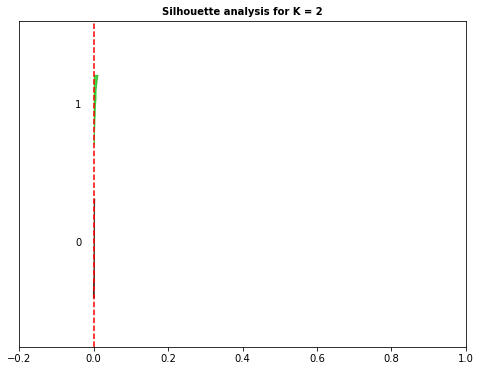

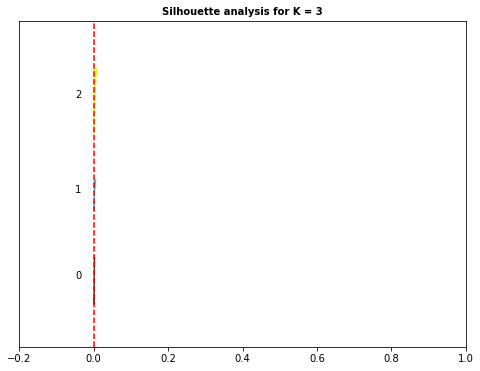

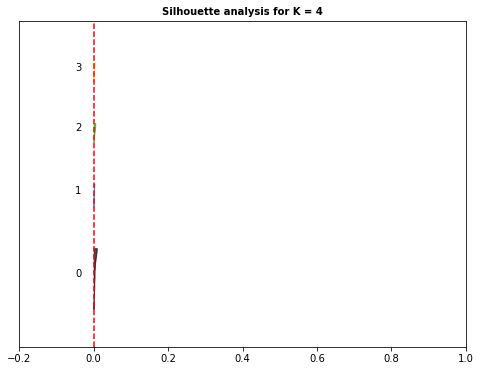

In [275]:
silhouette(kmeans_results, final_df, plot=True)

In [276]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

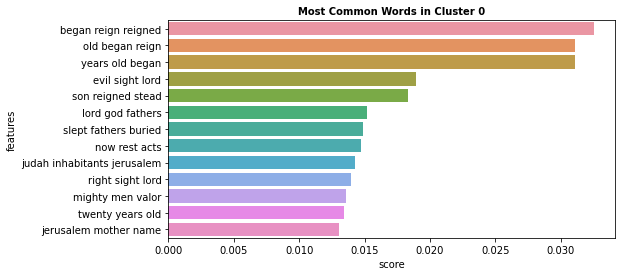

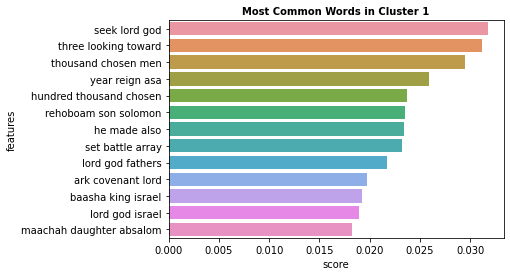

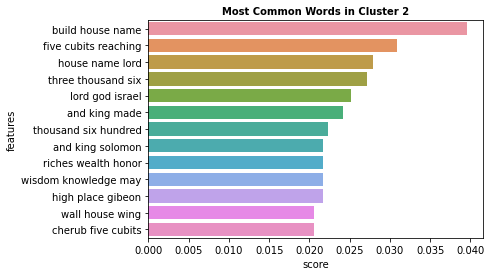

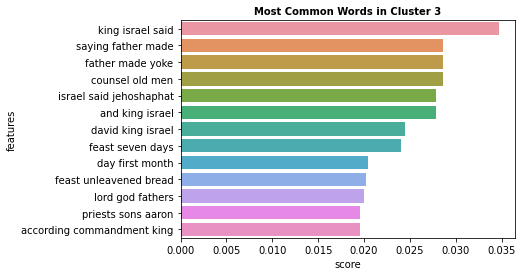

In [277]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [278]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

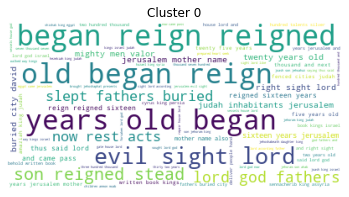

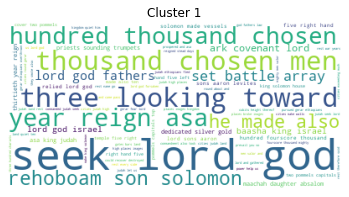

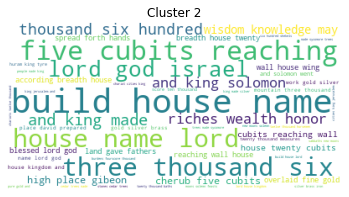

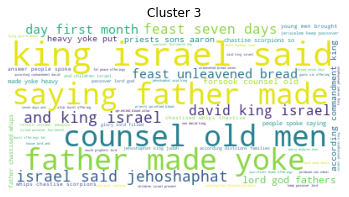

In [279]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [280]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,II_Cronicos_1,"'solomon', 'son', 'david', 'strengthened', 'ki...",2
101,II_Cronicos_2,"'solomon', 'determined', 'build', 'house', 'na...",2
102,II_Cronicas_3,"'solomon', 'began', 'build', 'house', 'lord', ...",2
103,II_Cronicas_4,"'moreover', 'made', 'altar', 'brass', ',', 'tw...",1
104,II_Cronicas_5,"'thus', 'work', 'solomon', 'made', 'house', 'l...",1


In [281]:
print(df)

              Autor                                              Livro  label
100   II_Cronicos_1  'solomon', 'son', 'david', 'strengthened', 'ki...      2
101   II_Cronicos_2  'solomon', 'determined', 'build', 'house', 'na...      2
102   II_Cronicas_3  'solomon', 'began', 'build', 'house', 'lord', ...      2
103   II_Cronicas_4  'moreover', 'made', 'altar', 'brass', ',', 'tw...      1
104   II_Cronicas_5  'thus', 'work', 'solomon', 'made', 'house', 'l...      1
105   II_Cronicas_6  'said', 'solomon', ',', 'lord', 'said', 'would...      2
106   II_Cronicas_7  'solomon', 'made', 'end', 'praying', ',', 'fir...      3
107   II_CRonicas_8  'came', 'pass', 'end', 'twenty', 'years', ',',...      2
108   II_Cronicas_9  'queen', 'sheba', 'heard', 'fame', 'solomon', ...      2
109  II_Cronicas_10  'rehoboam', 'went', 'shechem', ':', 'shechem',...      3
110  II_Cronicas_11  'rehoboam', 'come', 'jerusalem', ',', 'gathere...      1
111  II_cronicas_12  'came', 'pass', ',', 'rehoboam', 'establish